## ANÁLISIS BASE DE DATOS 

La base de datos elegida contiene los precios de alrededor 46.000 alimentos, los cuales pertenecen a los 3 principales supermercados de España: Mercadona, Carrefour y Día. Estos negocios cubren el 80% del mercado español. 

Los datos nos muestran la evolución diaria del coste de los productos en un intervalo de un año histórico, concretamente, desde marzo de 2021 hasta principios de agosto de 2022.

Comenzamos el proyecto llevando a cabo un análisis inicial de la base de datos. Este estudio se aplica para evitar futuros resultados erróneos en las conclusiones finales del proyecto. 

In [2]:
import pandas as pd
import sqlite3
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
supermercado=pd.read_csv("agosto.csv", sep=',')

In [3]:
supermercado

url   supermarket  \
0        https://www.dia.es/compra-online/productos/per...        dia-es   
1        https://www.dia.es/compra-online/productos/ali...        dia-es   
2        https://www.dia.es/compra-online/productos/ali...        dia-es   
3        https://www.dia.es/compra-online/productos/ali...        dia-es   
4        https://www.dia.es/compra-online/productos/ali...        dia-es   
...                                                    ...           ...   
7801584  https://www.carrefour.es/supermercado/crema-de...  carrefour-es   
7801585  https://www.carrefour.es/supermercado/after-sh...  carrefour-es   
7801586  https://www.carrefour.es/supermercado/mascara-...  carrefour-es   
7801587  https://www.carrefour.es/supermercado/after-sh...  carrefour-es   
7801588  https://www.carrefour.es/supermercado/after-sh...  carrefour-es   

                                                  category  \
0        perfumeria_e_higiene_cuidado_del_cabello_laca_...   
1            alimentacion_aceite_aceite_de_oliva_suave_05o   
2        alimentacion_aceite_aceite_de_oliva_intenso_06o1o   
3        alimentacion_aceite_aceite_de_oliva_intenso_06o1o   
4        alimentacion_aceite_aceite_de_oliva_intenso_06o1o   
...                                                    ...   
7801584                perfumeria_e_higiene_cosmetica_ojos   
7801585  perfumeria_e_higiene_depilacion_y_afeitado_aft...   
7801586                perfumeria_e_higiene_cosmetica_ojos   
7801587  perfumeria_e_higiene_depilacion_y_afeitado_aft...   
7801588  perfumeria_e_higiene_depilacion_y_afeitado_aft...   

                                                      name description  price  \
0         PANTENE Pro-v laca volumen perfecto spray 300 ml         NaN   4.19   
1                  DIA aceite de oliva suave garrafa  5 lt         NaN  10.60   
2                   DIA aceite oliva intenso garrafa  5 lt         NaN  10.60   
3                 DIA aceite de oliva intenso botella 1 lt         NaN   2.40   
4        CARBONELL aceite de oliva intenso 1º botella 1 lt         NaN   4.09   
...                                                    ...         ...    ...   
7801584  Crema de ojos y rostro ácido hialurónico Revit...         NaN  20.50   
7801585      After shave loción Original Old Spice 100 ml.         NaN   8.45   
7801586  Máscara de pestañas Wonder´Lux Volume nº 001 B...         NaN   5.65   
7801587              After shave The Genuine Floid 150 ml.         NaN   7.25   
7801588  After shave bálsamo hidratante Protege & Cuida...         NaN   5.39   

         reference_price reference_unit          insert_date  \
0                  13.97              l  2021-03-06 00:00:00   
1                   2.12              l  2021-03-06 00:00:00   
2                   2.12              l  2021-03-06 00:00:00   
3                   2.40              l  2021-03-06 00:00:00   
4                   4.09              l  2021-03-06 00:00:00   
...                  ...            ...                  ...   
7801584            68.33          100ml  2022-08-15 00:00:00   
7801585             8.45          100ml  2022-08-15 00:00:00   
7801586             5.65             ud  2022-08-15 00:00:00   
7801587             4.83          100ml  2022-08-15 00:00:00   
7801588             5.39          100ml  2022-08-15 00:00:00   

                               product_id  
0        4c56625f8ea6d4aede3ce42b20aee073  
1        302619dbca19365c8b78228db751b323  
2        4b2110871673a6301c38f75f4bc8d0d7  
3        08055d952abccedf529e1420eb79dade  
4        cba1c9abf6cc4b9dd85bc7670b1a1341  
...                                   ...  
7801584  c4d4e8f23281389c6f1ecfa8cf111fea  
7801585  f429cc2e2b44f71c3d36f53c4f5bc221  
7801586  8ef08c21411adc41c164d660b2695245  
7801587  6795abb605738347c5932e3b9ec28b1a  
7801588  272f2ed0b8c837e6aed8b17e5a8e67d6  

[7801589 rows x 10 columns]

In [4]:
print (supermercado.shape)

(7801589, 10)


Observamos que se compone de 7.801.589 filas y 10 columnas. Esto ocurre ya que cada 24 horas la actualización de precios se representa en el dataset añadiendo una nueva fila para cada producto. 
 

## COMPRENSIÓN DE LAS VARIABLES.

La comprensión de variables que conforman nuestra base de datos es un punto importante a la hora de realizar el proyecto. Si se desarrolla un estudio sin comprender las variables y sin comprobar que su rango es correcto se pueden cometer errores bastante graves. 

In [7]:
columns_names = supermercado.columns.values
columns_names

array(['url', 'supermarket', 'category', 'name', 'description', 'price',
       'reference_price', 'reference_unit', 'insert_date', 'product_id'],
      dtype=object)

#### Url

In [8]:
urlUnique=pd.unique(supermercado['url'])
urlUnique

array(['https://www.dia.es/compra-online/productos/perfumeria-e-higiene/cuidado-del-cabello/laca-espuma-y-fijadores/p/202943',
       'https://www.dia.es/compra-online/productos/alimentacion/aceite/aceite-de-oliva-suave-05%C2%BA/p/49895',
       'https://www.dia.es/compra-online/productos/alimentacion/aceite/aceite-de-oliva-intenso-06%C2%BA1%C2%BA/p/107364',
       ...,
       'https://www.carrefour.es/supermercado/limpiador-de-bano-en-gel-frescor-marino-chubb-15-l/R-prod290669/p',
       'https://www.carrefour.es/supermercado/yogur-de-fresa-de-galleta-de-platano-y-de-frutos-del-bosque-de-limon-y-de-coco-carrefour-sin-gluten-pack-de-16-unidades-de-125-g/R-VC4AECOMM-025971/p',
       'https://www.carrefour.es/supermercado/hierba-para-gatos/R-555401601/p'],
      dtype=object)

In [10]:
print (urlUnique.size)

50372


Se comprueba que la variable __url__ muestra la url de cada producto. Se tiene que tener en cuenta que un mismo producto puede encontrarse a la vez en los 3 supermercados, pero la url cambiaría en cada supermercado. Por tanto, se tienen 50.372 id diferentes, tomando por *id* la tupla [producto, supermercado].

#### Supermarket

In [13]:
supermarketUnique=pd.unique(supermercado['supermarket'])
supermarketUnique

array(['dia-es', 'mercadona-es', 'carrefour-es'], dtype=object)

In [14]:
print(supermarketUnique.size)

3


La variable __supermarket__ está compuesta por los 3 supermercados ya mencionados.

#### Category

In [17]:
categoryUnique=pd.unique(supermercado['category'])
categoryUnique

array(['perfumeria_e_higiene_cuidado_del_cabello_laca_espuma_y_fijadores',
       'alimentacion_aceite_aceite_de_oliva_suave_05o',
       'alimentacion_aceite_aceite_de_oliva_intenso_06o1o', ...,
       'bebe_panales_y_toallitas_otras_marcas',
       'despensa_cocina_internacional_otras',
       'productos_frescos_verduras_y_hortalizas_hierbas_aromaticas_y_especias'],
      dtype=object)

In [18]:
print(categoryUnique.size)

1503


La variable __category__ nos indica el tipo de alimento. Se han clasificado los productos en 1.503 grupos diferentes. 

Esta variable se reducirá ya que 1.503 clasificaciones son demasiadas. 

#### Name

In [19]:
nameUnique=pd.unique(supermercado['name'])
nameUnique

array(['PANTENE Pro-v laca volumen perfecto spray 300 ml',
       'DIA aceite de oliva suave garrafa  5 lt',
       'DIA aceite oliva intenso garrafa  5 lt', ...,
       'Limpiador de baño en gel frescor marino Chubb 1,5 l.',
       'Yogur de fresa, de galleta, de plátano y de frutos del bosque, de limón y de coco Carrefour sin gluten pack de 16 unidades de 125 g.',
       'Hierba para Gatos'], dtype=object)

In [20]:
print(nameUnique.size)

38272


La variable __name__ ofrece el nombre de los productos.

#### Description

In [21]:
descriptionUnique=pd.unique(supermercado['description'])
descriptionUnique

array([nan, 'Botella', 'Brick', 'Pack-6', 'Pack-2', 'Pack-4', 'Benjamín',
       'Garrafa', 'Spray', 'Lata', 'Pack-8', 'Pack-12', 'Botellín',
       'Pack-9', 'Barril', 'Bote', 'Paquete', 'Pack-3', 'Vaso', 'Tarro',
       'Frasco', 'Tubo', 'Caja', 'Pieza', 'Bandeja', 'Bolsa', '1/4 Pieza',
       '1/2 Pieza', 'Malla', 'Manojo', 'Tarrina', 'Pastilla', 'Cubo',
       'Granel', 'Saco', 'Bol', 'Pack-16', 'Sobre', 'Tableta', 'Pack-10',
       'Pack-5', 'Tarrito'], dtype=object)

In [22]:
descriptionUnique.size

42

La variable __description__ indica el tipo de recipiente en el que se encuentran los productos de cara al público. 

Existen valores en el rango que pueden ser confusos, como, por ejemplo, *manojo*. Esto no es un inconveniente en nuestro trabajo que ya es muy probable que esta variable no sea utilizada para nuestros modelos.

#### Price

In [24]:
priceUnique=pd.unique(supermercado['price'])
priceUnique

array([ 4.19, 10.6 ,  2.4 , ..., 20.67, 28.25, 64.49])

La variable __price__ nos indica el precio en euros que tiene cada uno de los productos de nuestro estudio.

In [26]:
supermercado["price"].describe()

count    7.801571e+06
mean     4.736210e+00
std      4.910679e+01
min      8.000000e-02
25%      1.390000e+00
50%      2.200000e+00
75%      3.980000e+00
max      7.915050e+03
Name: price, dtype: float64

Se observa que el precio más caro es de 7915.05 euros. Esto llama la atención ya que es un precio muy alto y podría tratarse de un outlier. Mostremos dicho producto

In [27]:
for i, valor in enumerate(supermercado['price']): #Comprobar también el mayor
    if valor==7915.05:
        print (i)

1273057
1288534
1314271
1323101
1332352
1351991
1372881
1388479
1392361
1405968
1431264
1442086
1461058
1471804
1487500
1494906
1510609
1524572
1539378
1564224
1575843
1583398
1598314
1614848
1632742
1650510
1667622
1683338
1695985
1703744
1720629
1741661
1748490
1765837
1780203
1796863
1806915
1829634
1841316
1860712
1873771
1889900
1896124
1910294
1924001
1945267
1954395
1968660
1985354
2008483
2013446
2029625
2043375
2063224
2083701
2094255
2101898
2127171
2135446
2156960
2169813
2179313
2202043
2215296
2220836
2239546
2250681
2265902
2289633
2295492
2320068
2330176
2339885
2355864
2378758
2382352
2400353
2419817
2428170
2447963
2453705
2474628
2489741
2497363
2515442
2529155
2540877
2560139
2573208
2580218
2592451
2615879
2628966
2634701
2654809
2674485
2679849
2692136
2711440
2722319
2736418
2750570
2770880
2780892


In [28]:
b=[1273057,
1288534,
1314271,
1323101,
1332352,
1351991,
1372881,
1388479,
1392361,
1405968,
1431264,
1442086,
1461058,
1471804,
1487500,
1494906,
1510609,
1524572,
1539378,
1564224,
1575843,
1583398,
1598314,
1614848,
1632742,
1650510,
1667622,
1683338,
1695985,
1703744,
1720629,
1741661,
1748490,
1765837,
1780203,
1796863,
1806915,
1829634,
1841316,
1860712,
1873771,
1889900,
1896124,
1910294,
1924001,
1945267,
1954395,
1968660,
1985354,
2008483,
2013446,
2029625,
2043375,
2063224,
2083701,
2094255,
2101898,
2127171,
2135446,
2156960,
2169813,
2179313,
2202043,
2215296,
2220836,
2239546,
2250681,
2265902,
2289633,
2295492,
2320068,
2330176,
2339885,
2355864,
2378758,
2382352,
2400353,
2419817,
2428170,
2447963,
2453705,
2474628,
2489741,
2497363,
2515442,
2529155,
2540877,
2560139,
2573208,
2580218,
2592451,
2615879,
2628966,
2634701,
2654809,
2674485,
2679849,
2692136,
2711440,
2722319,
2736418,
2750570,
2770880,
2780892]

In [29]:
for i, valor in enumerate(b):
    print (supermercado["name"][valor])

Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero congelado
Carabinero co

Se ve que este precio pertenece solamente al Carabinero congelado, y, se comprueba su precio verdadero.

In [30]:
supermercado["url"][2780892]

'https://tienda.mercadona.es/product/24115/carabinero-congelado-granel'

In [31]:
supermercado["price"][2780892]

7915.05

 Su precio estaría mal indicado, ya que en la url se observa un precio de 15'99€ por 200 gramos.

Observamos que el precio más barato sería de 0.08 euros. Esto llama la atención ya que es un precio muy bajo y podría tratarse de un outlier. Mostremos dicho producto.

In [34]:
for i, valor in enumerate(supermercado['price']): #Comprobar también el mayor
    if valor==0.08:
        print (i)

3587446
3591207
3608478
3630387
3645462
3657715
3671152
3681787
3706557
3710702
3735137
3750689
3760064
3775609
3790003
3797773
3824134
3832776
3847928
3860658
3885414
3893910
3904531
3927725
3939327
3947424
3968302
3984544
3999815
4017610
4022933
4042615
4057441
4076868
4082493
4097233
4120828
4131917
4151394
4162662
4181409
4196722
4204181
4221815
4242591
4253681
4265815
4280233
4294488
4308084
4322002
4341508
4355596
4376466
4391296
4397829
4417125
4427860
4448560
4463411
4468762
4482613
4509436
4522069
4526877
4539759
4546819
4553287
4561792
4564126
4571556
4577622
4593727
4609694
4626270
4630605
4649815
4659932
4682070
4695555
4709752
4710137
4717246
4722593
4729750
4736875
4750369
4752938


In [35]:
a=[3587446,
3591207,
3608478,
3630387,
3645462,
3657715,
3671152,
3681787,
3706557,
3710702,
3735137,
3750689,
3760064,
3775609,
3790003,
3797773,
3824134,
3832776,
3847928,
3860658,
3885414,
3893910,
3904531,
3927725,
3939327,
3947424,
3968302,
3984544,
3999815,
4017610,
4022933,
4042615,
4057441,
4076868,
4082493,
4097233,
4120828,
4131917,
4151394,
4162662,
4181409,
4196722,
4204181,
4221815,
4242591,
4253681,
4265815,
4280233,
4294488,
4308084,
4322002,
4341508,
4355596,
4376466,
4391296,
4397829,
4417125,
4427860,
4448560,
4463411,
4468762,
4482613,
4509436,
4522069,
4526877,
4539759,
4546819,
4553287,
4561792,
4564126,
4571556,
4577622,
4593727,
4609694,
4626270,
4630605,
4649815,
4659932,
4682070,
4695555,
4709752,
4710137,
4717246,
4722593,
4729750,
4736875,
4750369,
4752938]

In [36]:
for i, valor in enumerate(a):
    print (supermercado['name'][valor])

Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coco Antiu Xixona
Bolitas de coc

Se ha comprobado el precio de los tres alimentos y efectivamente los productos tienen un coste de 0,08 €/ud.

Se observa también que el alimento *Bolitas de coco Antiu Xixona* aparece más veces que el producto *Día dulce noel almendra rellena surtido 10 gr*, lo que quiere decir que el segundo producto se ha empezado a incorporar al Dataset con una fecha más tardía que el primer producto.  

#### Reference_price y reference_unit

In [37]:
reference_priceUnique=pd.unique(supermercado['reference_price'])
reference_priceUnique

array([13.97,  2.12,  2.4 , ..., 69.98, 47.57, 45.73])

In [38]:
reference_unitUnique=pd.unique(supermercado['reference_unit'])
reference_unitUnique

array(['l', 'kg', '100ml', 'ud', 'm', 'lavado', '100g', 'docena', 'g',
       nan], dtype=object)

In [39]:
supermercado["reference_price"].describe() 
# Llama la atención que el valor mayor sea 163333 Lo comprobamos más delante.

count    7.801583e+06
mean     1.956389e+01
std      6.406731e+02
min      3.000000e-03
25%      1.800000e+00
50%      4.530000e+00
75%      9.910000e+00
max      1.633333e+05
Name: reference_price, dtype: float64

Los precios de la columna anterior no son los más apropiados para realizar el estudio. 

No se puede comparar productos fijándose sólo en el precio, se debe conocer también la cantidad. Es decir, no se puede comparar el precio de un salchichón de 250kg con uno de 500kg.

Las variables __Reference_price y reference_unit__ nos indican los precios por kg, l... Esto es ideal para realizar comparaciones entre los precios de los productos e identificar los más económicos. 

Observamos los valores de la __referencef_unit__ :

1) kg (5.23€ por 1 kilo, recordemos que el precio 5.23€ nos lo indicaría la variable reference_price) EJEMPLO - Preparado para natillas con canela carrefour 130 g

2) l (5.23€ por 1 litro) EJEMPLO - Salmorejo La Huerta Don Simón 1l

3) 100ml (5.23€ por 100 mililitros) EJEMPLO - Crema facial de día hidratante anti-arrugas Nivea 50 ml

4) ud (5.23€ por 1 unidad) EJEMPLO - Esponja de baño suave flor Carrefour

5) 100g (5.23€ por 100 gramos) EJMPLO - Caramelos menta minigrageas Smint

6) m (5.23€ por 1 metro) EJEMPLO - Papel de aluminio Carrefour 30 metros)

7) docena (5.23€ por 1 docena) EJEMPLO - Huevos medianos M

8) lavado (5.23€ por lavado) EJMEMPLO - Detergente liquido delicate con jabón de marsella Carrefour Expert 40 lavados

9) g (5.23€ por 1 gramo) EJMPLO - Soja texturizada Carrefour 250 g 

10) nan los nulos los estudiaremos más adelante


In [40]:
for i, valor in enumerate(supermercado['reference_unit']):
    if valor=='lavado':
        print (supermercado['name'][i])

Lavavajillas todo en 1 Bosque Verde en gel
Suavizante concentrado florales jazmín Mimosín 78 lavados.
Suavizante Creaciones flor de la pasión y Bergamota Mimosín 58 lavados.
Suavizante concentrado lavanda Carrefour 80 lavados.
Suavizante concentrado delicado para pieles sensibles y alérgicas Vernel 76 lavados.
Suavizante concentrado de lirio irresistible Aromaterapia Vernel 76 lavados.
Suavizante concentrado moussel Mimosín 78 lavados.
Suavizante concentrado azul vital Mimosín 166 lavados.
Suavizante concentrado Nenuco Flor 72 lavados.
Suavizante concentrado azul original Flor 80 lavados.
Suavizante Creaciones flores de Tiaré y frutos rojos Mimosín 58 lavados.
Suavizante concentrado azul Flor 156 lavados.
Suavizante concentrado caricias Mimosín 78 lavados.
Suavizante concentrado peonía y granada Carrefour 80 lavados.
Suavizante concentrado spa Carrefour 80 lavados.
Suavizante concentrado azul vital Mimosín 78 lavados.
Suavizante concentrado azul Flor 72 lavados.
Suavizante concentrado 

Detergente ropa prendas delicadas Bosque Verde líquido
Detergente ropa de color Bosque Verde líquido
Detergente ropa prendas delicadas Perlan líquido
Detergente ropa fragancia Nenuco Colon en gel
Detergente ropa Ariel original líquido
Detergente ropa crema prendas delicadas Bosque Verde líquido concentrado
Detergente ropa pieles sensibles Bosque Verde líquido
Detergente ropa sport higiene Bosque Verde en gel
Detergente ropa frescor Vernel Wipp Express líquido
Detergente ropa adiós al separar Micolor en gel
Detergente ropa frescor duradero Micolor líquido
Detergente líquido con jabón de Marsella y flor de naranjo Carrefour 40 lavados.
Detergente en cápsulas 3 en 1 Original Ariel 50 ud.
Detergente liquido aloe vera y flores de almendra dulce Carrefour 40 lavados.
Detergente líquido Colonia Fresca Carrefour 40 lavados.
Detergente líquido Nenuco Colon 60 lavados.
Detergente líquido Diario Norit 50 lavados.
Detergente líquido ropa oscura Diario Norit 40 lavados.
Detergente en polvo Ariel 85

Detergente líquido ropa oscura Diario Norit 40 lavados.
Detergente en polvo Ariel 85 cacitos
Detergente liquido ultra oxi effect Ariel 40 lavados.
Detergente líquido Active Clean Skip 50 lavados.
Antical para lavadoras en pastillas Calgon 30 ud.
Antical para lavadoras 2 en 1 en pastillas Calgon 15 ud.
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa frescura azul Bosque Verde líquido
Detergente ropa de color Bosque Verde líquido
Detergente ropa prendas delicadas Perlan líquido
Detergente ropa fragancia Nenuco Colon en gel
Detergente ropa Ariel original líquido
Detergente ropa crema prendas delicadas Bosque Verde líquido concentrado
Detergente ropa pieles sensibles Bosque Verde líquido
Detergente ropa sport higiene Bosque Verde en gel
Detergente ropa frescor Vernel Wipp Express líquido
DIA detergente máquina polvo maleta 36 cacitos
DIA detergente máquina polvo maleta 72 cacitos
ELENA detergente 

WIPP EXPRESS detergente máquina polvo maleta 34 cacitos
DIA detergente máquina polvo aloe vera maleta 45 cacitos
MICOLOR detergente máquina líquido colores puros botella 30 lv
MICOLOR detergente máquina líquido adiós al separar botella 30 lv
SKIP Ultimate detergente máquina líquido higiene total botella 30 lv
COLON detergente máquina líquido gel sensaciones azul botella 31 lv
SKIP Active clean detergente máquina líquido botella 30 lv
DIA detergente máquina líquido botella 27 lv
DIA detergente máquina líquido jabón marsella botella 40 lv
DIA detergente máquina líquido aloe vera botella 40 lv
DIA detergente máquina líquido para ropa de color botella 30 lv
NORIT detergente líquido ropa de color botella 28 lv
NORIT detergente máquina líquido delicado botella 37 lv
NORIT detergente a mano líquido cuidado delicado botella 48 lv
NORIT detergente liquido diario botella 40 lv
NORIT detergente a mano líquido cuidado delicado botella 45 lv
DIA detergente polvo para lavar a mano caja 600 gr
VERNEL

DIA detergente máquina líquido al jabón de marsella botella 54 lv
MICOLOR detergente máquina polvo maleta 25 cacitos
ELENA detergente maquina polvo maleta 30 + 9 lavados
ARIEL detergente máquina en polvo básico maleta 60 cacitos
SKIP Active clean detergente máquina polvo maleta 48 cacitos
LAGARTO detergente máquina polvo ecológico maleta 50 cacitos
ARIEL detergente máquina en polvo original maleta 30 cacitos
DIA detergente máquina polvo maleta 36 cacitos
DIA detergente máquina polvo maleta 72 cacitos
PUNTOMATIC detergente máquina blanco puro en pastillas 4 lv
DIA detergente máquina en cápsulas 20 uds
DIA detergente máquina doble acción en cápsulas 18 uds
COLON detergente máquina total power gel en cápsulas bolsa 22 uds
DIXAN Duo total detergente máquina en cápsulas 24 uds
SKIP Ultimate detergente máquina doble acción en cápsulas 24 uds
ARIEL Pods detergente máquina todo en uno en cápsulas 18 uds
ARIEL Pods detergente máquina 3 en 1 original en cápsulas 18 uds
ARIEL Pods detergente máqu

MICOLOR detergente máquina líquido fresh gel botella 23 lv
MICOLOR detergente máquina líquido colores oscuros botella 23 lv
OMINO BIANCO detergente máquina líquido marsella botella 50 lv
WOOLITE detergente máquina líquido ropa oscura botella 30 lv
FINISH lavavajillas máquina todo en uno plus powerball en cápsulas bolsa 30 uds
FLOPP lavavajillas máquina todo en uno en cápsulas bolsa 16 uds
FLOTA lavavajillas máquina classic caja 15 cápsulas
FLOTA lavavajillas máquina todo en uno en cápsulas 10 + 1 uds
SOMAT lavavajillas máquina gel oro con vinagre botella 35 lv
SOMAT lavavajillas máquina oro gel antigrasa bote 35 lv
DIA suavizante diluido oxígeno vital  botella 45 lv
FINISH lavavajillas todo en uno powerball limón en cápsulas caja 30 uds
FINISH lavavajillas máquina todo en uno limón en cápsulas bolsa 50 uds
MICOLOR detergente máquina polvo maleta 25 cacitos
ELENA detergente maquina polvo maleta 30 + 9 lavados
COLON detergente máquina líquido gel sensaciones azul botella 31 lv
SKIP Activ

Detergente ropa sport higiene Bosque Verde en gel
Detergente ropa frescor Vernel Wipp Express líquido
Detergente ropa adiós al separar Micolor en gel
Detergente ropa frescor duradero Micolor líquido
Detergente ropa negra y oscura Bosque Verde líquido
Detergente lavado a mano Bosque Verde líquido
Suavizante ropa Flor original concentrado
Perfumador ropa Bosque Verde intensificador de fragancia
Lavavajillas frescor anti-olor Somat en gel
Lavavajillas Todo en 1 aroma limón en cápsulas Carrefour 26 ud.
Gel para lavavajillas Oro anti grasa Somat 50 lavados.
Gel para lavavajillas limón desengrasante Finish 50 lavados.
Lavavajillas máquina classic en pastillas Finish 57 ud.
Antical para lavadoras 2 en 1 en pastillas Calgon 15 ud.
Antical para lavadoras en pastillas Calgon 30 ud.
Suavizante concentrado delicado para pieles sensibles y alérgicas Vernel 76 lavados.
Suavizante Creaciones flores de Tiaré y frutos rojos Mimosín 58 lavados.
Suavizante concentrado de lirio irresistible Aromaterapia V

Detergente ropa negra y oscura Bosque Verde líquido
Detergente ropa blanca Puntomatic en pastillas
Detergente ropa All in 1 Ariel en cápsulas
Detergente ropa blanca y de color Bosque Verde líquido concentrado
Detergente ropa blanca y de color Bosque Verde líquido concentrado
Detergente liquido aloe vera y flores de almendra dulce Carrefour 40 lavados.
Detergente liquido ultra oxi effect Ariel 40 lavados.
Detergente líquido Dixan Total 50 lavados.
Detergente líquido Diario Norit 50 lavados.
Detergente en cápsulas Ultra Oxy Effect All in 1 Pods Ariel 43 lavados.
Detergente líquido ropa oscura Diario Norit 40 lavados.
Detergente en polvo Ariel 85 cacitos
Detergente líquido Wipp Express 100 lavados.
Detergente liquido optimal clen frescor alpino expert Carrefour 76 lavados.
Detergente líquido Active Clean Skip 50 lavados.
Detergente líquido cerezas de Japón Carrefour 40 lavados.
Detergente líquido pieles sensibles Norit 40 lavados
Detergente líquido Wipp Express 50 lavados.
Detergente liqu

ARIEL detergente máquina líquido básico XL botella 70 lv
DIA detergente máquina líquido con suavizante 2 en 1 botella 2 lt
DIA detergente máquina líquido botella 27 lv
DIA detergente máquina líquido jabón marsella botella 40 lv
DIA detergente máquina líquido aloe vera botella 40 lv
DIA detergente máquina líquido para ropa de color botella 30 lv
DIA detergente máquina líquido botella 54 lv
DIA detergente máquina líquido al jabón de marsella botella 54 lv
DIA detergente máquina líquido aloe vera botella 54 lv
SKIP Ultimate detergente máquina líquido mimosín botella 33 lv
WOOLITE detergente máquina líquido ropa oscura botella 30 lv
ARIEL detergente máquina líquido básico botella 31 lv
NORIT detergente máquina líquido delicado botella 40 lv
WIPP EXPRESS detergente máquina líquido limpio y liso botella 30 lv
FLOTA detergente máquina líquido active plus botella 25 lv
FLOTA detergente máquina líquido active plus esencia para soñar botella 25 lv
NORIT detergente máquina líquido bebé botella 32

ARIEL Pods detergente máquina todo en uno en cápsulas 46 uds
DIA detergente máquina líquido jabón marsella botella 40 lv
DIA detergente máquina líquido aloe vera botella 40 lv
DIA detergente máquina líquido para ropa de color botella 30 lv
DIA detergente máquina líquido botella 54 lv
DIA detergente máquina líquido al jabón de marsella botella 54 lv
MIMOSÍN suavizante concentrado flores de tiaré y frutos rojos botella 58 lv
MIMOSÍN Creaciones suavizante concentrado flor de la pasión y bergamota botella 58 lv
DIA suavizante diluido oxígeno vital  botella 45 lv
FINISH lavavajillas máquina classic powerball en cápsulas caja 57 uds
FINISH lavavajillas máquina todo en uno limón en cápsulas bolsa 50 uds
FINISH lavavajillas todo en uno powerball limón en cápsulas caja 30 uds
FINISH lavavajillas máquina todo en uno plus powerball en cápsulas bolsa 30 uds
FLOPP lavavajillas máquina todo en uno en cápsulas bolsa 16 uds
FAIRY lavavajillas máquina todo en uno en cápsulas 60 uds
FAIRY lavavajillas m

Detergente ropa crema prendas delicadas Bosque Verde líquido concentrado
Detergente ropa pieles sensibles Bosque Verde líquido
Detergente ropa sport higiene Bosque Verde en gel
Detergente ropa frescor Vernel Wipp Express líquido
Detergente ropa adiós al separar Micolor en gel
Detergente ropa frescor duradero Micolor líquido
Detergente ropa negra y oscura Bosque Verde líquido
Detergente ropa blanca Puntomatic en pastillas
Detergente ropa All in 1 Ariel en cápsulas
Perfumador ropa Bosque Verde intensificador de fragancia
Lavavajillas todo en 1 Bosque Verde en gel
Antical para lavadoras en pastillas Calgon 30 ud.
Detergente ropa Ariel en polvo
Detergente ropa blanca y de color Bosque Verde líquido concentrado
Detergente ropa poder dúo Bosque Verde en cápsulas
Detergente ropa jabón de Marsella Bosque Verde en polvo
Detergente ropa jabón de Marsella Bosque Verde en polvo
Detergente ropa blanca y de color Bosque Verde en cápsulas
Detergente ropa Elena en polvo
Detergente ropa blanca y de col

WOOLITE detergente máquina líquido prendas delicadas botella 25 lv
NORIT detergente máquina líquido bebé botella 32 lv
SKIP Ultimate detergente máquina líquido kh7 botella 30 lv
ASEVI Max detergente máquina líquido botella 31 lv
FLOTA detergente máquina líquido active plus esencia para soñar botella 25 lv
MICOLOR detergente máquina líquido colores puros botella 30 lv
ARIEL detergente máquina líquido original concentrado botella 29 lv
WIPP EXPRESS detergente máquina líquido gel botella 30 lv
COLON detergente máquina líquido gel azul botella 34 lv
DIXAN detergente máquina líquido gel botella 40 lv
DIA detergente máquina líquido ropa negra botella 2 lt
SKIP Active clean detergente máquina líquido botella 50 lv
SKIP detergente máquina líquido aloe vera botella 50 lv
ARIEL detergente máquina líquido original botella 40+2 lv
ARIEL detergente máquina líquido básico XL botella 70 lv
SKIP Ultimate detergente máquina líquido mimosín botella 33 lv
MICOLOR detergente máquina líquido fresh gel bote

NORIT detergente a mano líquido cuidado delicado botella 48 lv
ARIEL detergente máquina líquido básico XL botella 70 lv
SKIP Ultimate detergente máquina líquido mimosín botella 33 lv
WOOLITE detergente máquina líquido ropa oscura botella 30 lv
ARIEL detergente máquina líquido básico botella 31 lv
FLOR suavizante concentrado rubi y pétalos de jazmín botella 70 lv
WIPP EXPRESS detergente máquina líquido limpio y liso botella 30 lv
NORIT detergente máquina líquido delicado botella 40 lv
FLOTA detergente máquina líquido active plus botella 25 lv
FLOTA detergente máquina líquido active plus esencia para soñar botella 25 lv
NORIT detergente máquina líquido bebé botella 32 lv
SKIP Ultimate detergente máquina líquido kh7 botella 30 lv
ASEVI Max detergente máquina líquido botella 31 lv
WOOLITE detergente máquina líquido prendas delicadas botella 25 lv
ARIEL detergente máquina líquido original botella 40+2 lv
ARIEL detergente máquina líquido original concentrado botella 29 lv
MICOLOR detergente 

Suavizante concentrado peonía y granada Carrefour 80 lavados.
Suavizante concentrado frescor cielo azul Vernel 76 lavados.
Lavavajillas frescor anti-olor Somat en gel
Detergente liquido complet Norit 40 lavados.
Detergente líquido jabón de marsella y flor de naranjo Carrefour 75 lavados.
Detergente líquido con jabón de Marsella y flor de naranjo Carrefour 40 lavados.
Detergente líquido Alpine Ariel 50 lavados.
Detergente líquido Colonia Fresca Carrefour 40 lavados.
Detergente liquido ultra oxi effect Ariel 40 lavados.
Detergente líquido Nenuco Colon 60 lavados.
Suavizante concentrado azul Carrefour 80 lavados.
Suavizante concentrado azul vital Mimosín 78 lavados.
Suavizante concentrado azul Flor 72 lavados.
Suavizante concentrado orquídea y vainilla Carrefour 80 lavados.
Suavizante concentrado spa Carrefour 80 lavados.
Suavizante concentrado peonía y granada Carrefour 80 lavados.
Detergente ropa blanca Puntomatic en pastillas
Detergente ropa negra y oscura Bosque Verde líquido
Detergen

Detergente líquido Colonia Fresca Carrefour 40 lavados.
Suavizante concentrado frescor cielo azul Vernel 76 lavados.
Suavizante concentrado azul Carrefour 80 lavados.
Detergente ropa blanca y de color Bosque Verde en gel concentrado
Detergente ropa frescura azul Bosque Verde líquido
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa jabón natural de Marsella Bosque Verde líquido
DIA detergente máquina polvo maleta 36 cacitos
DIA detergente polvo para lavar a mano caja 600 gr
DIA detergente máquina líquido aloe vera botella 40 lv
DIA detergente máquina líquido con suavizante 2 en 1 botella 2 lt
DIA detergente máquina líquido aloe vera botella 54 lv
WIPP EXPRESS detergente máquina polvo maleta 34 cacitos
DIA detergente máquina líquido botella 54 lv
DIA detergente máquina líquido al jabón de marsella botella 54 lv
DIA detergente máquina polvo al jabón de marsella maleta 30 cacitos
ARIEL detergente máquina en polvo básico maleta 60 cacitos
DIXAN detergente máqui

FLOTA lavavajillas máquina classic caja 15 cápsulas
Detergente ropa frescor de colonia Bosque Verde líquido
Detergente ropa de color Bosque Verde líquido
Detergente ropa jabón de Marsella Bosque Verde en gel concentrado
Detergente ropa fragancia Nenuco Colon en gel
Detergente ropa de color Bosque Verde líquido
Detergente ropa prendas delicadas Bosque Verde líquido
Detergente ropa sport higiene Bosque Verde en gel
Detergente ropa pieles sensibles Bosque Verde líquido
Detergente ropa crema prendas delicadas Bosque Verde líquido concentrado
Detergente ropa Ariel total líquido
Detergente ropa prendas delicadas Perlan líquido
Suavizante concentrado caricias Mimosín 78 lavados.
Suavizante concentrado spa Carrefour 80 lavados.
Suavizante concentrado peonía y granada Carrefour 80 lavados.
Suavizante concentrado orquídea y vainilla Carrefour 80 lavados.
Suavizante concentrado azul vital Mimosín 78 lavados.
Suavizante concentrado azul Flor 72 lavados.
Detergente liquido aloe vera y flores de alm

DIXAN detergente máquina polvo bolsa 15 cacitos
COLON detergente máquina líquido gel nenuco botella 34 lv
DETERSOLÍN detergente máquina líquido ultra action botella 33 + 10 lv
FAIRY lavavajillas máquina todo en uno en cápsulas 60 uds
FLOPP lavavajillas máquina todo en uno en cápsulas bolsa 16 uds
FLOTA lavavajillas máquina classic caja 15 cápsulas
FLOTA lavavajillas máquina todo en uno en cápsulas 10 + 1 uds
FINISH Quantum lavavajillas máquina powerball en cápsulas 16 uds
FAIRY lavavajillas máquina original en cápsulas 22 uds
FAIRY lavavajillas máquina gel limón bote 32 lv
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Gel para lavavajillas Oro anti grasa Somat 50 lavados.
Detergente líquido con jabón de Marsella y flor de naranjo Carrefour 40 lavados.
Detergente líquido Complet Norit 40 lavados.
DIA detergente máquina líquido para ropa de color botella 30 lv
DIA detergente polvo para lavar a mano caja 600 g

Detergente ropa de color Bosque Verde líquido
Detergente ropa prendas delicadas Perlan líquido
Detergente ropa fragancia Nenuco Colon en gel
Detergente ropa Ariel total líquido
Detergente ropa Ariel en polvo
Lavavajillas frescor anti-olor Somat en gel
Detergente lavado a mano Bosque Verde líquido
Detergente ropa crema prendas delicadas Bosque Verde líquido concentrado
Detergente ropa pieles sensibles Bosque Verde líquido
Detergente ropa Elena en polvo
MICOLOR detergente máquina líquido fresh gel botella 23 lv
DIA detergente máquina polvo al jabón de marsella maleta 30 cacitos
WIPP EXPRESS detergente máquina polvo maleta 34 cacitos
DIA detergente máquina líquido botella 54 lv
DIA detergente máquina líquido al jabón de marsella botella 54 lv
DIA detergente máquina líquido aloe vera botella 54 lv
DIA detergente máquina líquido con suavizante 2 en 1 botella 2 lt
DIA detergente máquina polvo aloe vera maleta 45 cacitos
PUNTOMATIC detergente máquina blanco puro en pastillas 4 lv
DIXAN deterg

FLOTA lavavajillas máquina classic caja 15 cápsulas
FLOTA lavavajillas máquina todo en uno en cápsulas 10 + 1 uds
FINISH Quantum lavavajillas máquina powerball en cápsulas 16 uds
FAIRY lavavajillas máquina original en cápsulas 22 uds
DIA detergente máquina líquido botella 27 lv
DIA suavizante diluido oxígeno vital  botella 45 lv
DIA detergente máquina líquido jabón marsella botella 40 lv
DIA detergente máquina líquido aloe vera botella 40 lv
DIA detergente máquina líquido para ropa de color botella 30 lv
DIA detergente máquina polvo maleta 72 cacitos
DIA detergente máquina polvo al jabón de marsella maleta 30 cacitos
WIPP EXPRESS detergente máquina polvo maleta 34 cacitos
DIA detergente máquina líquido botella 54 lv
DIA detergente máquina líquido con suavizante 2 en 1 botella 2 lt
DIA detergente máquina polvo maleta 36 cacitos
DIA detergente máquina líquido al jabón de marsella botella 54 lv
DIA detergente máquina líquido aloe vera botella 54 lv
DIA detergente máquina polvo aloe vera m

Detergente ropa sport higiene Bosque Verde en gel
Detergente ropa prendas delicadas Perlan líquido
Detergente ropa fragancia Nenuco Colon en gel
Lavavajillas Frescor Anti-olor Somat en gel
Lavavajillas todo en 1 Bosque Verde en gel
Perfumador ropa Bosque Verde intensificador de fragancia
Suavizante ropa Flor original concentrado
Suavizante ropa Spa Bosque Verde concentrado
Detergente Lavado a Mano Bosque Verde líquido
Detergente ropa Ariel en polvo
Detergente ropa fragancia Vernel Wipp Express en polvo
Detergente ropa blanca y de color Bosque Verde en polvo
Detergente ropa blanca y de color Bosque Verde en polvo
Detergente ropa Elena en polvo
Detergente ropa Crema Prendas Delicadas Bosque Verde líquido concentrado
Detergente ropa Pieles Sensibles Bosque Verde líquido
Detergente ropa Frescor Vernel Wipp Express líquido
Detergente ropa Adiós al Separar Micolor en gel
Detergente ropa Frescor Duradero Micolor líquido
Detergente ropa Oscura Bosque Verde líquido
Detergente ropa Blanca Puntom

Detergente ropa de Color Bosque Verde líquido
Detergente ropa de Color Bosque Verde líquido
Lavavajillas todo en 1 Bosque Verde en gel
Detergente líquido Complet Norit 40 lavados.
Detergente líquido Wipp Express 50 lavados.
Detergente líquido con jabón de Marsella y flor de naranjo Carrefour 40 lavados.
FINISH lavavajillas máquina todo en uno limón en cápsulas bolsa 50 uds
DIXAN detergente máquina polvo bolsa 15 cacitos
MICOLOR detergente máquina polvo maleta 25 cacitos
DETERSOLÍN detergente máquina líquido ultra action botella 33 + 10 lv
DETERSOLÍN detergente máquina líquido lavado mixto botella 33 + 10 lv
NORIT detergente líquido ropa de color botella 28 lv
DETERSOLÍN detergente máquina líquido plancha fácil botella 31 + 4 lv
MICOLOR detergente máquina líquido fresh gel botella 23 lv
MICOLOR detergente máquina líquido colores oscuros botella 23 lv
DIA detergente máquina doble acción en cápsulas 18 uds
SKIP Active clean detergente máquina líquido botella 50 lv
SKIP detergente máquina 

Gel para lavavajillas todo en uno aroma lima y limón Somat 60 lavados.
Antical para lavadoras en pastillas Calgon 30 ud.
Suavizante concentrado azul Carrefour 80 lavados.
Suavizante concentrado azul vital Mimosin 78 lavados.
Suavizante concentrado spa Carrefour 80 lavados.
Suavizante concentrado frescor cielo azul Vernel 76 lavados.
Suavizante concentrado peonía y granada Carrefour 80 lavados.
Suavizante concentrado orquídea y vainilla Carrefour 80 lavados.
Suavizante concentrado talco Carrefour 80 lavados.
Detergente líquido Complet Norit 40 lavados.
Detergente líquido Wipp Express 50 lavados.
Detergente líquido con jabón de Marsella y flor de naranjo Carrefour 40 lavados.
Detergente líquido jabón de marsella y flor de naranjo Carrefour 75 lavados.
Detergente líquido Efecto +Oxi Ariel 40 lavados.
Detergente líquido Colonia Fresca Carrefour 40 lavados.
Detergente líquido Wipp Express 100 lavados.
Suavizante concentrado cielo azul Vernel 174 lavados.
Lavavajillas a máquina en pastillas 

Suavizante concentrado azul Carrefour 80 lavados.
Suavizante concentrado azul Flor 72 lavados.
Suavizante concentrado azul vital Mimosin 78 lavados.
Suavizante concentrado spa Carrefour 80 lavados.
Suavizante concentrado peonía y granada Carrefour 80 lavados.
Suavizante concentrado frescor cielo azul Vernel 76 lavados.
Suavizante concentrado caricias Mimosin 78 lavados.
Antical para lavadoras en pastillas Calgon 30 ud.
Suavizante ropa Flor original concentrado
Suavizante ropa Spa Bosque Verde concentrado
Quitamanchas Oxi Active Bosque Verde en gel
Detergente Lavado a Mano Bosque Verde líquido
Pastillas antical para lavadoras 3 en 1 en Calgon 45 ud.
Antical para lavadoras en pastillas Calgon 30 ud.
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa Frescura Azul Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde en gel concentrado
Detergente ropa Frescor de Colonia Bosque Verde lí

Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Antical para lavadoras en pastillas Calgon 30 ud.
Pastillas antical para lavadoras 3 en 1 en Calgon 45 ud.
Detergente ropa blanca y de color Bosque Verde en polvo
Detergente ropa fragancia Vernel Wipp Express en polvo
Detergente ropa jabón de Marsella Bosque Verde en polvo
Detergente ropa jabón de Marsella Bosque Verde en polvo
Detergente ropa Poder Dúo Bosque Verde en cápsulas
Detergente ropa Ariel en polvo
Detergente ropa Elena en polvo
Detergente ropa blanca y de color Bosque Verde en polvo
Detergente ropa All in 1 Ariel en cápsulas
Detergente ropa Blanca Puntomatic en pastillas
Detergente ropa Blanca y de Color Bosque Verde en cápsulas
Detergente ropa Adiós al Separar Micolor en gel
Detergente ropa Frescor Duradero Micolor líquido
Detergente ropa Frescor Vernel Wipp Express líquido
FLOR suavizante concentrado azul botella 72 lv
Detergente en capsulas trio ca

Suavizante concentrado talco Carrefour 80 lavados.
Suavizante concentrado frescor cielo azul Vernel 76 lavados.
Suavizante concentrado peonía y granada Carrefour 80 lavados.
Suavizante concentrado spa Carrefour 80 lavados.
Suavizante concentrado cielo azul Vernel 174 lavados.
DIA detergente máquina doble acción en cápsulas 18 uds
SKIP detergente máquina líquido aloe vera botella 50 lv
VERNEL suavizante concentrado aromaterapia lirio royal y jazmín botella 57 lv
ARIEL detergente máquina líquido básico XL botella 70 lv
COLON detergente máquina total power gel en cápsulas bolsa 22 uds
SKIP Active clean detergente máquina polvo maleta 48 cacitos
LENOR suavizante concentrado frescor 40 lv
FINISH lavavajillas máquina classic powerball en cápsulas caja 57 uds
SOMAT lavavajillas máquina gel oro con vinagre botella 35 lv
SOMAT lavavajillas máquina oro gel antigrasa bote 35 lv
FINISH lavavajillas todo en uno powerball limón en cápsulas caja 30 uds
FINISH lavavajillas máquina todo en uno plus pow

Lavavajillas a máquina en pastillas classic Finish 57 ud.
Lavavajillas máquina Todo en 1 aroma naranja en cápsulas Fairy 60 ud.
Gel para lavavajillas Oro anti grasa Somat 50 lavados.
Detergente ropa All in 1 Ariel en cápsulas
Detergente en capsulas trio caps Dixan 34 lavados.
Detergente líquido jabón de marsella y flor de naranjo Carrefour 75 lavados.
Detergente líquido con jabón de Marsella y flor de naranjo Carrefour 40 lavados.
Detergente en capsulas extra higiene ultra oxy effect Ariel 43 ud.
Detergente líquido Alpine Ariel 50 lavados.
Detergente líquido Colonia Fresca Carrefour 40 lavados.
Detergente líquido Dixan Total 70 lavados.
Detergente líquido Nenuco Colon 60 lavados.
Suavizante concentrado azul vital Mimosin 78 lavados.
Suavizante concentrado cielo azul Vernel 174 lavados.
Suavizante concentrado azul Carrefour 80 lavados.
Suavizante concentrado spa Carrefour 80 lavados.
Suavizante concentrado frescor cielo azul Vernel 76 lavados.
Suavizante concentrado peonía y granada Car

FINISH Quantum lavavajillas máquina powerball en cápsulas 16 uds
FAIRY lavavajillas máquina original en cápsulas 22 uds
FAIRY lavavajillas máquina gel limón bote 32 lv
Perfumador ropa Bosque Verde intensificador de fragancia
Detergente líquido jabón de marsella y flor de naranjo Carrefour 75 lavados.
Detergente líquido con jabón de Marsella y flor de naranjo Carrefour 40 lavados.
Detergente líquido Efecto +Oxi Ariel 40 lavados.
Detergente líquido Colonia Fresca Carrefour 40 lavados.
Detergente líquido Alpine Ariel 50 lavados.
Detergente líquido Dixan Total 50 lavados.
Suavizante concentrado spa Carrefour 80 lavados.
Suavizante concentrado cielo azul Vernel 174 lavados.
Suavizante concentrado azul Carrefour 80 lavados.
Suavizante concentrado azul Flor 72 lavados.
Gel para lavavajillas Oro anti grasa Somat 50 lavados.
Lavavajillas máquina Todo en 1 aroma naranja en cápsulas Fairy 60 ud.
PUNTOMATIC detergente máquina blanco puro en pastillas 4 lv
DIA detergente máquina polvo al jabón de m

ARIEL detergente máquina líquido básico XL botella 70 lv
VERNEL suavizante concentrado aromaterapia lirio royal y jazmín botella 57 lv
COLON detergente máquina total power gel en cápsulas bolsa 22 uds
FINISH lavavajillas máquina classic powerball en cápsulas caja 57 uds
FINISH lavavajillas máquina todo en uno limón en cápsulas bolsa 50 uds
SOMAT lavavajillas máquina gel oro con vinagre botella 35 lv
SOMAT lavavajillas máquina oro gel antigrasa bote 35 lv
FINISH lavavajillas todo en uno powerball limón en cápsulas caja 30 uds
FINISH lavavajillas máquina todo en uno plus powerball en cápsulas bolsa 30 uds
FAIRY lavavajillas máquina todo en uno en cápsulas 60 uds
FLOPP lavavajillas máquina todo en uno en cápsulas bolsa 16 uds
FLOTA lavavajillas máquina classic caja 15 cápsulas
FLOTA lavavajillas máquina todo en uno en cápsulas 10 + 1 uds
DIA detergente polvo para lavar a mano caja 600 gr
DIA detergente máquina líquido con suavizante 2 en 1 botella 2 lt
DIA detergente máquina polvo maleta 

Suavizante ropa Flor original concentrado
Perfumador ropa Bosque Verde intensificador de fragancia
Antical para lavadoras en pastillas Calgon 30 ud.
DIA detergente polvo para lavar a mano caja 600 gr
WIPP EXPRESS detergente máquina líquido gel botella 30 lv
FLOR suavizante concentrado azul botella 72 lv
COLON detergente máquina líquido gel azul botella 34 lv
ARIEL detergente máquina en polvo básico maleta 60 cacitos
DIXAN detergente máquina líquido gel botella 40 lv
DIA detergente máquina líquido ropa negra botella 2 lt
DIA detergente máquina en cápsulas 20 uds
DIA detergente máquina doble acción en cápsulas 18 uds
SKIP Active clean detergente máquina líquido botella 50 lv
ARIEL detergente máquina líquido básico XL botella 70 lv
VERNEL suavizante concentrado aromaterapia lirio royal y jazmín botella 57 lv
ARIEL detergente máquina líquido básico botella 31 lv
DIA detergente máquina líquido jabón marsella botella 40 lv
DIA detergente máquina líquido aloe vera botella 40 lv
DIA detergente

Detergente ropa Prendas Delicadas Bosque Verde líquido
Detergente ropa de Color Bosque Verde líquido
Detergente ropa prendas delicadas Perlan líquido
Detergente ropa fragancia Nenuco Colon en gel
Detergente ropa Ariel total líquido
Detergente ropa Crema Prendas Delicadas Bosque Verde líquido concentrado
Detergente ropa Pieles Sensibles Bosque Verde líquido
Detergente ropa Frescor Vernel Wipp Express líquido
Detergente ropa Adiós al Separar Micolor en gel
Detergente ropa Frescor Duradero Micolor líquido
Detergente ropa Oscura Bosque Verde líquido
Detergente ropa Blanca Puntomatic en pastillas
Lavavajillas todo en 1 Bosque Verde en gel
Detergente ropa jabón de Marsella Bosque Verde en polvo
Detergente ropa Elena en polvo
Detergente ropa jabón de Marsella Bosque Verde en polvo
Detergente ropa Blanca y de Color Bosque Verde en cápsulas
DIA detergente máquina líquido jabón marsella botella 54 lv
COLON detergente máquina líquido gel nenuco botella 34 lv
PUNTOMATIC detergente máquina blanco p

Detergente ropa jabón de Marsella Bosque Verde en gel concentrado
Detergente ropa Frescor de Colonia Bosque Verde líquido
Detergente ropa Frescura Azul Bosque Verde líquido
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente en capsulas trio caps Dixan 34 lavados.
Detergente líquido con jabón de Marsella y flor de naranjo Carrefour 40 lavados.
Suavizante concentrado cielo azul Vernel 174 lavados.
Suavizante concentrado azul Carrefour 80 lavados.
Suavizante concentrado peonía y granada Carrefour 80 lavados.
Suavizante concentrado orquídea y vainilla Carrefour 80 lavados.
Gel para lavavajillas Oro anti grasa Somat 50 lavados.
Lavavajillas a máquina en pastillas quantum max Finish Powerball 36 ud.
Lavavajillas máquina Todo en 1 aroma naranja en cápsulas Fairy 60 ud.
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Perfumador ropa Bosque Verde intensificador de fragancia
Lavavajillas Frescor Anti-olor Somat en gel
Lavavajillas todo en 1 Bosque Verde en g

Detergente ropa Adiós al Separar Micolor en gel
Lavavajillas todo en 1 Bosque Verde en gel
Detergente en capsulas trio caps Dixan 34 lavados.
Detergente líquido con jabón de Marsella y flor de naranjo Carrefour 40 lavados.
Detergente líquido Alpine Ariel 50 lavados.
Detergente en cápsulas Todo en Uno Pods Ariel 37 lavados.
Detergente ropa jabón de Marsella Bosque Verde en gel concentrado
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde en gel concentrado
Detergente ropa de Color Bosque Verde líquido
Detergente ropa Prendas Delicadas Bosque Verde líquido
Detergente ropa Frescura Azul Bosque Verde líquido
Detergente ropa Frescor de Colonia Bosque Verde líquido
FLOR suavizante concentrado azul botella 72 lv
SKIP Active clean detergente máquina líquido botella 30 lv
ARIEL Pods detergente máquina todo en uno active en cápsulas 14 uds
MICOLOR detergente máquina líquido adiós al separar botella 30 lv
ARIEL Pods detergente máquina 3 

Detergente ropa Ariel en polvo
Detergente ropa Prendas Delicadas Bosque Verde líquido
Detergente ropa blanca y de color Bosque Verde en polvo
Suavizante ropa Flor original concentrado
Detergente ropa prendas delicadas Perlan líquido
Detergente ropa Ariel total líquido
Detergente ropa Pieles Sensibles Bosque Verde líquido
Detergente ropa Adiós al Separar Micolor en gel
Detergente ropa Oscura Bosque Verde líquido
Detergente ropa Blanca Puntomatic en pastillas
Detergente ropa Poder Dúo Bosque Verde en cápsulas
Detergente ropa jabón de Marsella Bosque Verde en polvo
Detergente en capsulas trio caps Dixan 34 lavados.
Detergente líquido Dixan Total 100 lavados.
Detergente líquido con jabón de Marsella y flor de naranjo Carrefour 40 lavados.
Detergente líquido Alpine Ariel 50 lavados.
Suavizante concentrado cielo azul Vernel 174 lavados.
Suavizante concentrado azul Flor 72 lavados.
Suavizante concentrado spa Carrefour 80 lavados.
Suavizante concentrado orquídea y vainilla Carrefour 80 lavados

Quitamanchas Oxi Active Bosque Verde en gel
Detergente ropa Ariel en polvo
Detergente ropa blanca y de color Bosque Verde en polvo
Detergente ropa Elena en polvo
Lavavajillas Frescor Anti-olor Somat en gel
Detergente ropa Frescor Duradero Micolor líquido
Detergente ropa jabón de Marsella Bosque Verde en polvo
Detergente ropa All in 1 Ariel en cápsulas
Perfumador ropa Bosque Verde intensificador de fragancia
Detergente ropa Frescor Vernel Wipp Express líquido
Detergente ropa prendas delicadas Perlan líquido
Detergente ropa de Color Bosque Verde líquido
Detergente ropa jabón de Marsella Bosque Verde en polvo
Detergente ropa All in 1 Ariel en cápsulas
Detergente ropa Frescor Duradero Micolor líquido
Lavavajillas Frescor Anti-olor Somat en gel
Detergente ropa Prendas Delicadas Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde en gel concentrado
Suavizante concentrado frescor cielo azul Vernel 76 lavados.
Suavizante concentrado spa Carrefour 80 lavados.
Suavizante concentr

ARIEL Pods detergente máquina todo en uno en cápsulas 18 uds
ARIEL Pods detergente máquina 3 en 1 original en cápsulas 18 uds
MICOLOR detergente máquina líquido colores puros botella 30 lv
SKIP Active clean detergente máquina líquido botella 30 lv
SOMAT lavavajillas máquina gel oro con vinagre botella 35 lv
FINISH lavavajillas todo en uno powerball limón en cápsulas caja 30 uds
COLON detergente máquina líquido gel sensaciones azul botella 31 lv
ARIEL Pods detergente máquina todo en uno active en cápsulas 14 uds
SKIP Ultimate detergente máquina 3 en 1 en cápsulas 18 uds
ARIEL Pods detergente máquina todo en uno en cápsulas 46 uds
FAIRY lavavajillas máquina gel limón bote 32 lv
FINISH lavavajillas máquina classic powerball en cápsulas caja 57 uds
FAIRY lavavajillas máquina todo en uno en cápsulas 60 uds
FLOTA lavavajillas máquina gel active plus en cápsulas 20 uds
FINISH lavavajillas máquina todo en uno plus powerball en cápsulas bolsa 30 uds
COLON detergente máquina líquido gel sensacio

FAIRY lavavajillas máquina original en cápsulas 22 uds
SKIP Active clean detergente máquina líquido botella 50 lv
COLON detergente máquina líquido gel azul botella 34 lv
ARIEL detergente máquina líquido básico botella 31 lv
NORIT detergente máquina líquido delicado botella 37 lv
NORIT detergente máquina líquido bebé botella 32 lv
FLOTA detergente máquina líquido jabón marsella botella 90 lv
ARIEL Pods detergente máquina todo en uno en cápsulas 18 uds
ARIEL Pods detergente máquina 3 en 1 original en cápsulas 18 uds
MICOLOR detergente máquina líquido colores puros botella 30 lv
SKIP Ultimate detergente máquina líquido higiene total botella 30 lv
ARIEL detergente máquina líquido básico XL botella 70 lv
Quitamanchas Oxi Active Bosque Verde en gel
Lavavajillas todo en 1 Bosque Verde en gel
Detergente líquido Nenuco Colon 60 lavados.
Detergente líquido jabón de marsella y flor de naranjo Carrefour 75 lavados.
Detergente líquido Original Ariel 50 lavados.
Suavizante concentrado frescor cielo 

ARIEL Pods detergente máquina todo en uno active en cápsulas 14 uds
SKIP Active clean detergente máquina líquido botella 30 lv
NORIT detergente máquina líquido bebé botella 32 lv
NORIT detergente máquina líquido delicado botella 37 lv
WIPP EXPRESS detergente máquina líquido limpio y liso botella 30 lv
Gel para lavavajillas Oro anti grasa Somat 50 lavados.
Gel para lavavajillas todo en uno aroma lima y limón Somat 60 lavados.
Detergente en capsulas trio caps Dixan 34 lavados.
Detergente líquido Dixan Total 100 lavados.
Detergente líquido con jabón de Marsella y flor de naranjo Carrefour 40 lavados.
Detergente en cápsulas original Todo en Uno Pods Ariel 48 lavados.
Antical para lavadoras en pastillas Calgon 30 ud.
Detergente ropa blanca y de color Bosque Verde en polvo
Detergente ropa Ariel en polvo
Detergente Lavado a Mano Bosque Verde líquido
Quitamanchas Oxi Active Bosque Verde en gel
Suavizante ropa Flor original concentrado
Perfumador ropa Bosque Verde intensificador de fragancia
La

Lavavajillas a máquina en pastillas classic Finish 57 ud.
Suavizante concentrado peonía y granada Carrefour 80 lavados.
Suavizante concentrado spa Carrefour 80 lavados.
Suavizante concentrado azul Flor 72 lavados.
Suavizante concentrado cielo azul Vernel 174 lavados.
Suavizante concentrado azul Carrefour 80 lavados.
Suavizante concentrado frescor cielo azul Vernel 76 lavados.
Suavizante concentrado azul vital Mimosin 78 lavados.
Suavizante concentrado orquídea y vainilla Carrefour 80 lavados.
Pastillas antical para lavadoras 3 en 1 en Calgon 45 ud.
Gel para lavavajillas Oro anti grasa Somat 50 lavados.
Gel para lavavajillas todo en uno Carrefour 32 lavados
Lavavajillas a máquina en pastillas classic Finish 57 ud.
Detergente ropa fragancia Vernel Wipp Express en polvo
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa Frescura Azul Bosque Verde líquido
Detergente ropa Frescor de Colonia Bosque Verde líquido
Detergente ropa jabón de Marsella Bosque Verde en ge

MICOLOR detergente máquina líquido colores oscuros botella 23 lv
ARIEL detergente máquina líquido básico XL botella 70 lv
ARIEL detergente máquina en polvo básico maleta 60 cacitos
SKIP Active clean detergente máquina líquido botella 50 lv
COLON detergente máquina líquido gel azul botella 34 lv
DIA detergente máquina líquido ropa negra botella 2 lt
WIPP EXPRESS detergente máquina líquido gel botella 30 lv
VERNEL suavizante concentrado aromaterapia lirio royal y jazmín botella 57 lv
ELENA detergente maquina polvo maleta 30 + 9 lavados
DIA detergente máquina polvo jabón marsella maleta 30 cacitos
COLON detergente máquina líquido gel nenuco botella 34 lv
DIA detergente máquina polvo aloe vera maleta 45 cacitos
Antical para lavadoras en pastillas Calgon 30 ud.
Detergente ropa jabón de Marsella Bosque Verde en gel concentrado
Detergente ropa Frescor de Colonia Bosque Verde líquido
Detergente ropa Frescura Azul Bosque Verde líquido
Detergente ropa jabón natural de Marsella Bosque Verde líqui

Suavizante concentrado azul Flor 72 lavados.
Suavizante concentrado peonía y granada Carrefour 80 lavados.
Suavizante concentrado frescor cielo azul Vernel 76 lavados.
Antical para lavadoras en pastillas Calgon 30 ud.
Gel para lavavajillas todo en uno Carrefour 32 lavados
Lavavajillas máquina Todo en 1 aroma naranja en cápsulas Fairy 60 ud.
Lavavajillas a máquina en pastillas classic Finish 57 ud.
SOMAT lavavajillas máquina gel oro con vinagre botella 35 lv
FLOTA lavavajillas máquina gel active plus en cápsulas 20 uds
FINISH Quantum lavavajillas máquina powerball en cápsulas 16 uds
FAIRY lavavajillas máquina gel limón bote 32 lv
FINISH lavavajillas máquina classic powerball en cápsulas caja 57 uds
FINISH lavavajillas todo en uno powerball limón en cápsulas caja 30 uds
Lavavajillas a máquina en pastillas quantum max Finish Powerball 36 ud.
Gel para lavavajillas Oro anti grasa Somat 50 lavados.
Suavizante concentrado orquídea y vainilla Carrefour 80 lavados.
Suavizante concentrado azul v

WIPP EXPRESS detergente máquina líquido limpio y liso botella 30 lv
MICOLOR detergente máquina líquido colores puros botella 30 lv
SKIP Ultimate detergente máquina líquido higiene total botella 30 lv
ARIEL Pods detergente máquina todo en uno en cápsulas 46 uds
SKIP Ultimate detergente máquina 3 en 1 en cápsulas 18 uds
ARIEL detergente máquina líquido ultra oxi effect botella 27 lv
DIA detergente máquina polvo maleta 36 cacitos
DIA suavizante diluido oxígeno vital  botella 45 lv
DIA detergente máquina líquido aloe vera botella 40 lv
DIA detergente máquina líquido para ropa de color botella 30 lv
DIA detergente máquina polvo maleta 72 cacitos
DIA detergente máquina polvo jabón marsella maleta 30 cacitos
ARIEL detergente máquina líquido original botella 40+2 lv
ARIEL detergente máquina en polvo original maleta 30 cacitos
MICOLOR detergente máquina líquido adiós al separar botella 30 lv
ARIEL Pods detergente máquina todo en uno active en cápsulas 14 uds
SKIP Active clean detergente máquina

Suavizante concentrado cielo azul Vernel 174 lavados.
Suavizante concentrado azul Flor 72 lavados.
Suavizante concentrado peonía y granada Carrefour 80 lavados.
Suavizante concentrado orquídea y vainilla Carrefour 80 lavados.
Pastillas antical para lavadoras 3 en 1 en Calgon 45 ud.
Gel para lavavajillas todo en uno Carrefour 32 lavados
Lavavajillas máquina Todo en 1 aroma naranja en cápsulas Fairy 60 ud.
Gel para lavavajillas Oro anti grasa Somat 50 lavados.
Lavavajillas máquina Todo en 1 en pastillas Calgonit Finish 85 ud.
DIA detergente máquina polvo maleta 72 cacitos
ARIEL Pods detergente máquina todo en uno active en cápsulas 14 uds
FAIRY lavavajillas máquina gel limón bote 32 lv
FAIRY lavavajillas máquina original en cápsulas 22 uds
FINISH Quantum lavavajillas máquina powerball en cápsulas 16 uds
FLOTA lavavajillas máquina gel active plus en cápsulas 20 uds
FAIRY lavavajillas máquina todo en uno en cápsulas 60 uds
FINISH lavavajillas máquina todo en uno plus powerball en cápsulas 

Detergente ropa Ariel total líquido
Detergente ropa Elena en polvo
Detergente ropa blanca y de color Bosque Verde en polvo
Detergente ropa Blanca y de Color Bosque Verde líquido concentrado
Detergente ropa Crema Prendas Delicadas Bosque Verde líquido concentrado
Detergente ropa Frescor Vernel Wipp Express líquido
Detergente ropa All in 1 Ariel en cápsulas
Detergente ropa jabón de Marsella Bosque Verde en polvo
Detergente ropa Prendas Delicadas Bosque Verde líquido
Detergente ropa fragancia Nenuco Colon en gel
Detergente ropa Adiós al Separar Micolor en gel
Detergente ropa Frescor Duradero Micolor líquido
Detergente ropa Pieles Sensibles Bosque Verde líquido
Detergente ropa Oscura Bosque Verde líquido
Detergente ropa Ariel en polvo
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa de Color Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde en gel concentrado
Detergente líquido Nenuco Colon 60 lavados.
Detergente líquido con jabón de Marsella

Detergente en cápsulas original Todo en Uno Pods Ariel 48 lavados.
Suavizante concentrado azul fresh control Vernel 70 lavados.
Suavizante concentrado azul Carrefour 80 lavados.
Suavizante concentrado peonía y granada Carrefour 80 lavados.
Suavizante concentrado orquídea y vainilla Carrefour 80 lavados.
Pastillas antical para lavadoras 3 en 1 en Calgon 45 ud.
Lavavajillas a máquina en pastillas classic Finish 57 ud.
Gel para lavavajillas todo en uno Carrefour 32 lavados
Lavavajillas máquina Todo en 1 aroma naranja en cápsulas Fairy 60 ud.
WIPP EXPRESS detergente máquina polvo maleta 34 cacitos
DIA detergente máquina líquido botella 54 lv
DIA detergente máquina líquido aloe vera botella 54 lv
DIA detergente máquina líquido con suavizante 2 en 1 botella 2 lt
DIA detergente máquina líquido jabón marsella botella 54 lv
DIXAN detergente máquina polvo bolsa 15 cacitos
DIA detergente máquina polvo jabón marsella maleta 30 cacitos
DIA detergente máquina polvo aloe vera maleta 45 cacitos
FLOPP 

Detergente ropa Blanca Puntomatic en pastillas
Detergente ropa Oscura Bosque Verde líquido
Detergente ropa Crema Prendas Delicadas Bosque Verde líquido concentrado
Detergente ropa Frescor Vernel Wipp Express líquido
Detergente ropa Adiós al Separar Micolor en gel
Detergente ropa de Color Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde líquido concentrado
Detergente ropa All in 1 Ariel en cápsulas
Detergente ropa jabón de Marsella Bosque Verde en gel concentrado
Detergente ropa Ariel en polvo
Detergente ropa Elena en polvo
Detergente ropa Pieles Sensibles Bosque Verde líquido
FINISH Quantum lavavajillas máquina powerball en cápsulas 16 uds
FAIRY lavavajillas máquina gel limón bote 32 lv
FINISH lavavajillas máquina classic powerball en cápsulas caja 57 uds
DIA detergente máquina líquido ropa negra botella 2 lt
ARIEL detergente máquina en polvo básico maleta 60 cacitos
FLOR suavizante concentrado azul botella 72 lv
FAIRY lavavajillas máquina original en cápsulas 22 uds

Suavizante concentrado azul Flor 72 lavados.
Suavizante concentrado azul vital Mimosin 78 lavados.
Suavizante concentrado frescor cielo azul Vernel 76 lavados.
Suavizante concentrado de lirio irresistible Aromaterapia Vernel 76 lavados.
Lavavajillas a máquina en pastillas classic Finish 57 ud.
Lavavajillas máquina Todo en 1 en pastillas Calgonit Finish 85 ud.
Gel para lavavajillas Oro frescor anti-olor con vinagre Somat pack de 2 unidades de 50 lavados.
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa de Color Bosque Verde líquido
Detergente líquido con jabón de Marsella y flor de naranjo Carrefour 40 lavados.
Detergente en cápsulas original Todo en Uno Pods Ariel 48 lavados.
Detergente líquido Alpine Ariel 50 lavados.
Detergente líquido Compact Ariel 66 lavados
Lavavajillas a máquina en pastillas classic Finish 57 ud.
Lavavajillas máquina Todo en 1 en pastillas Calgonit Finish 85 ud.
Gel para lavavajillas Oro frescor anti-olor con vinagre Somat pack de 2 

Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde en gel concentrado
Detergente ropa de Color Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde líquido concentrado
Detergente ropa Prendas Delicadas Bosque Verde líquido
Detergente ropa fragancia Nenuco Colon en gel
Detergente ropa Crema Prendas Delicadas Bosque Verde líquido concentrado
Detergente ropa Adiós al Separar Micolor en gel
Gel para lavavajillas todo en uno Carrefour 32 lavados
Lavavajillas máquina Todo en 1 en pastillas Calgonit Finish 85 ud.
Lavavajillas máquina Todo en 1 aroma naranja en cápsulas Fairy 60 ud.
Lavavajillas a máquina en pastillas classic Finish 57 ud.
Pastillas antical para lavadoras 3 en 1 en Calgon 45 ud.
Antical para lavadoras en pastillas Calgon 30 ud.
Suavizante concentrado azul original Flor 80 lavados.
Suavizante concentrado talco Carrefour 80 lavados.
Suavizante concentrado spa Carrefour 80 lavados.
NORIT detergente máquina 

Pastillas antical para lavadoras 3 en 1 en Calgon 45 ud.
Suavizante concentrado azul original Flor 80 lavados.
Suavizante concentrado frescor cielo azul Vernel 76 lavados.
Suavizante concentrado spa Carrefour 80 lavados.
Suavizante concentrado azul Carrefour 80 lavados.
OMINO BIANCO detergente máquina líquido marsella botella 50 lv
MICOLOR detergente máquina líquido fresh gel botella 23 lv
NORIT detergente líquido ropa de color botella 28 lv
COLON detergente máquina líquido gel nenuco botella 34 lv
ARIEL detergente máquina líquido básico XL botella 70 lv
DETERSOLÍN detergente máquina líquido lavado mixto botella 33 + 10 lv
SKIP Active clean detergente máquina líquido botella 50 lv
ARIEL detergente máquina en polvo básico maleta 60 cacitos
DIXAN detergente máquina polvo bolsa 15 cacitos
DETERSOLÍN detergente máquina líquido ultra action botella 33 + 10 lv
MICOLOR detergente máquina polvo maleta 25 cacitos
PUNTOMATIC detergente máquina blanco puro en pastillas 4 lv
DIA detergente máquina

Lavavajillas máquina Todo en 1 aroma naranja en cápsulas Fairy 60 ud.
Gel para lavavajillas todo en uno Carrefour 32 lavados
Suavizante concentrado orquídea y vainilla Carrefour 80 lavados.
Suavizante concentrado talco Carrefour 80 lavados.
Suavizante concentrado azul vital Mimosin 78 lavados.
Suavizante concentrado azul Flor 72 lavados.
Detergente líquido Alpine Ariel 50 lavados.
Detergente en cápsulas original Todo en Uno Pods Ariel 48 lavados.
Detergente líquido con jabón de Marsella y flor de naranjo Carrefour 40 lavados.
COLON detergente máquina líquido + quitamanchas vanish 2 en 1 botella 40 lv
ASEVI Max detergente máquina líquido botella 31 lv
LAGARTO detergente máquina polvo ecológico maleta 50 cacitos
WOOLITE detergente máquina líquido prendas delicadas botella 25 lv
NORIT detergente a mano líquido cuidado delicado botella 48 lv
NORIT detergente a mano líquido cuidado delicado botella 45 lv
ARIEL detergente máquina líquido básico botella 31 lv
SKIP Ultimate detergente máquina 

NORIT detergente máquina líquido delicado botella 37 lv
ARIEL detergente máquina líquido básico botella 31 lv
SKIP Ultimate detergente máquina doble acción en cápsulas 24 uds
MICOLOR detergente máquina líquido fresh gel botella 23 lv
VERNEL suavizante concentrado aromaterapia lirio royal y jazmín botella 57 lv
MICOLOR detergente máquina líquido colores oscuros botella 23 lv
DETERSOLÍN detergente máquina líquido plancha fácil botella 31 + 4 lv
COLON detergente máquina líquido gel nenuco botella 34 lv
DETERSOLÍN detergente máquina líquido lavado mixto botella 33 + 10 lv
DIXAN detergente máquina polvo bolsa 15 cacitos
DETERSOLÍN detergente máquina líquido ultra action botella 33 + 10 lv
Detergente ropa blanca y de color Bosque Verde en polvo
Detergente ropa fragancia Vernel Wipp Express en polvo
Detergente ropa jabón de Marsella Bosque Verde en polvo
Detergente ropa Blanca Puntomatic en pastillas
Detergente ropa Elena en polvo
Detergente ropa blanca y de color Bosque Verde en polvo
Deterg

Detergente ropa Pieles Sensibles Bosque Verde líquido
FAIRY lavavajillas máquina original en cápsulas 22 uds
FINISH lavavajillas máquina todo en uno limón en cápsulas bolsa 50 uds
FLOPP lavavajillas máquina todo en uno en cápsulas bolsa 16 uds
FLOTA lavavajillas máquina classic caja 15 cápsulas
SOMAT lavavajillas máquina oro gel antigrasa bote 35 lv
SOMAT lavavajillas máquina gel oro con vinagre botella 35 lv
FINISH lavavajillas todo en uno powerball limón en cápsulas caja 30 uds
FINISH Quantum lavavajillas máquina powerball en cápsulas 16 uds
FAIRY lavavajillas máquina gel limón bote 32 lv
FINISH lavavajillas máquina classic powerball en cápsulas caja 57 uds
Detergente ropa blanca y de color Bosque Verde en polvo
Detergente ropa fragancia Vernel Wipp Express en polvo
WIPP EXPRESS detergente máquina líquido gel botella 30 lv
NORIT detergente a mano líquido cuidado delicado botella 45 lv
ARIEL detergente máquina líquido básico botella 31 lv
SKIP Ultimate detergente máquina líquido mimos

SKIP Ultimate detergente máquina líquido mimosín botella 33 lv
FROSCH suavizante concentrado ecológico flor de algodón botella 31 lv
Detergente líquido con jabón de Marsella y flor de naranjo Carrefour 40 lavados.
Detergente en cápsulas original Todo en Uno Pods Ariel 48 lavados.
Detergente líquido Colonia Fresca Carrefour 40 lavados.
Detergente líquido Nenuco Colon 60 lavados.
Suavizante concentrado spa Carrefour 80 lavados.
Suavizante concentrado frescor cielo azul Vernel 76 lavados.
Suavizante concentrado peonía y granada Carrefour 80 lavados.
Suavizante concentrado caricias Mimosin 78 lavados.
Detergente ropa Pieles Sensibles Bosque Verde líquido
Detergente ropa All in 1 Ariel en cápsulas
Detergente ropa jabón de Marsella Bosque Verde en polvo
Detergente ropa blanca y de color Bosque Verde en polvo
Detergente ropa Blanca y de Color Bosque Verde en gel concentrado
Detergente ropa de Color Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde líquido concentrado
Deterge

Suavizante concentrado spa Carrefour 80 lavados.
Suavizante concentrado frescor cielo azul Vernel 76 lavados.
Suavizante concentrado orquídea y vainilla Carrefour 80 lavados.
Antical para lavadoras en pastillas Calgon 30 ud.
Gel para lavavajillas todo en uno Carrefour 32 lavados
Lavavajillas máquina Todo en 1 aroma naranja en cápsulas Fairy 60 ud.
Gel para lavavajillas limón desengrasante Finish 50 lavados.
FLOTA detergente máquina líquido jabón marsella botella 90 lv
ARIEL detergente máquina líquido original botella 40+2 lv
SKIP Active clean detergente máquina líquido botella 30 lv
ARIEL Pods detergente máquina todo en uno ultra oxi en cápsulas 14 uds
ARIEL Pods detergente máquina todo en uno en cápsulas 46 uds
MICOLOR detergente máquina líquido colores oscuros botella 23 lv
ARIEL Pods detergente máquina todo en uno active en cápsulas 14 uds
ARIEL detergente máquina líquido ultra oxi effect botella 27 lv
SKIP Ultimate detergente máquina 3 en 1 en cápsulas 18 uds
DIXAN detergente máqui

Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente líquido jabón de marsella y flor de azahar Carrefour 75 lavados.
Detergente en cápsulas original Todo en Uno Pods Ariel 48 lavados.
Detergente líquido Total 3+1 Dixan 50 lavados.
Pastillas antical para lavadoras 3 en 1 en Calgon 45 ud.
Lavavajillas a máquina en pastillas classic Finish 57 ud.
Lavavajillas máquina Todo en 1 en pastillas Calgonit Finish 85 ud.
Detergente ropa fragancia Nenuco Colon en gel
Detergente ropa Crema Prendas Delicadas Bosque Verde líquido concentrado
Detergente ropa Frescor Vernel Wipp Express líquido
Detergente ropa oscura Bosque Verde líquido
Detergente ropa Blanca Puntomatic en pastillas
Detergente ropa jabón de Marsella Bosque Verde en polvo
Detergente ropa Elena en polvo
Detergente ropa blanca y de color Bosque Verde en polvo
Detergente ropa Ariel en polvo
FLOPP detergente máquina ropa eco en cápsulas 16 uds
COLON detergente máquina líquido gel azul botella 34 lv
FLOR suavizante conc

Detergente en cápsulas All in 1 Pods Ariel 70 ud.
Detergente ropa jabón de Marsella Bosque Verde en gel concentrado
Detergente ropa Blanca y de Color Bosque Verde líquido concentrado
Detergente ropa de Color Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde en gel concentrado
Detergente ropa Blanca y de Color Bosque Verde líquido concentrado
Detergente ropa Prendas Delicadas Bosque Verde líquido
Detergente ropa fragancia Nenuco Colon en gel
Detergente ropa Crema Prendas Delicadas Bosque Verde líquido concentrado
Detergente ropa Frescor Vernel Wipp Express líquido
Detergente ropa oscura Bosque Verde líquido
Detergente ropa Blanca Puntomatic en pastillas
Detergente ropa jabón de Marsella Bosque Verde en polvo
Detergente ropa Elena en polvo
Detergente ropa blanca y de color Bosque Verde en polvo
Detergente ropa Ariel en polvo
Detergente ropa Pieles Sensibles Bosque Verde líquido
Detergente ropa Adiós al Separar Micolor en gel
Detergente ropa All in 1 Ariel en cápsulas
De

Detergente ropa Ariel total líquido
Lavavajillas máquina Todo en 1 aroma limón en pastillas Finish 86 ud.
Pastillas antical para lavadoras 3 en 1 en Calgon 45 ud.
Detergente líquido Compact Ariel 66 lavados
Detergente líquido Colonia Fresca Carrefour 40 lavados.
Detergente en cápsulas original Todo en Uno Pods Ariel 48 lavados.
Detergente líquido jabón de marsella y flor de azahar Carrefour 75 lavados.
FINISH lavavajillas máquina classic powerball en cápsulas caja 57 uds
SOMAT lavavajillas máquina oro gel antigrasa bote 35 lv
Detergente ropa fragancia Nenuco Colon en gel
Detergente ropa Crema Prendas Delicadas Bosque Verde líquido concentrado
Detergente ropa Frescor Vernel Wipp Express líquido
Detergente ropa Blanca y de Color Bosque Verde líquido concentrado
Detergente ropa de Color Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde en gel concentrado
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa Prendas Delicadas Bosque Verde líquido


FLOTA detergente máquina líquido active plus esencia para soñar botella 25 lv
NORIT detergente a mano líquido cuidado delicado botella 45 lv
WIPP EXPRESS detergente máquina líquido limpio y liso botella 30 lv
MIMOSÍN suavizante concentrado intense estallido de pasión botella 52 lv
SKIP Ultimate detergente máquina líquido mimosín botella 33 lv
FROSCH suavizante concentrado ecológico flor de algodón botella 31 lv
COLON detergente máquina todo en 1 en cápsulas bolsa 22 uds
LENOR suavizante concentrado frescor 40 lv
SKIP detergente máquina líquido aloe vera botella 50 lv
SKIP Active clean detergente máquina polvo maleta 50 cacitos
COLON detergente máquina líquido gel azul botella 34 lv
FLOR suavizante concentrado azul botella 72 lv
DIXAN detergente máquina líquido gel botella 37 lv
NORIT detergente máquina líquido delicado botella 37 lv
ARIEL detergente máquina líquido básico botella 31 lv
FLOPP detergente máquina ropa eco en cápsulas 16 uds
ARIEL detergente máquina líquido básico XL botel

Gel para lavavajillas limón desengrasante Finish 50 lavados.
Lavavajillas máquina Todo en 1 aroma naranja en cápsulas Fairy 60 ud.
Lavavajillas máquina Todo en 1 en pastillas ecológico Frosch 30 ud.
Detergente ropa Blanca Puntomatic en pastillas
Detergente ropa Pieles Sensibles Bosque Verde líquido
Detergente ropa Adiós al Separar Micolor en gel
Detergente ropa Ariel total líquido
Detergente ropa de Color Bosque Verde líquido
Detergente líquido con jabón de Marsella y flor de naranjo Carrefour 40 lavados.
Detergente en cápsulas original Todo en Uno Pods Ariel 48 lavados.
Detergente líquido Colonia Fresca Carrefour 40 lavados.
Detergente líquido Ariel 40 lavados.
Suavizante concentrado frescor cielo azul Vernel 76 lavados.
Suavizante concentrado florales jazmín Mimosin 78 lavados.
Suavizante concentrado caricias Mimosin 78 lavados.
Suavizante concentrado azul vital Mimosin 78 lavados.
Pastillas antical para lavadoras 3 en 1 en Calgon 45 ud.
Lavavajillas a máquina en pastillas classic Fi

Lavavajillas máquina Todo en 1 aroma naranja en cápsulas Fairy 60 ud.
Lavavajillas máquina Todo en 1 aroma limón en pastillas Finish 86 ud.
Gel para lavavajillas limón desengrasante Finish 50 lavados.
Lavavajillas a máquina en pastillas Quantum Ultimate Finish Powerball 48 ud.
Pastillas antical para lavadoras 3 en 1 en Calgon 45 ud.
Suavizante concentrado peonía y granada Carrefour 80 lavados.
Suavizante concentrado orquídea y vainilla Carrefour 80 lavados.
Suavizante concentrado azul Carrefour 80 lavados.
Suavizante concentrado azul Flor 72 lavados.
Suavizante concentrado talco Carrefour 80 lavados.
Suavizante concentrado azul vital Mimosin 78 lavados.
Suavizante concentrado spa Carrefour 80 lavados.
Suavizante concentrado frescor cielo azul Vernel 76 lavados.
Detergente ropa Blanca y de Color Bosque Verde en gel concentrado
Detergente ropa jabón de Marsella Bosque Verde en polvo
Detergente ropa All in 1 Ariel en cápsulas
Detergente ropa Blanca y de Color Bosque Verde líquido concentr

DIA SUPER PACO lavavajillas máquina classic en pastillas caja 45 uds
FAIRY lavavajillas máquina gel limón bote 32 lv
FLOTA lavavajillas máquina todo en uno en cápsulas 10 + 1 uds
FLOTA lavavajillas máquina gel active plus en cápsulas 20 uds
FINISH lavavajillas máquina todo en uno plus powerball en cápsulas bolsa 30 uds
FINISH lavavajillas máquina todo en uno power gel bote 35 lv
DIA SUPER PACO lavavajillas máquina todo en 1 en cápsulas bolsa 40 uds
FLOTA lavavajillas máquina classic caja 15 cápsulas
FAIRY lavavajillas máquina todo en uno en cápsulas 60 uds
DIA SUPER PACO gel lavavajillas máquina todo en 1 bote 720 ml
FINISH Quantum lavavajillas máquina powerball en cápsulas 16 uds
FAIRY lavavajillas máquina original en cápsulas 22 uds
COLON detergente máquina líquido gel nenuco botella 34 lv
DETERSOLÍN detergente máquina líquido lavado mixto botella 33 + 10 lv
MICOLOR detergente máquina polvo maleta 25 cacitos
PUNTOMATIC detergente máquina blanco puro en pastillas 4 lv
ELENA detergente

Detergente líquido Nenuco Colon 60 lavados.
Detergente líquido con jabón de Marsella y flor de naranjo Carrefour 40 lavados.
Detergente en cápsulas original Todo en Uno Pods Ariel 48 lavados.
Suavizante concentrado cielo azul Vernel 174 lavados.
Suavizante concentrado spa Carrefour 80 lavados.
Suavizante concentrado azul Carrefour 80 lavados.
Suavizante concentrado caricias Mimosin 78 lavados.
Lavavajillas a máquina en pastillas Quantum Ultimate Finish Powerball 45 ud.
Gel para lavavajillas todo en uno Carrefour 32 lavados
Lavavajillas máquina Todo en 1 aroma naranja en cápsulas Fairy 60 ud.
Lavavajillas máquina aroma limón Todo en 1 en pastillas Carrefour 32 ud.
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa Frescura Azul Bosque Verde líquido
Detergente ropa Frescor de Colonia Bosque Verde líquido
Detergente ropa jabón de Marsella Bosque Verde en gel concentrado
Detergente ropa Blanca y de Color Bosque Verde líquido concentrado
Detergente ropa de Color 

Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa Frescura Azul Bosque Verde líquido
Detergente ropa Frescor de Colonia Bosque Verde líquido
Detergente ropa jabón de Marsella Bosque Verde en gel concentrado
Detergente ropa Blanca y de Color Bosque Verde líquido concentrado
Detergente ropa de Color Bosque Verde líquido
Detergente ropa Ariel total líquido
Detergente ropa Frescor Vernel Wipp Express líquido
Detergente líquido Nenuco Colon 60 lavados.
Detergente líquido para pieles sensibles Norit 40 lavados.
Detergente líquido Active Clean Skip 74 lavados.
Suavizante concentrado cielo azul Vernel 174 lavados.
Suavizante concentrado florales jazmín Mimosin 78 lavados.
Suavizante concentrado caricias Mimosin 78 lavados.
Suavizante concentrado azul vital Mimosin 78 lavados.
Antical para lavadoras en pastillas Calgon 30 ud.
PUNTOMATIC detergente máquina blanco puro en pastillas 4 lv
NORIT detergente a mano líquido cuidado delicado botella 45 lv
WIPP EXPRESS deterg

DIA SUPER PACO lavavajillas máquina classic en pastillas caja 45 uds
FINISH Quantum lavavajillas máquina ultimate en cápsulas 11 + 4 uds
FAIRY lavavajillas máquina gel limón bote 32 lv
FLOTA lavavajillas máquina gel active plus en cápsulas 20 uds
DIA SUPER PACO gel lavavajillas máquina todo en 1 bote 720 ml
DIA SUPER PACO lavavajillas máquina todo en 1 en cápsulas bolsa 40 uds
ASEVI Max detergente máquina líquido botella 31 lv
SKIP Ultimate detergente máquina líquido kh7 botella 30 lv
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa Frescura Azul Bosque Verde líquido
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde en gel concentrado
Detergente ropa de Color Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde líquido concentrado
Detergente ropa Prendas Delicadas Bosque Verde líquido
Detergente ropa de Color Bosque Verde líquido
Detergente ropa Ariel total líquido
Detergente ropa j

Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa Frescura Azul Bosque Verde líquido
Detergente ropa Frescor de Colonia Bosque Verde líquido
Detergente ropa jabón de Marsella Bosque Verde en gel concentrado
Antical para lavadoras en pastillas Calgon 30 ud.
Detergente ropa Frescura Azul Bosque Verde líquido
Detergente líquido gel activo Colon 90 lavados.
Detergente líquido limpieza profunda higienes & antiolores Wipp Express 50 lavados.
Suavizante concentrado cielo azul Vernel 174 lavados.
Suavizante concentrado spa Carrefour 80 lavados.
Suavizante concentrado azul Flor 72 lavados.
Suavizante concentrado peonía y granada Carrefour 80 lavados.
Pastillas antical para lavadoras 3 en 1 en Calgon 45 ud.
Detergente ropa Elena en polvo
Detergente ropa jabón de Marsella Bosque Verde en polvo
Detergente ropa Blanca Puntomatic en pastillas
Detergente ropa de Color Bosque Verde líquido
Detergente ropa oscura Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque

Detergente en cápsulas máxima eficacia 3 en 1 Ultimate Skip 18 lavados.
Detergente líquido Active Clean Skip 50 lavados.
Detergente liquido aloe vera Skip 100 lavados.
Detergente en polvo active clean Skip 90 lavados.
Suavizante concentrado azul Carrefour 80 lavados.
Suavizante concentrado azul vital Mimosin 78 lavados.
Suavizante concentrado orquídea y vainilla Carrefour 80 lavados.
Suavizante concentrado talco Carrefour 80 lavados.
Pastillas antical para lavadoras 3 en 1 en Calgon 45 ud.
Antical para lavadoras en pastillas Calgon 30 ud.
Gel para lavavajillas anti-grasa Excellence Duo Gel Somat 50 lavados.
Gel para lavavajillas todo en uno Carrefour 32 lavados
Lavavajillas máquina Todo en 1 aroma naranja en cápsulas Fairy 60 ud.
Lavavajillas a máquina en pastillas limón Power Essential Finish Powerball 80 ud.
MIMOSÍN suavizante concentrado intense estallido de pasión botella 52 lv
WIPP EXPRESS detergente máquina líquido limpio y liso botella 30 lv
NORIT detergente a mano líquido cuida

Suavizante concentrado azul vital Mimosin 78 lavados.
Suavizante concentrado orquídea y vainilla Carrefour 80 lavados.
Suavizante concentrado talco Carrefour 80 lavados.
Suavizante concentrado cielo azul Vernel 174 lavados.
Suavizante concentrado spa Carrefour 80 lavados.
Suavizante concentrado azul Flor 72 lavados.
Suavizante concentrado caricias Mimosin 78 lavados.
Pastillas antical para lavadoras 3 en 1 en Calgon 45 ud.
Antical para lavadoras en pastillas Calgon 30 ud.
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa Frescura Azul Bosque Verde líquido
Detergente ropa Frescor de Colonia Bosque Verde líquido
Detergente ropa jabón de Marsella Bosque Verde en gel concentrado
Detergente ropa Blanca y de Color Bosque Verde líquido concentrado
Detergente ropa de Color Bosque Verde líquido
Detergente ropa Ariel total líquido
Detergente ropa Frescor Vernel Wipp Express líquido
Detergente ropa oscura Bosque Verde líquido
Detergente ropa Blanca Puntomatic en pasti

Suavizante concentrado cielo azul Vernel 174 lavados.
Suavizante concentrado spa Carrefour 80 lavados.
Suavizante concentrado azul Flor 72 lavados.
Suavizante concentrado talco Carrefour 80 lavados.
Pastillas antical para lavadoras 3 en 1 en Calgon 45 ud.
Antical para lavadoras en pastillas Calgon 30 ud.
WIPP EXPRESS detergente máquina líquido gel botella 30 lv
FLOR suavizante concentrado azul botella 72 lv
COLON detergente máquina líquido gel azul botella 34 lv
SKIP detergente máquina líquido aloe vera botella 50 lv
SKIP Active clean detergente máquina polvo maleta 50 cacitos
FROSCH suavizante concentrado ecológico flor de algodón botella 31 lv
WIPP EXPRESS detergente máquina líquido limpio y liso botella 30 lv
FLOTA detergente máquina líquido active plus esencia para soñar botella 25 lv
WOOLITE detergente máquina líquido prendas delicadas botella 25 lv
SKIP Ultimate detergente máquina líquido kh7 botella 30 lv
ASEVI Max detergente máquina líquido botella 31 lv
FLOTA detergente máquin

Suavizante concentrado spa Carrefour 80 lavados.
Suavizante concentrado azul vital Mimosin 78 lavados.
Lavavajillas a máquina en pastillas Ultimate All in 1 Finish Powerball 45 ud.
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde en gel concentrado
Detergente ropa jabón de Marsella Bosque Verde en polvo
Detergente ropa blanca y de color Bosque Verde en polvo
Detergente ropa fragancia Vernel Wipp Express en polvo
FLOTA lavavajillas máquina gel active plus en cápsulas 20 uds
Gel para lavavajillas Oro frescor anti-olor con vinagre Somat pack de 2 unidades de 50 lavados.
Lavavajillas a máquina en pastillas Classic Original Finish 57 ud.
Gel para lavavajillas anti-grasa Excellence Duo Gel Somat 50 lavados.
SKIP Ultimate detergente máquina líquido mimosín botella 33 lv
MIMOSÍN suavizante concentrado intense estallido de pasión botella 52 lv
MICOLOR detergente máquina líquido fresh gel botella 21 lv
ELENA detergente maquina polvo ma

PUNTOMATIC detergente máquina blanco puro en pastillas 4 lv
ELENA detergente maquina polvo maleta 30 + 9 lavados
DIXAN detergente máquina líquido gel botella 37 lv
FLOR suavizante concentrado nenuco botella 72 lv
SKIP Active clean detergente máquina polvo maleta 50 cacitos
COLON detergente máquina líquido gel nenuco botella 34 lv
VERNEL suavizante concentrado aromaterapia lirio royal y jazmín botella 57 lv
FLOR suavizante concentrado azul botella 72 lv
COLON detergente máquina líquido gel azul botella 34 lv
SKIP Active clean detergente máquina líquido botella 50 lv
ARIEL detergente máquina líquido básico XL botella 70 lv
WIPP EXPRESS detergente máquina líquido limpio y liso botella 30 lv
NORIT detergente a mano líquido cuidado delicado botella 45 lv
FLOTA detergente máquina líquido jabón marsella botella 90 lv
MICOLOR detergente máquina líquido adiós al separar botella 28 lv
SKIP Ultimate detergente máquina líquido mimosín botella 33 lv
MIMOSÍN suavizante concentrado intense estallido 

DETERSOLÍN detergente máquina líquido lavado mixto botella 33 + 10 lv
COLON detergente máquina líquido gel nenuco botella 34 lv
MICOLOR detergente máquina líquido fresh gel botella 21 lv
ELENA detergente maquina polvo maleta 30 + 9 lavados
WOOLITE detergente máquina líquido ropa oscura botella 30 lv
DIXAN detergente máquina líquido gel botella 37 lv
FLOR suavizante concentrado azul botella 72 lv
COLON detergente máquina líquido gel azul botella 34 lv
SKIP Active clean detergente máquina líquido botella 50 lv
ARIEL detergente máquina líquido básico XL botella 70 lv
FROSCH suavizante concentrado ecológico flor de algodón botella 31 lv
MIMOSÍN suavizante concentrado intense estallido de pasión botella 52 lv
WIPP EXPRESS detergente máquina líquido limpio y liso botella 30 lv
NORIT detergente a mano líquido cuidado delicado botella 45 lv
SKIP Ultimate detergente máquina líquido kh7 botella 30 lv
WOOLITE detergente máquina líquido prendas delicadas botella 25 lv
ARIEL Pods detergente máquina

FAIRY lavavajillas máquina gel limón bote 32 lv
Suavizante concentrado cielo azul Vernel 174 lavados.
Suavizante concentrado florales jazmín Mimosin 78 lavados.
Suavizante concentrado caricias Mimosin 78 lavados.
Suavizante concentrado azul vital Mimosin 78 lavados.
Suavizante concentrado dulces sueños Mimosín 89 lavados.
Detergente líquido con jabón de Marsella y flor de naranjo Carrefour 40 lavados.
Detergente líquido bebé sin alérgenos Norit 1125 ml.
Detergente líquido Active Clean Skip 100 lavados
Quitamanchas líquido blanco puro Oxy Neutrex 2,45 l.
Antical para lavadoras en pastillas Calgon 30 ud.
FINISH lavavajillas todo en uno powerball limón en cápsulas caja 30 uds
Detergente líquido Nenuco Colon 60 lavados.
FINISH lavavajillas máquina todo en uno limón en cápsulas bolsa 50 uds
FINISH lavavajillas máquina classic powerball en cápsulas caja 57 uds
DIA SUPER PACO detergente máquina líquido marsella botella 61 lv
WIPP EXPRESS detergente máquina líquido limpio y liso botella 30 lv


WIPP EXPRESS detergente máquina polvo maleta 34 cacitos
DIXAN detergente máquina polvo bolsa 15 cacitos
DETERSOLÍN detergente máquina líquido ultra action botella 33 + 10 lv
VERNEL suavizante concentrado aromaterapia lirio royal y jazmín botella 57 lv
DIXAN detergente máquina líquido gel botella 37 lv
FLOR suavizante concentrado nenuco botella 72 lv
SKIP Active clean detergente máquina polvo maleta 50 cacitos
SKIP detergente máquina líquido aloe vera botella 50 lv
FROSCH suavizante concentrado ecológico flor de algodón botella 31 lv
SKIP Ultimate detergente máquina líquido mimosín botella 33 lv
WIPP EXPRESS detergente máquina líquido limpio y liso botella 30 lv
NORIT detergente a mano líquido cuidado delicado botella 45 lv
SKIP Ultimate detergente máquina líquido kh7 botella 30 lv
WOOLITE detergente máquina líquido prendas delicadas botella 25 lv
MICOLOR detergente máquina líquido adiós al separar botella 28 lv
ARIEL Pods detergente máquina 3 en 1 original en cápsulas 18 uds
SKIP Ultim

Detergente ropa Ariel total líquido
Detergente ropa de Color Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde líquido concentrado
Detergente ropa Adiós al Separar Micolor en gel
Detergente ropa Pieles Sensibles Bosque Verde líquido
Detergente ropa fragancia Nenuco Colon en gel
Detergente ropa Prendas Delicadas Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde líquido concentrado
Detergente ropa de Color Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde en gel concentrado
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa jabón de Marsella Bosque Verde en gel concentrado
Detergente ropa Frescor de Colonia Bosque Verde líquido
Detergente ropa Frescura Azul Bosque Verde líquido
Detergente ropa jabón natural de Marsella Bosque Verde líquido
FINISH lavavajillas todo en uno powerball limón en cápsulas caja 30 uds
SOMAT lavavajillas máquina gel oro con vinagre botella 35 lv
FINISH lavavajillas máquina classic p

Detergente ropa Ariel en polvo
Detergente ropa blanca y de color Bosque Verde en polvo
Detergente ropa jabón de Marsella Bosque Verde en polvo
Detergente ropa Blanca Puntomatic en pastillas
Detergente ropa oscura Bosque Verde líquido
Detergente ropa Frescor Vernel Wipp Express líquido
Detergente ropa Ariel total líquido
Detergente ropa Prendas Delicadas Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde líquido concentrado
Detergente ropa de Color Bosque Verde líquido
Detergente líquido con jabón de Marsella y flor de naranjo Carrefour 40 lavados.
Detergente líquido bebé sin alérgenos Norit 1125 ml.
Detergente líquido Active Clean Skip 50 lavados.
ARIEL detergente máquina líquido básico XL botella 70 lv
FLOPP detergente máquina ropa eco en cápsulas 16 uds
FLOTA detergente máquina líquido jabón marsella botella 90 lv
SKIP Ultimate detergente máquina líquido higiene total botella 30 lv
COLON detergente máquina líquido básico botella 95 lv
SOMAT lavavajillas máquina gel o

DIA SUPER PACO detergente máquina polvo marsella maleta 70 cacitos
DIA SUPER PACO detergente máquina polvo marsella maleta 35 cacitos
DIA SUPER PACO detergente máquina polvo blanca y color maleta 35 cacitos
DIA SUPER PACO detergente máquina líquido blanco&color botella 30 lv
DIA SUPER PACO detergente máquina líquido colonia botella 46 lv
DIA SUPER PACO detergente máquina líquido color botella 46 lv
DIA SUPER PACO detergente máquina líquido pieles sensibles botella 66 lv
DIA SUPER PACO detergente máquina pieles sensibles en cápsulas 18 uds
FINISH lavavajillas máquina todo en uno limón bote 35 lv
FLOPP lavavajillas máquina todo en uno en cápsulas bolsa 16 uds
FINISH lavavajillas todo en uno powerball limón en cápsulas caja 30 uds
FAIRY lavavajillas máquina original en cápsulas 22 uds
SOMAT lavavajillas máquina oro gel antigrasa bote 35 lv
SOMAT lavavajillas máquina gel oro con vinagre botella 35 lv
FINISH lavavajillas máquina classic powerball en cápsulas caja 57 uds
FINISH lavavajillas 

WIPP EXPRESS detergente máquina líquido limpio y liso botella 30 lv
MIMOSÍN suavizante concentrado intense estallido de pasión botella 52 lv
SKIP Ultimate detergente máquina líquido mimosín botella 33 lv
FROSCH suavizante concentrado ecológico flor de algodón botella 31 lv
COLON detergente máquina todo en 1 en cápsulas bolsa 22 uds
WOOLITE detergente máquina líquido ropa oscura botella 30 lv
OMINO BIANCO detergente máquina líquido marsella botella 50 lv
MICOLOR detergente máquina líquido fresh gel botella 21 lv
DETERSOLÍN detergente máquina líquido ultra action botella 33 + 10 lv
PUNTOMATIC detergente máquina blanco puro en pastillas 4 lv
SOMAT lavavajillas máquina oro gel antigrasa bote 35 lv
FAIRY lavavajillas máquina gel limón bote 32 lv
FINISH lavavajillas máquina todo en uno limón bote 35 lv
FINISH lavavajillas máquina todo en uno power gel bote 35 lv
FAIRY lavavajillas máquina todo en uno en cápsulas 60 uds
DIA SUPER PACO lavavajillas máquina todo en 1 en cápsulas bolsa 40 uds
FL

Pastillas antical para lavadoras 3 en 1 en Calgon 45 ud.
FINISH lavavajillas máquina todo en uno power gel bote 35 lv
FINISH Quantum lavavajillas máquina ultimate en cápsulas 11 + 4 uds
FAIRY lavavajillas máquina gel limón bote 32 lv
DIA SUPER PACO lavavajillas máquina todo en 1 en cápsulas bolsa 40 uds
FINISH lavavajillas máquina classic powerball en cápsulas caja 57 uds
FINISH lavavajillas máquina todo en uno limón en cápsulas bolsa 50 uds
SOMAT lavavajillas máquina oro gel antigrasa bote 35 lv
SOMAT lavavajillas máquina gel oro con vinagre botella 35 lv
FAIRY lavavajillas máquina original en cápsulas 22 uds
FLOTA lavavajillas máquina gel active plus en cápsulas 20 uds
FLOPP lavavajillas máquina todo en uno en cápsulas bolsa 16 uds
FAIRY lavavajillas máquina todo en uno en cápsulas 60 uds
FINISH lavavajillas máquina todo en uno limón bote 35 lv
FINISH lavavajillas máquina todo en uno plus powerball en cápsulas bolsa 30 uds
FINISH lavavajillas todo en uno powerball limón en cápsulas c

Detergente líquido Active Clean Skip 50 lavados.
Detergente líquido Original Ariel 45 lavados.
Detergente líquido con jabón de Marsella y flor de naranjo Carrefour 40 lavados.
Detergente líquido Nenuco Colon 60 lavados.
SOMAT lavavajillas máquina oro gel antigrasa bote 35 lv
FINISH lavavajillas máquina todo en uno limón en cápsulas bolsa 50 uds
SOMAT lavavajillas máquina gel oro con vinagre botella 35 lv
FAIRY lavavajillas máquina todo en uno en cápsulas 60 uds
FLOPP lavavajillas máquina todo en uno en cápsulas bolsa 16 uds
FLOTA lavavajillas máquina gel active plus en cápsulas 20 uds
FINISH lavavajillas máquina todo en uno limón bote 35 lv
FAIRY lavavajillas máquina gel limón bote 32 lv
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde en gel concentrado
Detergente ropa de Color Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde líquido concentrado
Detergente ropa fragancia Nenuco Colon en gel
Detergente ropa

Suavizante concentrado frescor cielo azul Vernel 76 lavados.
Suavizante concentrado orquídea y vainilla Carrefour 80 lavados.
Gel para lavavajillas anti-grasa Excellence Duo Gel Somat 50 lavados.
Gel para lavavajillas todo en uno Carrefour 32 lavados
Lavavajillas a máquina en pastillas Classic Original Finish 57 ud.
Lavavajillas a máquina en pastillas Quantum All in 1 Finish Powerball 33 ud.
DIA SUPER PACO detergente máquina líquido colonia botella 46 lv
DIA SUPER PACO detergente máquina líquido blanco&color botella 30 lv
DIA SUPER PACO detergente máquina líquido color botella 46 lv
DIA SUPER PACO detergente máquina líquido marsella botella 46 lv
DIA SUPER PACO detergente máquina polvo marsella maleta 70 cacitos
ARIEL Pods detergente máquina todo en uno active en cápsulas 14 uds
ARIEL detergente máquina líquido quitamanchas botella 25 lv
SKIP Ultimate detergente máquina 3 en 1 en cápsulas 18 uds
DIXAN detergente máquina líquido total botella 55 lv
MICOLOR detergente máquina líquido col

COLON detergente máquina todo en 1 en cápsulas bolsa 22 uds
FROSCH suavizante concentrado ecológico flor de algodón botella 31 lv
SKIP Ultimate detergente máquina líquido mimosín botella 33 lv
MIMOSÍN suavizante concentrado intense estallido de pasión botella 52 lv
WIPP EXPRESS detergente máquina líquido limpio y liso botella 30 lv
ARIEL Pods detergente máquina todo en uno en cápsulas 45 uds
DIA SUPER PACO detergente máquina polvo blanca y color maleta 70 cacitos
DIA SUPER PACO detergente máquina polvo marsella maleta 35 cacitos
DIA SUPER PACO detergente máquina polvo blanca y color maleta 35 cacitos
DIA SUPER PACO detergente máquina líquido azul botella 46 lv
DIA SUPER PACO detergente máquina líquido marsella botella 61 lv
DIA SUPER PACO detergente máquina líquido blanco&color botella 61 lv
DIA SUPER PACO detergente máquina líquido pieles sensibles botella 66 lv
DIA SUPER PACO detergente máquina pieles sensibles en cápsulas 18 uds
DIXAN detergente máquina en polvo total 3+1 maleta 52 

Detergente ropa Pieles Sensibles Bosque Verde líquido
Detergente ropa Adiós al Separar Micolor en gel
Detergente ropa blanca y de color Bosque Verde en polvo
Detergente ropa All in 1 Ariel en cápsulas
Detergente ropa jabón de Marsella Bosque Verde en polvo
Detergente ropa Prendas Delicadas Bosque Verde líquido
Detergente ropa Ariel total líquido
Detergente ropa Frescor Vernel Wipp Express líquido
Detergente ropa oscura Bosque Verde líquido
Detergente ropa blanca y de color Bosque Verde en polvo
Detergente ropa Blanca Puntomatic en pastillas
Detergente ropa jabón de Marsella Bosque Verde en polvo
Detergente ropa Ariel en polvo
DIA SUPER PACO detergente máquina líquido color botella 46 lv
DIA SUPER PACO detergente máquina líquido marsella botella 46 lv
ARIEL detergente máquina líquido quitamanchas botella 25 lv
SKIP Ultimate detergente máquina 3 en 1 en cápsulas 18 uds
COLON detergente máquina líquido gel sensaciones azul botella 31 lv
FLOPP detergente máquina ropa eco en cápsulas 16 uds

Detergente líquido limpieza profunda plus frescor activo Wipp Express 46 lavados.
Detergente líquido con jabón de Marsella y flor de naranjo Carrefour 40 lavados.
Detergente líquido prendas delicadas para ropa de bebé sin alérgenos Norit 32 lavados.
Detergente líquido Active Clean Skip 100 lavados.
Pastillas antical para lavadoras 3 en 1 en Calgon 45 ud.
Gel para lavavajillas anti-grasa Excellence Duo Gel Somat 50 lavados.
Gel para lavavajillas todo en uno Carrefour 32 lavados
Lavavajillas a máquina en pastillas Power All in 1 Finish Powerball 63 ud.
Lavavajillas máquina Todo en 1 aroma naranja en cápsulas Fairy 60 ud.
VERNEL suavizante concentrado aromaterapia lirio royal y jazmín botella 57 lv
SKIP Active clean detergente máquina polvo maleta 50 cacitos
FLOR suavizante concentrado nenuco botella 78 lv
SKIP Active clean detergente máquina líquido botella 50 lv
COLON detergente máquina líquido gel azul botella 34 lv
ARIEL detergente máquina líquido básico XL botella 70 lv
COLON deterge

Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde en gel concentrado
Detergente ropa de Color Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde líquido concentrado
Detergente ropa fragancia Nenuco Colon en gel
Detergente ropa Pieles Sensibles Bosque Verde líquido
Detergente ropa jabón natural de Marsella Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde en gel concentrado
WIPP EXPRESS detergente máquina líquido limpio y liso botella 30 lv
NORIT detergente máquina líquido bebé botella 32 lv
WOOLITE detergente máquina líquido prendas delicadas botella 25 lv
FLOTA detergente máquina líquido jabón marsella botella 90 lv
ARIEL detergente máquina en polvo original maleta 30 cacitos
ARIEL Pods detergente máquina todo en uno ultra oxi en cápsulas 21 uds
MICOLOR detergente máquina líquido colores vivos botella 28 lv
SKIP Ultimate detergente máquina líquido higiene total botella 30 lv
COLON detergente

ELENA detergente maquina polvo maleta 30 + 9 lavados
WIPP EXPRESS detergente máquina polvo maleta 34 cacitos
OMINO BIANCO detergente máquina líquido marsella botella 50 lv
WOOLITE detergente máquina líquido ropa oscura botella 30 lv
FLOR suavizante concentrado azul botella 78 lv
COLON detergente máquina líquido gel azul botella 34 lv
SKIP Active clean detergente máquina líquido botella 50 lv
COLON detergente máquina todo en 1 en cápsulas bolsa 22 uds
SKIP Ultimate detergente máquina líquido mimosín botella 33 lv
NORIT detergente máquina líquido delicado botella 37 lv
NORIT detergente máquina líquido bebé botella 32 lv
DIA SUPER PACO detergente máquina líquido blanco&color botella 61 lv
DIA SUPER PACO detergente máquina líquido floral botella 46 lv
FINISH lavavajillas máquina todo en uno limón en cápsulas bolsa 50 uds
FINISH lavavajillas máquina todo en uno plus powerball en cápsulas bolsa 30 uds
FAIRY lavavajillas máquina todo en uno en cápsulas 60 uds
FLOPP lavavajillas máquina todo e

SOMAT lavavajillas máquina oro gel antigrasa bote 35 lv
SOMAT lavavajillas máquina gel oro con vinagre botella 35 lv
FINISH lavavajillas máquina todo en uno power gel bote 35 lv
FAIRY lavavajillas máquina gel limón bote 32 lv
FAIRY lavavajillas máquina original en cápsulas 22 uds
DIXAN detergente máquina polvo bolsa 15 cacitos
COLON detergente máquina líquido gel nenuco botella 34 lv
OMINO BIANCO detergente máquina líquido marsella botella 50 lv
VERNEL suavizante concentrado aromaterapia lirio royal y jazmín botella 57 lv
FLOR suavizante concentrado azul botella 78 lv
COLON detergente máquina líquido gel azul botella 34 lv
SKIP Active clean detergente máquina líquido botella 50 lv
ARIEL detergente máquina líquido básico XL botella 70 lv
COLON detergente máquina todo en 1 en cápsulas bolsa 22 uds
NORIT detergente a mano líquido cuidado delicado botella 45 lv
DIXAN detergente máquina líquido total botella 55 lv
SKIP Ultimate detergente máquina 3 en 1 en cápsulas 18 uds
ARIEL Pods deterge

Detergente líquido Original Ariel 60 lavados.
Detergente liquido delicate con jabón de Marsella Carrefour Expert 40 lavados.
Suavizante concentrado Flor Azul 78 lavados.
Suavizante concentrado frescor cielo azul Vernel 76 lavados.
Suavizante concentrado azul 80 lavados.
Suavizante concentrado talco Carrefour 80 lavados.
Gel para lavavajillas todo en uno Carrefour 32 lavados
Lavavajillas a máquina en pastillas Classic Original Finish 57 ud.
Lavavajillas a máquina en pastillas todo en uno ecológico Carrefour Eco Planet 30 ud.
Lavavajillas a máquina platinum plus limón pastillas todo en uno Fairy 55 ud.
DIA SUPER PACO detergente máquina líquido blanco&color botella 61 lv
DIA SUPER PACO detergente máquina líquido marsella botella 61 lv
DIA SUPER PACO detergente máquina líquido azul botella 46 lv
WIPP EXPRESS detergente máquina polvo maleta 34 cacitos
DIA SUPER PACO detergente máquina polvo blanca y color maleta 35 cacitos
DIA SUPER PACO detergente máquina polvo marsella maleta 35 cacitos
D

FINISH lavavajillas máquina todo en uno limón en cápsulas bolsa 50 uds
DIA SUPER PACO lavavajillas máquina todo en 1 en cápsulas bolsa 40 uds
FAIRY lavavajillas máquina gel limón bote 32 lv
FLOPP lavavajillas máquina todo en uno en cápsulas bolsa 16 uds
Detergente ropa jabón de Marsella Bosque Verde en polvo
Detergente ropa All in 1 Ariel en cápsulas
Detergente ropa blanca y de color Bosque Verde en polvo
Detergente ropa Adiós al Separar Micolor en gel
Detergente ropa Pieles Sensibles Bosque Verde líquido
Detergente ropa fragancia Nenuco Colon en gel
Detergente ropa Blanca y de Color Bosque Verde líquido concentrado
Detergente ropa de Color Bosque Verde líquido
Detergente ropa Blanca y de Color Bosque Verde en gel concentrado
Detergente ropa jabón natural de Marsella Bosque Verde líquido
DIXAN detergente máquina líquido gel botella 37 lv
FLOR suavizante concentrado azul botella 78 lv
COLON detergente máquina líquido gel azul botella 34 lv
SKIP detergente máquina líquido aloe vera botel

DIXAN detergente máquina en polvo total 3+1 maleta 52 lavados
Antical para lavadoras en pastillas Calgon 30 ud.
Gel para lavavajillas todo en uno Carrefour 32 lavados
Lavavajillas a máquina en pastillas Classic Original Finish 57 ud.
Lavavajillas a máquina platinum plus limón pastillas todo en uno Fairy 55 ud.
FAIRY lavavajillas máquina original en cápsulas 22 uds
FINISH Quantum lavavajillas máquina ultimate en cápsulas 11 + 4 uds
FLOPP lavavajillas máquina todo en uno en cápsulas bolsa 16 uds
FINISH lavavajillas máquina todo en uno plus powerball en cápsulas bolsa 30 uds
FINISH lavavajillas máquina todo en uno limón bote 35 lv
FINISH lavavajillas máquina todo en uno limón en cápsulas bolsa 50 uds
SOMAT lavavajillas máquina oro gel antigrasa bote 35 lv
FINISH lavavajillas máquina classic powerball en cápsulas caja 57 uds
VERNEL suavizante concentrado azul botella 57 lv
Detergente ropa Pieles Sensibles Bosque Verde líquido
Detergente ropa Adiós al Separar Micolor en gel
Detergente ropa 

Lavavajillas a máquina en pastillas Quantum All in 1 Finish Powerball 53 ud.
FINISH lavavajillas máquina todo en uno limón en cápsulas bolsa 50 uds
FINISH lavavajillas máquina classic powerball en cápsulas caja 57 uds
FAIRY lavavajillas máquina gel limón bote 32 lv
FAIRY lavavajillas máquina original en cápsulas 22 uds
FINISH Quantum lavavajillas máquina ultimate en cápsulas 11 + 4 uds
FLOTA lavavajillas máquina gel active plus en cápsulas 20 uds
FINISH lavavajillas máquina todo en uno limón bote 35 lv
MIMOSÍN creaciones suavizante concentrado flor de Tiaré botella 60 lv
DIA SUPER PACO detergente máquina líquido blanco&color botella 61 lv
DIA SUPER PACO detergente máquina líquido marsella botella 61 lv
DIA SUPER PACO detergente máquina líquido azul botella 46 lv
DIA SUPER PACO detergente máquina polvo blanca y color maleta 35 cacitos
DIA SUPER PACO detergente máquina polvo marsella maleta 35 cacitos
DIA SUPER PACO detergente máquina polvo blanca y color maleta 70 cacitos
ARIEL Pods det

#### Date

In [41]:
insert_dateUnique=pd.unique(supermercado['insert_date'])
insert_dateUnique

array(['2021-03-06 00:00:00', '2021-03-07 00:00:00',
       '2021-03-08 00:00:00', '2021-03-09 00:00:00',
       '2021-03-10 00:00:00', '2021-03-11 00:00:00',
       '2021-03-12 00:00:00', '2021-03-13 00:00:00',
       '2021-03-14 00:00:00', '2021-03-15 00:00:00',
       '2021-03-16 00:00:00', '2021-03-17 00:00:00',
       '2021-03-18 00:00:00', '2021-03-19 00:00:00',
       '2021-03-20 00:00:00', '2021-03-21 00:00:00',
       '2021-03-22 00:00:00', '2021-03-23 00:00:00',
       '2021-03-24 00:00:00', '2021-03-25 00:00:00',
       '2021-03-26 00:00:00', '2021-03-27 00:00:00',
       '2021-03-28 00:00:00', '2021-03-29 00:00:00',
       '2021-03-30 00:00:00', '2021-03-31 00:00:00',
       '2021-04-01 00:00:00', '2021-04-02 00:00:00',
       '2021-04-03 00:00:00', '2021-04-04 00:00:00',
       '2021-04-05 00:00:00', '2021-04-06 00:00:00',
       '2021-04-07 00:00:00', '2021-04-08 00:00:00',
       '2021-04-09 00:00:00', '2021-04-10 00:00:00',
       '2021-04-11 00:00:00', '2021-04-12 00:0

La variable __date__  indica que el historial de datos comienza en el día 6 de marzo del 2021 y termina en el día 15 de agosto de 2022.

#### Product_id

In [42]:
product_idUnique=pd.unique(supermercado['product_id'])
product_idUnique

array(['4c56625f8ea6d4aede3ce42b20aee073',
       '302619dbca19365c8b78228db751b323',
       '4b2110871673a6301c38f75f4bc8d0d7', ...,
       'fd0ce29eae47cc942146f1adc6696013',
       'b572a004cd0cc993ee2f4c24e64142ee',
       '35dedc44a9df19e4efcfe31627112407'], dtype=object)

In [43]:
product_idUnique.size

33741

La variable __product_id__ indica la ID del producto, es decir,  identifica el producto pero sin hacer hincapié en el supermercado. Como la variable url estaba compuesta de 50.372 y la variable producto_id contiene 33.741 elementos, podemos llegar a la conclusión de que 50.372-33.741 = 16.631 productos se encuentran repetidos al menos en dos supermercados. Es decir, el producto “Bolitas de coco Antiu Xixona” puede aparecer en los 3 supermercados con una url diferente, pero con la misma ID, por ello se tienen más elementos en la variable url que en la variable product_id


## VALORES NULOS

Un paso importante es la comprobación de los valores nulos, ya que dependiendo de la cantidad de estos se deberían buscar soluciones. 

In [44]:
supermercado.isnull().sum()

url                      0
supermarket              0
category                 0
name                    61
description        4930422
price                   18
reference_price          6
reference_unit        5480
insert_date              0
product_id               0
dtype: int64

Existen nulos en las variables __description__, __reference_unit__, __name__, __price__, __reference_price__. 

Los nulos en la variable __description__ no afectan, ya que dicha variable es probabe que no sea utilizada en el estudio, por ello, se va a eliminar.

Estudiemos los nulos de la variable __reference_unit__

In [46]:
del(supermercado['description']) #Borramos description

In [47]:
nulos = supermercado[supermercado.isnull().any(1)]
nulos

url   supermarket  \
936554   https://www.dia.es/compra-online/despensa/sal-...        dia-es   
936555   https://www.dia.es/compra-online/despensa/sal-...        dia-es   
936556   https://www.dia.es/compra-online/cuidado-perso...        dia-es   
936557   https://www.dia.es/compra-online/despensa/sal-...        dia-es   
949405   https://www.dia.es/compra-online/cuidado-perso...        dia-es   
...                                                    ...           ...   
7740233  https://www.carrefour.es/supermercado/compleme...  carrefour-es   
7754703  https://www.carrefour.es/supermercado/compleme...  carrefour-es   
7768907  https://www.carrefour.es/supermercado/compleme...  carrefour-es   
7783001  https://www.carrefour.es/supermercado/compleme...  carrefour-es   
7801087  https://www.carrefour.es/supermercado/compleme...  carrefour-es   

                                                  category  \
936554                             despensa_sal_y_especias   
936555                             despensa_sal_y_especias   
936556         cuidado_personal_cuidado_corporal_cosmetica   
936557                             despensa_sal_y_especias   
949405         cuidado_personal_cuidado_corporal_cosmetica   
...                                                    ...   
7740233  bebe_alimentacion_infantil_complementos_alimen...   
7754703  bebe_alimentacion_infantil_complementos_alimen...   
7768907  bebe_alimentacion_infantil_complementos_alimen...   
7783001  bebe_alimentacion_infantil_complementos_alimen...   
7801087  bebe_alimentacion_infantil_complementos_alimen...   

                                                   name  price  \
936554             POTE azafrán en hebras caja 4 sobres   2.99   
936555                POTE azafrán molido caja 4 sobres   2.75   
936556   MAVALA aceite secante de esmalte de uñas 10 ml  15.30   
936557               SAFRINA azafrán en hebras 0,375 gr   1.99   
949405            MAVALA escudo protector de uñas 10 ml  19.85   
...                                                 ...    ...   
7740233                                             NaN  25.71   
7754703                                             NaN  25.71   
7768907                                             NaN  25.71   
7783001                                             NaN  25.71   
7801087                                             NaN  25.71   

         reference_price reference_unit          insert_date  \
936554           7475.00            NaN  2021-04-28 00:00:00   
936555           6875.00            NaN  2021-04-28 00:00:00   
936556           1530.00            NaN  2021-04-28 00:00:00   
936557           5306.67            NaN  2021-04-28 00:00:00   
949405           1985.00            NaN  2021-04-28 00:00:00   
...                  ...            ...                  ...   
7740233            30.25             kg  2022-08-11 00:00:00   
7754703            30.25             kg  2022-08-12 00:00:00   
7768907            30.25             kg  2022-08-13 00:00:00   
7783001            30.25             kg  2022-08-14 00:00:00   
7801087            30.25             kg  2022-08-15 00:00:00   

                               product_id  
936554   2e436e08572ea65ca4e1b861d92d742d  
936555   e61d72aac7573fa265d3bf7e305b2116  
936556   5e333acf1927e1c3962c6a956123e882  
936557   2b863ac1ebbed62968332769c0203905  
949405   9961cd300b56d71ca3c1f7e08586070d  
...                                   ...  
7740233  05c478e893393538c12a2e053d63559d  
7754703  05c478e893393538c12a2e053d63559d  
7768907  05c478e893393538c12a2e053d63559d  
7783001  05c478e893393538c12a2e053d63559d  
7801087  05c478e893393538c12a2e053d63559d  

[5553 rows x 9 columns]

In [48]:
nulosNameUnique=pd.unique(nulos['name'])
nulosNameUnique

array(['POTE azafrán en hebras caja 4 sobres',
       'POTE azafrán molido caja 4 sobres',
       'MAVALA aceite secante de esmalte de uñas 10 ml',
       'SAFRINA azafrán en hebras 0,375 gr',
       'MAVALA escudo protector de uñas 10 ml',
       'MAVALA endurecedor de uñas pro keratin caja 2 ml',
       'MAVALA crema nutritiva para uñas dañadas tarro 15 ml',
       'OLAY Total effects 7 en 1 crema transformadora de ojos antiedad tarro 15 ml',
       'OLAY Regenerist serum reafirmante contorno de ojos tubo 15 ml',
       'CARMEX bálsamo protector labial ultra hidratante peach blíster 1 ud',
       'DIXIE pipeta antiparasitaria para perros medianos blíster 3 uds',
       'GARNIER BB cream ojos piel clara perfeccionador prodigioso roll on 7 ml',
       'MAVALA quitacutículas 10 ml',
       'MAVALA base barrera de manicura para uñas bote 10 ml',
       'MAVALA serum para uñas secas y muy duras 10 ml',
       'MAVALA aceite nutritivo para cúticulas 5 ml',
       'MAVALA secado rápido esma

In [49]:
for i, valor in enumerate(supermercado['name']):
    if valor=="ALTA COCINA setas nameko frasco 170 gr":
        print (supermercado['reference_unit'][i])  

l
l
l
l
l
l
l
nan
nan
nan
nan
nan


Haciéndose un estudio de los productos que tienen nulos en la variable __reference_unit__, se ha observado que si el producto aparecía X veces, al menos una vez se encontraba la columna __reference_unit__ rellenada. Por tanto, se ha tomado nota de su correspondiente valor para proceder a completarlos.  

In [50]:
for i, valor in enumerate(supermercado['name']):
    if valor=="DIA NATURMUNDO almendras garrapiñadas tarrina 150 gr" or valor=="DIMAR lomos de bacalao sin piel envase 300 gr" or valor=="DIA VEGECAMPO brócoli bolsa 900 gr" or valor=="DIA VEGECAMPO brócoli bolsa 1 Kg" or valor=="KINESIA jabón de manos avenatopic pastilla 100 gr" or valor=="DOVE jabón de manos pastilla 100 gr" or valor=="CARMEX bálsamo protector labial ultra hidratante peach blíster 1 ud" or valor=="SAFRINA azafrán en hebras 0,375 gr" or valor=="POTE azafrán en hebras caja 4 sobres" or valor=="POTE azafrán molido caja 4 sobres" or valor=="DIA margarina ligera barqueta 500 gr" or valor=='BISCUITS GALICIA mini magdalenas con mantequilla bolsa 180 gr' or valor=="DIA SELECCIÓN MUNDIAL tortiglioni paquete 500 gr":
        supermercado['reference_unit'][i]='kg'

<ipython-input-50-f62ec31b56ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supermercado['reference_unit'][i]='kg'


In [51]:
for i, valor in enumerate(supermercado['name']):
    if valor=="HI MODEL FACE ampollas de ácido hialurónico 5 uds x 2 ml" or valor=="ALTA COCINA setas nameko frasco 170 gr" or valor=="ALTA COCINA setas shiitake al natural frasco 170 gr" or valor=="BELLA AURORA Bio10 serum antimanchas piel seca bote 30 ml" or valor=="OLAY Eyes crema contorno de ojos tarro 15 ml"or valor=="NIVEA Cellular hyaluron filler crema con color 3 en 1 tono oscuro 15 gr" or valor=="NIVEA Cellular hyaluron filler crema con color 3 en 1 tono medio 15 gr" or valor=="BELCILS crema vitalizante para pestañas 4 ml" or valor=="BELLA AURORA L+ crema antimanchas spf 15 tubo 10 ml" or valor=="BELLA AURORA serum contorno de ojos tubo 15 ml" or valor=="NIVEA Q10 plus anti-age crema con color 3 en 1 tono oscuro 15 gr" or valor=="HI MODEL FACE loción aumenta labios con ácido hialurónico roll on 10 ml" or valor=="BELCILS crema regeneradora intensiva de pestañas 4 ml" or valor=="BELCILS roll-on desestresante para bolsas y ojeras 8 ml" or valor=="BELCILS máscara de pestañas incolora hidratante 7 ml" or valor=="TANIT serum intensivo despigmentante tubo 30 ml" or valor=="DIXIE pipeta antiparasitaria para perros pequeños blíster 3 uds" or valor=="OLAY Eyes crema de ojos iluminadora antiojeras dosificador 15 ml" or valor=="L'OREAL Revitalift laser X3 cuidado de ojos antiedad tubo 15 ml" or valor=="MAVALA serum para uñas secas y muy duras 10 ml" or valor=="MAVALA secado rápido esmalte de uñas 10 ml" or valor=="MAVALA escudo protector de uñas 10 ml" or valor=="MAVALA base barrera de manicura para uñas bote 10 ml" or valor=="MAVALA aceite nutritivo para cúticulas 5 ml" or valor=="MAVALA quitacutículas 10 ml" or valor=="DIXIE pipeta antiparasitaria para perros medianos blíster 3 uds" or valor=="OLAY Regenerist serum reafirmante contorno de ojos tubo 15 ml" or valor=="OLAY Total effects 7 en 1 crema transformadora de ojos antiedad tarro 15 ml" or valor=="GARNIER BB cream ojos piel clara perfeccionador prodigioso roll on 7 ml" or valor=="MAVALA crema nutritiva para uñas dañadas tarro 15 ml" or valor=="MAVALA endurecedor de uñas pro keratin caja 2 ml" or valor=="MAVALA aceite secante de esmalte de uñas 10 ml":
        supermercado['reference_unit'][i]='l'

<ipython-input-51-d0efbce8a27b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supermercado['reference_unit'][i]='l'


In [52]:
for i, valor in enumerate(supermercado['name']):
    if valor=="LA TOJA jabón de manos hidrotermal con sales minerales pack 2 x 125 gr" or valor=="HENO DE PRAVIA jabón de manos original natural pack 2+ 1 gratis" or valor=="PALMOLIVE jabón de manos delicate care pack 3 uds":
         supermercado['reference_unit'][i]='ud'

<ipython-input-52-e436c844a349>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supermercado['reference_unit'][i]='ud'


In [53]:
supermercado.isnull().sum()

url                  0
supermarket          0
category             0
name                61
price               18
reference_price      6
reference_unit     343
insert_date          0
product_id           0
dtype: int64

Los 343 nulos restantes en la variable __reference_unit__ son de los productos: 
1) "L'OREAL Revitalift filler serum antiarrugas bote 16,5 ml"--precio 19.99 CAMBIAR LITROS

2) 'TITTO BLUNI pack uomo colonia 75 ml + desodorante spray 150 ml' CAMBIAR A LITROS 

3) 'PESCANOVA delicias de bacalao bolsa 250 gr' CAMBIAR A KILOS

La variable __reference_unit__ siempre se encontraba nula. Por ello, se ha cambiado manualmente su valor.

In [54]:
  for i, valor in enumerate(supermercado['name']):
    if valor=="L'OREAL Revitalift filler serum antiarrugas bote 16,5 ml" or valor=='TITTO BLUNI pack uomo colonia 75 ml + desodorante spray 150 ml':
        supermercado['reference_unit'][i]='l'

<ipython-input-54-7bb14e5e8531>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supermercado['reference_unit'][i]='l'


In [55]:
  for i, valor in enumerate(supermercado['name']):
    if valor=='PESCANOVA delicias de bacalao bolsa 250 gr':
        supermercado['reference_unit'][i]='kg'

<ipython-input-55-37d3cbfad2c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supermercado['reference_unit'][i]='kg'


In [56]:
supermercado.isnull().sum()

url                 0
supermarket         0
category            0
name               61
price              18
reference_price     6
reference_unit      0
insert_date         0
product_id          0
dtype: int64

Se ha comprobado que todos los nulos en las variables __price__, __reference_unit__ y __name__ eran nulos aleatorios en los productos, por ello se han completado tomando el valor anterior a dicho elemento en dicha columna.

In [57]:
supermercado=supermercado.fillna(method='ffill')

In [58]:
supermercado.isnull().sum()

url                0
supermarket        0
category           0
name               0
price              0
reference_price    0
reference_unit     0
insert_date        0
product_id         0
dtype: int64

## TRANSFORMACIONES

Primero se va a comenzar transformando la variable "category", ya que se necesita clasificar los alimentos en menos de 1500 categorías.

In [59]:
categoryUnique[1480:1510]

array(['dulces_de_navidad_roscones_de_reyes',
       'productos_frescos_sushi_del_dia_quesos',
       'bebe_puericultura_baberos_protegecamas_y_bolsas_para_panales',
       'productos_frescos_panaderia_bolleria_y_pasteleria_roscones_de_reyes',
       'productos_frescos_sushi_del_dia_charcuteria_y_quesos_al_corte',
       'frescos_carne_otras_aves', 'frescos_carne_cordero',
       'productos_frescos_carniceria_piezas_enteras_sin_corte',
       'limpieza_y_hogar_papeleria_mochilas',
       'limpieza_y_hogar_bazar_electricidad',
       'limpieza_y_hogar_bazar_linternas',
       'limpieza_y_hogar_bazar_burletes',
       'limpieza_y_hogar_bazar_memorias',
       'bebe_panales_y_toallitas_panales_de_aprendizaje',
       'limpieza_y_hogar_papeleria_agendas_y_calendarios',
       'parafarmacia_cuidado_de_manos_y_pies_manicura',
       'mascotas_perros_cepillos',
       'productos_frescos_charcuteria_y_quesos_al_corte_jamon_a_cuchillo',
       'parafarmacia_nutricion_y_dietetica_mascotas',
    

In [60]:
###### AGUA y HIELO
supermercado=supermercado.replace({'bebidas_aguas_y_zumos_agua_de_075_a_2_litros':'agua',"bebidas_aguas_y_zumos_agua_hasta_075_litros":'agua','bebidas_aguas_agua_sabores':'agua','bebidas_aguas_agua_sin_gas':'agua','bebidas_aguas_agua_con_gas':'agua','bebidas_aguas_y_zumos_agua_con_gas':'agua','bebidas_aguas_y_zumos_agua_con_sabor':'agua','agua_y_refrescos_agua':'agua','congelados_hielo':'agua','la_despensa_helados_hielo':'agua','bebidas_aguas_y_zumos_agua_de_mas_de_2_litros':'agua','bebidas_aguas':'agua','congelados_y_helados_helados_hielo':'agua'})

###### EDULCORANTE/SIROPE /MIEL/MERMERLADAS/AZUCAR/CARAMELO
supermercado=supermercado.replace({'desayuno_dulces_y_pan_azucar_y_edulcorantes_edulcorantes':'azucar', 'el_mercado_verduras_y_hortalizas_infusiones_mieles_y_hierbas_aromaticas':'azucar','la_despensa_dulce_y_desayuno_mermeladas_membrillos_y_compotas':'azucar','azucar_caramelos_y_chocolate_azucar_y_edulcorante' :'azucar','alimentacion_conservas_dulces_y_mermeladas_compotas' :'azucar','desayuno_dulces_y_pan_preparacion_de_postres_siropes_y_caramelos':'azucar','la_despensa_dulce_y_desayuno_azucar_y_edulcorantes':'azucar','la_despensa_dulce_y_desayuno_miel':'azucar','desayuno_dulces_y_pan_azucar_y_edulcorantes_azucar':'azucar','despensa_desayunos_y_dulces_azucar_y_edulcorantes':'azucar','despensa_desayunos_y_dulces_mermeladas_miel_y_frutas_en_almibar' :'azucar','azucar_caramelos_y_chocolate_mermelada_y_miel':'azucar','alimentacion_conservas_dulces_y_mermeladas_frutas_en_almibar_y_en_su_jugo':'azucar'})

###### ACEITE DE OLIVA
supermercado=supermercado.replace({'alimentacion_aceite_aceite_de_oliva_virgen_y_virgen_extra':'AOVE', 'alimentacion_aceite_aceite_de_oliva_suave_05o':'AOVE','alimentacion_aceite_aceite_de_oliva_intenso_06o1o':'AOVE'})

###### ESPECIAS, SALZONADORES Y AVEGREM 
supermercado=supermercado.replace({'productos_frescos_verduras_y_hortalizas_infusiones_mieles_y_hierbas_aromaticas':'especias','aceite_especias_y_salsas_especias':'especias','la_despensa_alimentacion_especias_y_sazonadores':'especias','la_despensa_alimentacion_sales_y_bicarbonatos':'especias','alimentacion_sal_especias_y_sazonadores_especias':'especias','alimentacion_sal_especias_y_sazonadores_sal':'especias','alimentacion_sal_especias_y_sazonadores_sazonadores':'especias','frescos_verdura_y_hortalizas_hierbas_aromaticas':'especias','alimentacion_caldos_sopas_y_pures_caldo_concentrado_y_pastillas':'especias','despensa_sal_y_especias':'especias'})

###### PLATOS CARNE ROJA Y CARNE BLANCA
supermercado=supermercado.replace({'la_despensa_conservas_sopas_y_precocinados_conservas_de_carne':'carne_roja_blanca','carne_hamburguesas_y_picadas':'carne_roja_blanca','el_mercado_la_cocina_de_carrefour_platos_de_carne_y_pescado':'carne_roja_blanca','carne_arreglos':'carne_roja_blanca','el_mercado_carniceria_hamburguesas':'carne_roja_blanca','alimentacion_conservas_de_carne_conservas_de_carne':'carne_roja_blanca','frescos_carne_y_aves_hamburguesas_y_picadas':'carne_roja_blanca','frescos_carne_y_aves_otros_elaborados':'carne_roja_blanca','congelados_carne':'carne_roja_blanca','productos_frescos_carniceria_preparados_y_arreglos_de_carne':'carne_roja_blanca','productos_frescos_carniceria_hamburguesas':'carne_roja_blanca','productos_frescos_carniceria_carne_picada':'carne_roja_blanca','productos_frescos_carniceria_otras_carnes':'carne_roja_blanca','despensa_pan_pan_de_hamburguesas_y_perritos':'carne_roja_blanca','despensa_conservas_y_sopas_conservas_de_carne':'carne_roja_blanca','platos_preparados_carne':'carne_roja_blanca','congelados_carne_y_pollo':'carne_roja_blanca','despensa_conservas_conservas_de_carne':'carne_roja_blanca','productos_frescos_sushi_del_dia_carniceria':'carne_roja_blanca','frescos_carne_mixto':'carne_roja_blanca','productos_frescos_carniceria_piezas_enteras_sin_corte':'carne_roja_blanca','carne_carne_congelada':'carne_roja_blanca','el_mercado_carniceria_otras_carnes':'carne_roja_blanca','el_mercado_carniceria_carne_picada':'carne_roja_blanca','congelados_y_helados_carne_y_pollo_carne':'carne_roja_blanca','el_mercado_carniceria_preparados_y_arreglos_de_carne' :'carne_roja_blanca','platos_preparados_carne_carne':'carne_roja_blanca'})

###### HARINA, LEVADURA, DECORACION, MASAS DE PIZZA/CANELONES..
supermercado=supermercado.replace({'la_despensa_alimentacion_harinas_y_levaduras':'harina','alimentacion_harinas_harinas':'harina','alimentacion_harinas_levaduras':'harina','desayuno_dulces_y_pan_preparacion_de_postres_decoracion_y_complementos_para_postres':'harina','desayuno_dulces_y_pan_preparacion_de_postres_gelatinas':'harina','desayuno_dulces_y_pan_preparacion_de_postres_flanes_y_natillas':'harina','desayuno_dulces_y_pan_preparacion_de_postres_bizcochos_tartas_y_otros_postres':'harina','despensa_desayunos_y_dulces_preparacion_de_postres':'harina','despensa_pastas_harinas_y_masas_masas_y_hojaldres':'harina','despensa_pastas_harinas_y_masas_harinas_y_levaduras':'harina','congelados_pizzas_bases_y_masas':'harina','la_despensa_dulce_y_desayuno_siropes_aromas_y_decoracion':'harina','alimentacion_pizza_bases_y_masas_bases_y_masas_congeladas':'harina','alimentacion_pastas_canelones_y_lasanas':'harina','la_despensa_dulce_y_desayuno_reposteria_para_preparar':'harina','el_mercado_panaderia_bolleria_y_pasteleria_masa_fresca_y_bases':'harina','panaderia_y_pasteleria_harina_y_preparado_reposteria':'harina','alimentacion_pizza_bases_y_masas_bases_y_masas_refrigeradas':'harina','alimentacion_pizza_bases_y_masas_pizza_congelada':'harina','productos_frescos_panaderia_bolleria_y_pasteleria_masa_fresca_y_bases':'harina'})

##### FRUTAS
supermercado=supermercado.replace({"fruta_y_verdura_fruta":'fruta', "la_despensa_aperitivos_frutas_desecadas" :'fruta',"el_mercado_frutas_naranjas_y_otros_citricos" :'fruta','el_mercado_frutas_fruta_de_temporada':'fruta',"el_mercado_frutas_manzanas_y_peras":'fruta','el_mercado_frutas_pinas_kiwis_aguacates_y_tropicales':'fruta','el_mercado_frutas_frutos_del_bosque':'fruta','frescos_fruta_citricos':'fruta','frescos_fruta_uva':'fruta','frescos_fruta_kiwi_pina_y_fruta_tropical':'fruta','frescos_fruta_fruta_de_temporada':'fruta','frescos_fruta_otras_frutas':'fruta','el_mercado_frutas_sandias_y_melones':'fruta','frescos_fruta_manzana_y_pera':'fruta','frescos_fruta_platano_y_banana':'fruta','el_mercado_frutas_platanos_y_bananas':'fruta','el_mercado_frutas_uvas':'fruta','productos_frescos_frutas_sandias_y_melones':'fruta','productos_frescos_frutas_frutos_del_bosque':'fruta','productos_frescos_frutas_pinas_kiwis_aguacates_y_tropicales':'fruta','productos_frescos_frutas_platanos_y_bananas':'fruta','productos_frescos_frutas_manzanas_y_peras':'fruta','productos_frescos_frutas_fruta_de_temporada':'fruta','productos_frescos_frutas_naranjas_y_otros_citricos':'fruta','productos_frescos_frutas_uvas':'fruta','al_dia_frutas_citricos':'fruta','al_dia_frutas_manzanas':'fruta','al_dia_frutas_peras':'fruta','al_dia_frutas_platanos':'fruta','al_dia_frutas_uvas':'fruta', 'al_dia_frutas_frutas_de_temporada':'fruta','al_dia_frutas_frutas_tropicales':'fruta','al_dia_frutas_frutos_del_bosque':'fruta','productos_frescos_sushi_del_dia_frutas':'fruta','productos_frescos_frutas_fruta_de_hueso':'fruta','frescos_frutas_manzanas':'fruta','frescos_frutas_platanos':'fruta','frescos_frutas_frutas_de_temporada':'fruta','frescos_frutas_frutos_del_bosque':'fruta','frescos_frutas_citricos':'fruta','frescos_frutas_uvas':'fruta','frescos_frutas_frutas_tropicales':'fruta','frescos_frutas_peras':'fruta'})

##### VERDURAS Y HORTALIZAS
supermercado=supermercado.replace({"la_despensa_conservas_sopas_y_precocinados_gazpacho_y_salmorejo":'verduras',"fruta_y_verdura_lechuga_y_ensalada_preparada" :'verduras','platos_preparados_verduras_verduras':'verduras',"la_despensa_conservas_sopas_y_precocinados_conservas_de_tomate" :'verduras','fruta_y_verdura_verdura':'verduras',"la_despensa_conservas_sopas_y_precocinados_conservas_de_vegetales":'verduras','el_mercado_verduras_y_hortalizas_ensaladas_y_verduras_preparadas':'verduras','congelados_verdura':'verduras','conservas_caldos_y_cremas_conservas_de_verdura_y_frutas':'verduras','frescos_verdura_y_hortalizas_lechuga_y_endibias':'verduras','frescos_verdura_y_hortalizas_brocoli_coliflor_y_alcachofa':'verduras','frescos_verdura_y_hortalizas_ajo_cebolla_y_puerro':'verduras','alimentacion_conservas_vegetales_esparrago':'verduras','alimentacion_conservas_vegetales_maiz':'verduras','congelados_y_helados_verdura_y_fruta_espinacas_y_acelgas':'verduras','frescos_verdura_y_hortalizas_acelgas_y_espinacas':'verduras','frescos_verdura_y_hortalizas_algas':'verduras','frescos_verdura_y_hortalizas_tomates':'verduras','frescos_verdura_y_hortalizas_zanahorias_y_otras_raices':'verduras','frescos_verdura_y_hortalizas_preparadas_y_cocinadas':'verduras','frescos_verdura_y_hortalizas_ensaladas_para_consumir':'verduras','frescos_verdura_y_hortalizas_calabaza_y_calabacin':'verduras','frescos_verdura_y_hortalizas_champinones_y_setas':'verduras','frescos_verdura_y_hortalizas_esparragos':'verduras','el_mercado_verduras_y_hortalizas_hortalizas':'verduras','el_mercado_verduras_y_hortalizas_patatas_cebollas_y_ajos':'verduras','el_mercado_verduras_y_hortalizas_tomates_y_pepinos' :'verduras','el_mercado_verduras_y_hortalizas_verduras_y_hortalizas_congeladas':'verduras','el_mercado_verduras_y_hortalizas_setas_y_hongos':'verduras','el_mercado_la_cocina_de_carrefour_platos_de_verdura':'verduras','frescos_verdura_y_hortalizas_otras_verduras':'verduras','alimentacion_conservas_vegetales_tomate':'verduras','alimentacion_conservas_vegetales_alcachofa':'verduras','platos_preparados_gazpacho_y_salmorejo_gazpacho_y_salmorejo':'verduras','platos_preparados_ensaladas_ensaladas':'verduras','frescos_verdura_y_hortalizas_judias_verdes_habas_y_guisantes':'verduras','frescos_verdura_y_hortalizas_patatas_y_boniatos':'verduras','frescos_verdura_y_hortalizas_pepino':'verduras','frescos_verdura_y_hortalizas_pimiento':'verduras','alimentacion_conservas_vegetales_pimiento':'verduras','alimentacion_conservas_vegetales_setas_y_champinones':'verduras','alimentacion_conservas_vegetales_acelga_y_espinacas':'verduras','alimentacion_conservas_vegetales_vegetales_ensalada':'verduras','congelados_y_helados_verdura_y_fruta_condimentos':'verduras','congelados_y_helados_verdura_y_fruta_otros_vegetales_simples':'verduras','productos_frescos_la_cocina_de_carrefour_platos_de_verdura':'verduras','productos_frescos_verduras_y_hortalizas_patatas_cebollas_y_ajos':'verduras','productos_frescos_verduras_y_hortalizas_ensaladas_y_verduras_preparadas':'verduras','productos_frescos_verduras_y_hortalizas_tomates_y_pepinos':'verduras','productos_frescos_verduras_y_hortalizas_hortalizas':'verduras','productos_frescos_verduras_y_hortalizas_setas_y_hongos':'verduras','productos_frescos_verduras_y_hortalizas_verduras_y_hortalizas_congeladas':'verduras','al_dia_verduras_y_hortalizas_brocolis_y_coliflores':'verduras','al_dia_verduras_y_hortalizas_lechugas_escarolas_y_endivias':'verduras','al_dia_verduras_y_hortalizas_verduras_y_ensaladas_preparadas':'verduras','al_dia_verduras_y_hortalizas_otras_verduras':'verduras','despensa_conservas_y_sopas_conservas_vegetales':'verduras','al_dia_verduras_y_hortalizas_patatas_y_zanahorias':'verduras','al_dia_verduras_y_hortalizas_setas_y_champinones':'verduras','al_dia_verduras_y_hortalizas_tomates_pimientos_y_pepinos':'verduras','al_dia_verduras_y_hortalizas_calabacin_calabaza_y_berenjena':'verduras','al_dia_verduras_y_hortalizas_espinacas_y_alcachofas':'verduras', 'al_dia_verduras_y_hortalizas_judias_y_guisantes':'verduras','al_dia_verduras_y_hortalizas_ajos_cebollas_y_puerros':'verduras','platos_preparados_verduras':'verduras','platos_preparados_gazpachos_y_salmorejos':'verduras','congelados_verduras_y_hortalizas':'verduras','platos_preparados_ensaladas':'verduras','despensa_conservas_conservas_vegetales':'verduras','productos_frescos_sushi_del_dia_verduras_y_hortalizas':'verduras','frescos_verduras_y_hortalizas_lechugas_escarolas_y_endivias':'verduras','frescos_verduras_y_hortalizas_brocolis_y_coliflores':'verduras','frescos_verduras_y_hortalizas_setas_y_champinones':'verduras','frescos_verduras_y_hortalizas_tomates_pimientos_y_pepinos':'verduras','frescos_verduras_y_hortalizas_ajos_cebollas_y_puerros':'verduras','frescos_verduras_y_hortalizas_calabacin_calabaza_y_berenjena':'verduras','frescos_verduras_y_hortalizas_patatas_y_zanahorias':'verduras','frescos_verduras_y_hortalizas_otras_verduras':'verduras','frescos_verduras_y_hortalizas_judias_y_guisantes':'verduras','frescos_verduras_y_hortalizas_espinacas_y_alcachofas':'verduras','frescos_verduras_y_hortalizas_verduras_y_ensaladas_preparadas':'verduras','alimentacion_conservas_vegetales_macedonias_y_menestras':'verduras','alimentacion_conservas_vegetales_otros_vegetales':'verduras','congelados_y_helados_platos_precocinados_base_verdura_y_salteados':'verduras'})

###### CEREALES O DE GRANO ENTERO (ARROZ, COUS COUS, PASTA...)
supermercado=supermercado.replace({'alimentacion_arroz_especial_integral_y_semolas':'cereales', "la_despensa_conservas_sopas_y_precocinados_salteados_de_verdura_arroz_y_paella" :'cereales','arroz_legumbres_y_pasta_pasta_y_fideos' :'cereales','el_mercado_la_cocina_de_carrefour_arroces':'cereales','la_despensa_alimentacion_pastas':'cereales','la_despensa_alimentacion_arroz_y_cous_cous':'cereales','arroz_legumbres_y_pasta_arroz':'cereales','alimentacion_arroz_redondo':'cereales','alimentacion_arroz_largo':'cereales','alimentacion_arroz_cocido':'cereales','alimentacion_arroz_vaporizado':'cereales','alimentacion_pastas_fideos_y_para_sopa':'cereales','alimentacion_pastas_macarrones_y_pasta_corta':'cereales','alimentacion_pastas_pasta_fresca':'cereales','platos_preparados_pasta_y_arroz_pasta_y_arroz':'cereales','alimentacion_pastas_espaguetis_y_tallarines':'cereales','congelados_y_helados_platos_precocinados_base_arroz_y_salteados':'cereales','productos_frescos_la_cocina_de_carrefour_arroces':'cereales','despensa_pastas_harinas_y_masas_pastas':'cereales','platos_preparados_pastas_y_arroces':'cereales','alimentacion_pastas_pasta_semi_preparada':'cereales'})

###### PAN
supermercado=supermercado.replace({'panaderia_y_pasteleria_pan_de_horno':'pan','panaderia_y_pasteleria_pan_de_molde_y_otras_especialidades':'pan','panaderia_y_pasteleria_picos_rosquilletas_y_picatostes':'pan','el_mercado_panaderia_bolleria_y_pasteleria_pan_de_molde_tostado_y_picos':'pan','desayuno_dulces_y_pan_pan_pan_fresco':'pan','panaderia_y_pasteleria_pan_tostado_y_rallado':'pan','desayuno_dulces_y_pan_pan_pan_de_molde_integral':'pan','desayuno_dulces_y_pan_pan_pan_de_molde_blanco':'pan','desayuno_dulces_y_pan_pan_colines_picos_y_rosquillas':'pan','desayuno_dulces_y_pan_pan_pan_aperitivo':'pan','desayuno_dulces_y_pan_pan_biscotes_y_pan_tostado':'pan','productos_frescos_panaderia_bolleria_y_pasteleria_panaderia_tradicional':'pan','productos_frescos_panaderia_bolleria_y_pasteleria_pan_de_molde_tostado_y_picos':'pan','despensa_pan_biscotes':'pan','despensa_pan_pan_de_molde' :'pan','despensa_pan_pan_de_horno':'pan','despensa_pan_pan_rallado':'pan','despensa_pan_picos_de_pan':'pan','desayuno_dulces_y_pan_pan_pan_de_molde_para_bocadillos':'pan','desayuno_dulces_y_pan_pan_pan_rallado':'pan','desayuno_dulces_y_pan_pan_pan_para_hornear':'pan','el_mercado_panaderia_bolleria_y_pasteleria_panaderia_tradicional':'pan','desayuno_dulces_y_pan_pan_picatostes':'pan'})

###### FRUTOS SECOS
supermercado=supermercado.replace({"la_despensa_aperitivos_frutos_secos":'frutos_secos',"aperitivos_frutos_secos_y_fruta_desecada":'frutos_secos','alimentacion_patatas_fritas_aperitivos_y_frutos_secos_frutos_secos':'frutos_secos'})

###### LEGUMBRES Y SEMILLAS
supermercado=supermercado.replace({'la_despensa_alimentacion_legumbres':'legumbres','arroz_legumbres_y_pasta_legumbres':'legumbres','alimentacion_conservas_vegetales_guisante':'legumbres','alimentacion_conservas_vegetales_judia_verde':'legumbres','alimentacion_legumbres_legumbres_preparadas':'legumbres','alimentacion_legumbres_alubias':'legumbres','alimentacion_legumbres_garbanzos':'legumbres','alimentacion_legumbres_lentejas':'legumbres','congelados_y_helados_verdura_y_fruta_judias_verdes_habas_y_guisantes':'legumbres','la_despensa_alimentacion_semillas':'legumbres','alimentacion_legumbres_alubias_cocidas':'legumbres','alimentacion_legumbres_garbanzos_cocidos':'legumbres','alimentacion_legumbres_lentejas_cocidas':'legumbres','productos_frescos_charcuteria_preparado_de_fabada_y_cocido':'legumbres','despensa_arroz_y_legumbres_legumbres':'legumbres','despensa_dieteticos_semillas':'legumbres','platos_preparados_legumbres':'legumbres','el_mercado_charcuteria_preparado_de_fabada_y_cocido':'legumbres'})

###### ACEITE y VINAGRE
supermercado=supermercado.replace({'alimentacion_vinagre_y_alinos_vinagre':'aceite_vinagre','la_despensa_alimentacion_aceites_y_vinagres':'aceite_vinagre','alimentacion_aceite_aceite_de_girasol':'aceite_vinagre','aceite_especias_y_salsas_aceite_vinagre_y_sal':'aceite_vinagre','alimentacion_aceite_otros_aceites':'aceite_vinagre','despensa_aceites_vinagres_y_alinos_vinagres_y_alinos':'aceite_vinagre','despensa_aceites_vinagres_y_alinos_aceites':'aceite_vinagre'})

###### HUEVOS y TORTILLAS
supermercado=supermercado.replace({'la_despensa_huevos_huevos_frescos':'huevos','la_despensa_huevos_claras_de_huevo':'huevos','huevos_leche_y_mantequilla_huevos':'huevos','lacteos_y_huevos_huevos_huevos_medianos':'huevos','lacteos_y_huevos_huevos_huevos_grandes':'huevos','lacteos_y_huevos_huevos_huevos_extra_grandes':'huevos','despensa_lacteos_y_huevos_huevos':'huevos','el_mercado_la_cocina_de_carrefour_tortillas':'huevos','platos_preparados_tortillas_tortillas':'huevos','platos_preparados_tortillas':'huevos','alimentacion_dieteticos_tortitas':'huevos','productos_frescos_la_cocina_de_carrefour_tortillas':'huevos'})

###### LECHE
supermercado=supermercado.replace({'lacteos_y_huevos_leche_leches_especiales':'leche','lacteos_y_huevos_leche_en_polvo_y_deshidratada' :'leche','la_despensa_lacteos_leche':'leche','lacteos_y_huevos_leche_entera':'leche','lacteos_y_huevos_leche_desnatada':'leche','lacteos_y_huevos_leche_semidesnatada':'leche','lacteos_y_huevos_leche_calcio':'leche','lacteos_y_huevos_leche_sin_lactosa':'leche','despensa_lacteos_y_huevos_leche':'leche'})

######  MANTEQUILLA Y NATA
supermercado=supermercado.replace({'huevos_leche_y_mantequilla_mantequilla_y_margarina':'mantequilla','lacteos_y_huevos_nata_para_cocinar':'mantequilla','lacteos_y_huevos_nata_para_cocinar':'mantequilla','lacteos_y_huevos_mantequilla_y_margarina_margarina':'mantequilla','lacteos_y_huevos_mantequilla_y_margarina_mantequilla' :'mantequilla','la_despensa_lacteos_mantequillas_y_margarinas':'mantequilla','despensa_lacteos_y_huevos_mantequilla_y_margarina':'mantequilla','despensa_lacteos_y_huevos_nata':'mantequilla','la_despensa_lacteos_nata':'mantequilla','lacteos_y_huevos_nata_para_montar':'mantequilla'})

###### QUESOS 
supermercado=supermercado.replace({"charcuteria_y_quesos_queso_untable_y_fresco":'quesos', 'charcuteria_y_quesos_embutido_curado':'quesos','charcuteria_y_quesos_queso_curado_semicurado_y_tierno':'quesos','el_mercado_charcuteria_y_quesos_al_corte_quesos_nacionales':'quesos','charcuteria_y_quesos_queso_lonchas_rallado_y_en_porciones':'quesos','el_mercado_quesos_semicurado':'quesos','el_mercado_quesos_curado':'quesos','el_mercado_quesos_anejo':'quesos','el_mercado_quesos_tierno':'quesos','el_mercado_quesos_queso_fresco':'quesos','el_mercado_quesos_rallados':'quesos','el_mercado_quesos_brie_y_camembert':'quesos','el_mercado_quesos_fundidos':'quesos','el_mercado_quesos_gouda_y_emmental' :'quesos','el_mercado_quesos_crema_de_queso':'quesos','el_mercado_quesos_azules_y_roquefort':'quesos','el_mercado_quesos_otros_internacionales':'quesos','el_mercado_quesos_tablas_de_quesos':'quesos','el_mercado_quesos_todos_los_quesos':'quesos','charcuteria_y_quesos_quesos_frescos_y_para_ensaladas':'quesos','charcuteria_y_quesos_quesos_fundidos' :'quesos','charcuteria_y_quesos_quesos_tiernos_y_light':'quesos','charcuteria_y_quesos_quesos_cabra':'quesos','charcuteria_y_quesos_quesos_oveja':'quesos','charcuteria_y_quesos_quesos_para_untar':'quesos','charcuteria_y_quesos_quesos_tablas':'quesos','charcuteria_y_quesos_quesos_otros_importacion' :'quesos','charcuteria_y_quesos_quesos_curados':'quesos','charcuteria_y_quesos_quesos_semicurados':'quesos','charcuteria_y_quesos_quesos_rallados':'quesos','el_mercado_charcuteria_y_quesos_al_corte_queso_denominacion_origen':'quesos','el_mercado_charcuteria_y_quesos_al_corte_quesos_barra_y_frescos':'quesos','el_mercado_charcuteria_y_quesos_al_corte_quesos_internacionales':'quesos','el_mercado_quesos_con_denominacion_origen':'quesos','charcuteria_y_quesos_quesos_azul_y_roquefort':'quesos','charcuteria_y_quesos_quesos_barra':'quesos','charcuteria_y_quesos_quesos_bola_edam_gouda_maasdam':'quesos','charcuteria_y_quesos_quesos_brie_camembert_y_cremosos':'quesos','charcuteria_y_quesos_quesos_emmental_y_gruyere':'quesos','charcuteria_y_quesos_charcuteria_y_quesos_al_corte_charcuteria_curada_al_corte':'quesos','charcuteria_y_quesos_charcuteria_y_quesos_al_corte_queso_al_corte':'quesos','productos_frescos_quesos_crema_de_queso':'quesos','productos_frescos_charcuteria_y_quesos_al_corte_quesos_nacionales':'quesos','productos_frescos_charcuteria_y_quesos_al_corte_queso_denominacion_origen':'quesos','productos_frescos_charcuteria_y_quesos_al_corte_quesos_barra_y_frescos':'quesos','productos_frescos_charcuteria_y_quesos_al_corte_quesos_internacionales':'quesos','productos_frescos_quesos_semicurado':'quesos','productos_frescos_quesos_curado':'quesos','productos_frescos_quesos_queso_fresco':'quesos','productos_frescos_quesos_gouda_y_emmental':'quesos','productos_frescos_quesos_con_denominacion_origen':'quesos','productos_frescos_quesos_azules_y_roquefort':'quesos','productos_frescos_quesos_otros_internacionales':'quesos','productos_frescos_quesos_tablas_de_quesos':'quesos','productos_frescos_quesos_todos_los_quesos':'quesos','productos_frescos_quesos_anejo':'quesos','productos_frescos_quesos_tierno':'quesos','productos_frescos_quesos_rallados':'quesos','productos_frescos_quesos_brie_y_camembert':'quesos','productos_frescos_quesos_fundidos':'quesos','al_dia_charcuteria_y_quesos_curados':'quesos','al_dia_charcuteria_y_quesos_quesos':'quesos','frescos_charcuteria_y_quesos_quesos':'quesos','frescos_charcuteria_y_quesos_curados':'quesos','productos_frescos_sushi_del_dia_quesos':'quesos','productos_frescos_sushi_del_dia_charcuteria_y_quesos_al_corte':'quesos','charcuteria_y_quesos_quesos_semicurados':'quesos'})

###### PESCADOS Y MARISCO
supermercado=supermercado.replace({"la_despensa_conservas_sopas_y_precocinados_conservas_de_pescado_y_marisco":'pescado_marisco','el_mercado_pescaderia_bacalao_y_salazones':'pescado_marisco',"el_mercado_pescaderia_preparados_y_elaborados_de_pescado_y_marisco":'pescado_marisco','marisco_y_pescado_pescado_en_bandeja':'pescado_marisco','marisco_y_pescado_pescado_fresco':'pescado_marisco','marisco_y_pescado_sushi' :'pescado_marisco','alimentacion_conservas_pescado_atun_bonito_y_ventresca':'pescado_marisco','alimentacion_conservas_pescado_berberechos':'pescado_marisco', "el_mercado_pescaderia_pescado_fresco":'pescado_marisco','el_mercado_pescaderia_marisco_almejas_y_mejillones':'pescado_marisco','congelados_marisco':'pescado_marisco','congelados_pescado':'pescado_marisco','conservas_caldos_y_cremas_atun_y_otras_conservas_de_pescado':'pescado_marisco','conservas_caldos_y_cremas_berberechos_y_mejillones' :'pescado_marisco','el_mercado_pescaderia_ahumados_y_huevas':'pescado_marisco','el_mercado_pescaderia_gulas_surimi_elaborados':'pescado_marisco','frescos_pescado_y_marisco_pescado_fresco_azul':'pescado_marisco','alimentacion_conservas_pescado_mejillones':'pescado_marisco','alimentacion_conservas_pescado_sardinas_y_sardinillas':'pescado_marisco','alimentacion_conservas_pescado_otras_conservas':'pescado_marisco','congelados_y_helados_pescado_y_marisco_preparados_paella_y_caldo':'pescado_marisco','congelados_y_helados_pescado_y_marisco_palitos_de_cangrejo_surimi_y_gulas':'pescado_marisco','el_mercado_pescaderia_pulpo_calamar_y_sepia':'pescado_marisco','el_mercado_pescaderia_pescado_y_marisco_congelado':'pescado_marisco','marisco_y_pescado_marisco' :'pescado_marisco','marisco_y_pescado_pescado_congelado':'pescado_marisco','marisco_y_pescado_salazones_y_ahumados':'pescado_marisco','alimentacion_conservas_pescado_ensaladas':'pescado_marisco','alimentacion_conservas_pescado_almejas':'pescado_marisco','alimentacion_conservas_pescado_anchoas':'pescado_marisco','congelados_y_helados_pescado_y_marisco_pescado':'pescado_marisco','congelados_y_helados_pescado_y_marisco_pescado_preparado':'pescado_marisco','congelados_y_helados_pescado_y_marisco_marisco':'pescado_marisco','congelados_y_helados_platos_precocinados_base_pescado':'pescado_marisco','platos_preparados_pescado_pescado':'pescado_marisco','alimentacion_conservas_pescado_caballa':'pescado_marisco','alimentacion_conservas_pescado_calamares_chipirones_y_pulpo':'pescado_marisco','frescos_pescado_y_marisco_especialidades':'pescado_marisco','frescos_pescado_y_marisco_pescado_al_corte':'pescado_marisco','frescos_pescado_y_marisco_pescado_fresco_blanco':'pescado_marisco','frescos_pescado_y_marisco_calamar_pulpo_y_sepia':'pescado_marisco','frescos_pescado_y_marisco_ahumados_salazones_y_marinados':'pescado_marisco','frescos_pescado_y_marisco_marisco_fresco':'pescado_marisco','frescos_pescado_y_marisco_surimi_gulas_y_derivados':'pescado_marisco','productos_frescos_pescaderia_gulas_surimi_elaborados':'pescado_marisco','productos_frescos_pescaderia_ahumados_y_huevas':'pescado_marisco','productos_frescos_pescaderia_pescado_y_marisco_congelado':'pescado_marisco','productos_frescos_pescaderia_pulpo_calamar_y_sepia':'pescado_marisco','productos_frescos_pescaderia_marisco_almejas_y_mejillones':'pescado_marisco','productos_frescos_pescaderia_bacalao_y_salazones':'pescado_marisco','productos_frescos_pescaderia_preparados_y_elaborados_de_pescado_y_marisco':'pescado_marisco','productos_frescos_pescaderia_pescado_fresco':'pescado_marisco','al_dia_pescado_y_marisco_marisco':'pescado_marisco','al_dia_pescado_y_marisco_ahumados_y_salazones':'pescado_marisco','despensa_conservas_y_sopas_conservas_de_pescado':'pescado_marisco','al_dia_pescado_y_marisco_pescado_fresco':'pescado_marisco','platos_preparados_pescado':'pescado_marisco','congelados_pescado_y_marisco':'pescado_marisco','al_dia_pescado_y_marisco_gulas_y_surimi':'pescado_marisco','despensa_conservas_conservas_de_pescado':'pescado_marisco','al_dia_pescado_y_marisco_pescado_y_marisco_fresco':'pescado_marisco','productos_frescos_sushi_del_dia_pescaderia':'pescado_marisco','frescos_pescado_y_marisco_ahumados_y_salazones':'pescado_marisco','frescos_pescado_y_marisco_pescado_y_marisco_fresco':'pescado_marisco','frescos_pescado_y_marisco_gulas_y_surimi':'pescado_marisco','congelados_y_helados_pescado_y_marisco_calamar_y_otros_cefalopodos':'pescado_marisco','congelados_y_helados_pescado_y_marisco_calamar_y_otros_cefalopodos_preparados':'pescado_marisco'})

###### CARNES BLANCAS
supermercado=supermercado.replace({"el_mercado_carniceria_aves_y_pollo":'carne_blanca',"carne_aves_y_pollo" :'carne_blanca','el_mercado_charcuteria_fiambre_de_pavo_y_pollo':'carne_blanca','frescos_carne_y_aves_pollo':'carne_blanca','frescos_carne_y_aves_pavo':'carne_blanca','congelados_y_helados_carne_y_pollo_pollo':'carne_blanca','productos_frescos_carniceria_aves_y_pollo':'carne_blanca','al_dia_carne_pollo':'carne_blanca','al_dia_carne_pavo':'carne_blanca','frescos_carne_pollo':'carne_blanca','frescos_carne_pavo':'carne_blanca','frescos_carne_otras_aves':'carne_blanca'})

###### CARNES ROJAS
supermercado=supermercado.replace({'el_mercado_carniceria_conejo':'carne_roja','el_mercado_carniceria_cordero':'carne_roja','carne_conejo_y_cordero':'carne_roja', 'carne_vacuno':'carne_roja','frescos_carne_y_aves_cerdo':'carne_roja','frescos_carne_y_aves_ternera':'carne_roja','el_mercado_carniceria_cerdo':'carne_roja','el_mercado_carniceria_vacuno':'carne_roja','frescos_carne_y_aves_conejo':'carne_roja','el_mercado_carniceria_casqueria':'carne_roja','productos_frescos_carniceria_vacuno':'carne_roja','productos_frescos_carniceria_cerdo':'carne_roja','productos_frescos_carniceria_cordero':'carne_roja','productos_frescos_carniceria_conejo':'carne_roja','productos_frescos_carniceria_casqueria':'carne_roja','al_dia_carne_cerdo':'carne_roja','al_dia_carne_vacuno':'carne_roja','al_dia_carne_conejo':'carne_roja','frescos_carne_cerdo':'carne_roja','frescos_carne_vacuno':'carne_roja','frescos_carne_conejo':'carne_roja','frescos_carne_cordero':'carne_roja'})

###### EMBUTIDOS, FIAMBRE, SOBRASADAS, PATES
supermercado=supermercado.replace({'charcuteria_y_quesos_curado_surtido_de_embutidos':'embutido',"el_mercado_carniceria_embutidos_frescos":'embutido', "charcuteria_y_quesos_salchichas_salchichas":'embutido','carne_embutido':'embutido','el_mercado_charcuteria_chorizo_lomo_y_otros':'embutido','el_mercado_charcuteria_salchichon_salami_y_fuet':'embutido','el_mercado_charcuteria_salchichas':'embutido','charcuteria_y_quesos_chopped_y_mortadela':'embutido','el_mercado_charcuteria_bacon_y_panceta':'embutido','el_mercado_charcuteria_mortadela_y_chopped':'embutido',"el_mercado_charcuteria_tablas_y_surtidos" :'embutido','el_mercado_charcuteria_y_quesos_al_corte_fiambres_y_cocidos':'embutido','el_mercado_charcuteria_y_quesos_al_corte_curados_ibericos':'embutido','charcuteria_y_quesos_aves_y_jamon_cocido':'embutido','charcuteria_y_quesos_pates_foie_y_untables_sobrasada':'embutido','charcuteria_y_quesos_pates_foie_y_untables_pates':'embutido','charcuteria_y_quesos_pates_foie_y_untables_foie':'embutido','charcuteria_y_quesos_curado_chorizo':'embutido','charcuteria_y_quesos_cocido_fiambres_ave':'embutido','charcuteria_y_quesos_cocido_jamon_cocido__york':'embutido','charcuteria_y_quesos_curado_jamon':'embutido','frescos_carne_y_aves_salchichas_chorizo_morcilla':'embutido','charcuteria_y_quesos_bacon_y_salchichas':'embutido','charcuteria_y_quesos_jamon_serrano':'embutido','charcuteria_y_quesos_pate_y_sobrasada':'embutido','el_mercado_charcuteria_foie_pates_y_sobrasadas':'embutido','el_mercado_charcuteria_y_quesos_al_corte_jamones_y_paletas_curados':'embutido','el_mercado_charcuteria_y_quesos_al_corte_jamon_a_cuchillo':'embutido','el_mercado_charcuteria_y_quesos_al_corte_curados_y_embutidos':'embutido','charcuteria_y_quesos_charcuteria_y_quesos_al_corte_charcuteria_cocida_al_corte':'embutido','charcuteria_y_quesos_curado_lomo':'embutido','charcuteria_y_quesos_curado_salchichon_y_salami':'embutido','charcuteria_y_quesos_cocido_bacon_y_panceta':'embutido','charcuteria_y_quesos_cocido_mortadela_y_chopped':'embutido','charcuteria_y_quesos_curado_fuet_y_longaniza':'embutido','productos_frescos_carniceria_embutidos_frescos':'embutido','productos_frescos_charcuteria_jamon_cocido_y_lacon':'embutido','productos_frescos_charcuteria_jamon_serrano_e_iberico_envasado':'embutido','productos_frescos_charcuteria_salchichon_salami_y_fuet':'embutido','productos_frescos_charcuteria_salchichas':'embutido','productos_frescos_charcuteria_bacon_y_panceta':'embutido','productos_frescos_charcuteria_foie_pates_y_sobrasadas':'embutido','productos_frescos_charcuteria_mortadela_y_chopped':'embutido','productos_frescos_charcuteria_tablas_y_surtidos':'embutido','productos_frescos_charcuteria_y_quesos_al_corte_curados_y_embutidos':'embutido','productos_frescos_charcuteria_y_quesos_al_corte_jamones_y_paletas_curados':'embutido','productos_frescos_charcuteria_jamon_serrano_e_iberico_pieza':'embutido','productos_frescos_charcuteria_chorizo_lomo_y_otros':'embutido','productos_frescos_charcuteria_y_quesos_al_corte_curados_ibericos':'embutido','productos_frescos_charcuteria_fiambre_de_pavo_y_pollo':'embutido','al_dia_charcuteria_y_quesos_foie_pates_y_sobrasadas':'embutido','despensa_pates_y_foies':'embutido','productos_frescos_sushi_del_dia_charcuteria':'embutido','productos_frescos_charcuteria_rincon_del_jamon':'embutido','frescos_charcuteria_y_quesos_cocidos':'embutido','frescos_charcuteria_y_quesos_foie_pates_y_sobrasadas':'embutido','la_despensa_cestas_y_lotes_lotes_de_jamon':'embutido','productos_frescos_charcuteria_y_quesos_al_corte_jamon_a_cuchillo':'embutido','productos_frescos_charcuteria_y_quesos_al_corte_fiambres_y_cocidos':'embutido','al_dia_charcuteria_y_quesos_cocidos':'embutido','el_mercado_charcuteria_jamon_cocido_y_lacon':'embutido','el_mercado_charcuteria_jamon_serrano_e_iberico_envasado':'embutido','el_mercado_charcuteria_jamon_serrano_e_iberico_pieza':'embutido','frescos_carne_y_aves_adobados':'embutido'})

###### REFRESCOS
supermercado=supermercado.replace({'bebidas_refrescos_sabores_sin_gas':'refrescos','bebidas_refrescos_colas':'refrescos', 'bebidas_refrescos_sabores_con_gas' :'refrescos', 'bebidas_refrescos_energeticas':'refrescos', 'bebidas_refrescos_gaseosa':'refrescos','bebidas_refrescos_cola':'refrescos','bebidas_refrescos_limon':'refrescos','bebidas_refrescos_limalimon':'refrescos','bebidas_refrescos_bitter':'refrescos','bebidas_refrescos_sabores':'refrescos','bebidas_refrescos_naranja':'refrescos','bebidas_refrescos_tonica_y_ginger_ale':'refrescos','agua_y_refrescos_tonica_y_bitter':'refrescos','agua_y_refrescos_isotonico_y_energetico':'refrescos','agua_y_refrescos_refresco_de_cola':'refrescos','agua_y_refrescos_refresco_de_te_y_sin_gas':'refrescos','bebidas_isotonicas_y_energeticas_isotonicas':'refrescos','bebidas_refrescos_tonica':'refrescos','bebidas_refrescos_bitter_y_ginger_ale':'refrescos','bebidas_refrescos_refrigerados':'refrescos','bebidas_isotonicas_y_energeticas_energeticas':'refrescos','agua_y_refrescos_refresco_de_naranja_y_de_limon':'refrescos','bebidas_refrescos_isotonicas':'refrescos','bebidas_zumos_y_nectares_mosto':'refrescos','bebidas_gaseosas_y_sodas_gaseosas_y_sodas':'refrescos','bebidas_refrescos_polvos_para_preparar':'refrescos','bebidas_refrescos':'refrescos','bebidas_bebidas_isotonicas_y_energeticas':'refrescos'})

###### CAFÉ_TE_INFUSIONES
supermercado=supermercado.replace({'cacao_cafe_e_infusiones_cafe_soluble_y_otras_bebidas':'te_cafe',"cacao_cafe_e_infusiones_caf'el_mercado_carniceria_cordero'e_soluble_y_otras_bebidasr":'te_cafe', 'bebidas_refrescos_te':'te_cafe','desayuno_dulces_y_pan_cafe_molido_natural':'te_cafe','desayuno_dulces_y_pan_infusiones_terapeuticas':'te_cafe','desayuno_dulces_y_pan_infusiones_otras_infusiones':'te_cafe','cacao_cafe_e_infusiones_cafe_capsula_y_monodosis':'te_cafe','la_despensa_dulce_y_desayuno_cafes':'te_cafe','cacao_cafe_e_infusiones_cafe_molido_y_en_grano':'te_cafe','la_despensa_dulce_y_desayuno_infusiones_y_tes':'te_cafe','cacao_cafe_e_infusiones_te_e_infusiones':'te_cafe','desayuno_dulces_y_pan_cafe_capsulas':'te_cafe','desayuno_dulces_y_pan_cafe_en_grano':'te_cafe','desayuno_dulces_y_pan_cafe_molido_descafeinado':'te_cafe','desayuno_dulces_y_pan_cafe_molido_mezcla':'te_cafe','desayuno_dulces_y_pan_infusiones_manzanilla':'te_cafe','desayuno_dulces_y_pan_infusiones_te':'te_cafe','desayuno_dulces_y_pan_infusiones_tila':'te_cafe','desayuno_dulces_y_pan_cafe_soluble_descafeinado':'te_cafe','desayuno_dulces_y_pan_infusiones_menta_poleo':'te_cafe','desayuno_dulces_y_pan_cafe_soluble_natural':'te_cafe','desayuno_dulces_y_pan_cafe_capuchino_y_otros' :'te_cafe','despensa_desayunos_y_dulces_cafe':'te_cafe','despensa_desayunos_y_dulces_infusiones':'te_cafe'})

###### DESAYUNOS Y MERIENDAS
supermercado=supermercado.replace({'cereales_y_galletas_galletas':'merienda','cereales_y_galletas_cereales':'merienda','cereales_y_galletas_tortitas':'merienda','la_despensa_dulce_y_desayuno_galletas':'merienda','la_despensa_dulce_y_desayuno_cereales_y_barritas':'merienda','desayuno_dulces_y_pan_galletas_con_chocolate':'merienda','desayuno_dulces_y_pan_galletas_desayuno_y_merienda_infantil':'merienda','desayuno_dulces_y_pan_galletas_desayuno':'merienda','desayuno_dulces_y_pan_galletas_de_mantequilla':'merienda','la_despensa_aperitivos_galletas_saladas':'merienda','desayuno_dulces_y_pan_cereales_cereales_familiar':'merienda','desayuno_dulces_y_pan_cereales_cereales_linea_fibra_muesli':'merienda','desayuno_dulces_y_pan_galletas_maria':'merienda', 'desayuno_dulces_y_pan_galletas_rellenas':'merienda','desayuno_dulces_y_pan_cereales_cereales_infantiles':'merienda','desayuno_dulces_y_pan_galletas_barquillos':'merienda','desayuno_dulces_y_pan_galletas_digestive':'merienda','desayuno_dulces_y_pan_galletas_salud':'merienda','despensa_desayunos_y_dulces_galletas':'merienda','despensa_desayunos_y_dulces_cereales':'merienda','el_mercado_panaderia_bolleria_y_pasteleria_magdalenas_dulces_y_bollos':'merienda','desayuno_dulces_y_pan_bolleria_tartas_y_bizcochos':'merienda','desayuno_dulces_y_pan_bolleria_bizcochos_y_magdalenas':'merienda'})

###### BOLLERIA  y REPOSTERIA(SALADA Y DULCE)
supermercado=supermercado.replace({"el_mercado_panaderia_bolleria_y_pasteleria_bolleria_tradicional":'bolleria', 'el_mercado_panaderia_bolleria_y_pasteleria_empanadas_empanadillas_y_hojaldres':'bolleria', 'panaderia_y_pasteleria_bolleria_de_horno':'bolleria','panaderia_y_pasteleria_bolleria_envasada':'bolleria','panaderia_y_pasteleria_tartas_y_pasteles':'bolleria','desayuno_dulces_y_pan_bolleria_pastelitos_y_donuts':'bolleria','congelados_tartas_y_churros':'bolleria','desayuno_dulces_y_pan_bolleria_croissants_ensaimadas_y_napolitanas':'bolleria','desayuno_dulces_y_pan_bolleria_pan_de_leche_y_brioches':'bolleria','el_mercado_panaderia_bolleria_y_pasteleria_pasteleria_y_reposteria':'bolleria','desayuno_dulces_y_pan_galletas_surtidas_y_pastas_de_te':'bolleria','desayuno_dulces_y_pan_bolleria_productos_regionales_y_de_campana':'bolleria','desayuno_dulces_y_pan_bolleria_otros_productos':'bolleria','desayuno_dulces_y_pan_cereales_barritas_cereales':'bolleria','desayuno_dulces_y_pan_pan_barritas_y_panecillos_tostados':'bolleria','congelados_y_helados_panificacion_y_reposteria_churros_y_porras':'bolleria','productos_frescos_panaderia_bolleria_y_pasteleria_magdalenas_dulces_y_bollos':'bolleria','productos_frescos_panaderia_bolleria_y_pasteleria_empanadas_empanadillas_y_hojaldres':'bolleria','productos_frescos_panaderia_bolleria_y_pasteleria_bolleria_tradicional':'bolleria','productos_frescos_panaderia_bolleria_y_pasteleria_pasteleria_y_reposteria':'bolleria','despensa_desayunos_y_dulces_bolleria':'bolleria','congelados_reposteria':'bolleria','productos_frescos_sushi_del_dia_panaderia_bolleria_y_pasteleria':'bolleria','productos_frescos_panaderia_bolleria_y_pasteleria_panettones':'bolleria','congelados_y_helados_helados_tartas_y_otros_postres':'bolleria'})

###### CHOCOLATES, CHUCHERIAS, NOCILLA, CACAO, NAVIDAD
supermercado=supermercado.replace({'desayuno_dulces_y_pan_chocolates_y_bombones_grajeas_y_huevos_chocolate':'chocolate','la_despensa_dulce_y_desayuno_chocolates_turrones_y_bombones':'chocolate','la_despensa_dulce_y_desayuno_dulces_y_golosinas':'chocolate','desayuno_dulces_y_pan_cacao_cremas_de_cacao':'chocolate','desayuno_dulces_y_pan_chocolates_y_bombones_tabletas':'chocolate','desayuno_dulces_y_pan_chocolates_y_bombones_chocolatinas':'chocolate','la_despensa_dulce_y_desayuno_cremas_de_cacao_avellana_y_cacahuete':'chocolate','cacao_cafe_e_infusiones_cacao_soluble_y_chocolate_a_la_taza':'chocolate','desayuno_dulces_y_pan_cacao_cacao_soluble__instantaneo':'chocolate','desayuno_dulces_y_pan_chocolates_y_bombones_a_la_taza':'chocolate','desayuno_dulces_y_pan_chocolates_y_bombones_bombones':'chocolate','la_despensa_dulce_y_desayuno_cacaos_y_cereales_solubles':'chocolate','desayuno_dulces_y_pan_cafe_cereales_solubles_y_achicoria':'chocolate','despensa_desayunos_y_dulces_caramelos_chicles_y_golosinas':'chocolate','despensa_desayunos_y_dulces_chocolates_y_bombones':'chocolate','despensa_desayunos_y_dulces_cacao_y_cremas_de_cacao':'chocolate','azucar_caramelos_y_chocolate_turrones':'chocolate','dulces_de_navidad_turrones':'chocolate','dulces_de_navidad_calendario_de_adviento':'chocolate','dulces_de_navidad_mazapanes':'chocolate','dulces_de_navidad_surtidos_navidenos':'chocolate','dulces_de_navidad_mantecados_y_polvorones':'chocolate','dulces_de_navidad_panettones':'chocolate','dulces_de_navidad_roscones_de_reyes':'chocolate','productos_frescos_panaderia_bolleria_y_pasteleria_roscones_de_reyes':'chocolate','azucar_caramelos_y_chocolate_chicles_y_caramelos':'chocolate','desayuno_dulces_y_pan_caramelos_y_chicles_caramelos_duros':'chocolate','desayuno_dulces_y_pan_caramelos_y_chicles_caramelos_blandos_y_golosinas':'chocolate','desayuno_dulces_y_pan_caramelos_y_chicles_chicles':'chocolate','azucar_caramelos_y_chocolate_chocolate':'chocolate','azucar_caramelos_y_chocolate_golosinas':'chocolate'})

###### SNACKS
supermercado=supermercado.replace({'alimentacion_aceitunas_y_encurtidos_encurtidos':'snacks',"la_despensa_aperitivos_snacks":'snacks', "la_despensa_aperitivos_aceitunas_y_encurtidos":'snacks',"la_despensa_aperitivos_patatas_fritas":'snacks', "la_despensa_aperitivos_tortitas":'snacks', "la_despensa_aperitivos_torreznos_y_cortezas":'snacks','aperitivos_patatas_fritas_y_snacks':'snacks',"alimentacion_patatas_fritas_aperitivos_y_frutos_secos_galletas_saladas":'snacks','alimentacion_patatas_fritas_aperitivos_y_frutos_secos_patatas_fritas':'snacks','la_despensa_aperitivos_palomitas':'snacks','alimentacion_aceitunas_y_encurtidos_aceitunas_rellenas':'snacks','alimentacion_patatas_fritas_aperitivos_y_frutos_secos_aperitivos':'snacks','aperitivos_aceitunas_y_encurtidos':'snacks','alimentacion_aceitunas_y_encurtidos_aceitunas_verdes':'snacks','alimentacion_aceitunas_y_encurtidos_aceitunas_negras':'snacks','despensa_pan_crackers_y_tartaletas':'snacks','despensa_pan_snack_de_pan':'snacks','despensa_aperitivos':'snacks'})

###### ZUMOS
supermercado=supermercado.replace({"bebidas_aguas_y_zumos_zumos_refrigerados":'zumo','bebidas_aguas_y_zumos_zumos_no_refrigerados':'zumo','zumos_tomate_y_otros_sabores':'zumo','zumos_naranja':'zumo','zumos_melocoton_y_pina':'zumo', 'zumos_fruta_variada':'zumo','bebidas_refrescos_bebidas_de_frutas':'zumo','bebidas_zumos_y_nectares_zumo' :'zumo','bebidas_zumos_y_nectares_zumo_recien_exprimido':'zumo','bebidas_zumos_y_nectares_nectar':'zumo','bebidas_zumos':'zumo','bebidas_zumos_y_nectares_refrigerados':'zumo'})

###### BEBIDAS_ALCOHOLICAS
supermercado=supermercado.replace({'bebidas_cervezas_premium':'alcohol','bebidas_alcoholes_ron':'alcohol',"bebidas_alcoholes_vermouth" :'alcohol','bebidas_cerveza_artesanas':'alcohol','bebidas_cerveza_radler_clara':'alcohol','bebidas_alcoholes_ginebra':'alcohol','bebidas_cerveza_tostada__roja':'alcohol','bebidas_alcoholes_vodka':'alcohol','bebidas_alcoholes_tequila':'alcohol','bebidas_vinos_blanco':'alcohol','bebidas_vinos_de_mesa':'alcohol','bebidas_vinos_rosado':'alcohol', 'bebidas_vinos_generosos_y_dulces':'alcohol','bebidas_vinos_estuches_de_vino' :'alcohol','bebidas_cava_y_champagne_cavas':'alcohol','bebidas_licores_y_cremas_pacharan':'alcohol', 'bebidas_sidra_cider':'alcohol','bebidas_sidra_achampanada':'alcohol','bebidas_sidra_natural':'alcohol','bebidas_sidra_sin_alcohol':'alcohol','bebidas_sidra_todas_las_sidras':'alcohol','la_despensa_alimentacion_vino_de_cocinar':'alcohol','bodega_cerveza':'alcohol','bodega_cerveza_sin_alcohol':'alcohol','bodega_licores':'alcohol','bodega_vino_blanco':'alcohol','bodega_vino_lambrusco_y_espumoso':'alcohol','bodega_vino_rosado':'alcohol','bodega_vino_tinto':'alcohol','bebidas_cavas_y_champagne_cava_brut':'alcohol','bebidas_cavas_y_champagne_cava_brut_nature':'alcohol','bebidas_alcoholes_todos_los_alcoholes':'alcohol','bebidas_vinos_tinto':'alcohol','bebidas_cerveza_rubia':'alcohol','bebidas_cerveza_negra':'alcohol','bebidas_cerveza_todas_las_cervezas':'alcohol','bebidas_alcoholes_whisky_y_bourbon':'alcohol','bebidas_vinos_vinos_internacionales':'alcohol','bebidas_vinos_sangria_y_tinto_de_verano':'alcohol','bebidas_cava_y_champagne_champagne':'alcohol','bebidas_licores_y_cremas_licores_y_orujo':'alcohol','bebidas_cervezas_estandar':'alcohol','bebidas_cervezas_con_limon_y_otros_sabores':'alcohol','bebidas_cervezas_sin_alcohol_y_light':'alcohol','bebidas_alcoholes_y_licores_premium':'alcohol','bebidas_alcoholes_y_licores_anis':'alcohol','bebidas_alcoholes_y_licores_ron':'alcohol','bebidas_alcoholes_y_licores_vermouth_y_aperitivos':'alcohol','bebidas_alcoholes_y_licores_vodka':'alcohol','bebidas_alcoholes_y_licores_whisky_y_bourbon':'alcohol','bebidas_sangrias_y_combinados_base_vino_sangrias_y_combinados_base_vino':'alcohol','bebidas_vinos_tintos_aragon':'alcohol','bebidas_vinos_tintos_castilla_y_leon':'alcohol','bebidas_vinos_tintos_castillala_mancha':'alcohol', 'bebidas_sidra_sidra':'alcohol','bodega_tinto_de_verano_y_sangria':'alcohol','la_despensa_cestas_y_lotes_estuches_de_vino_y_cava':'alcohol','bebidas_cerveza_sin_alcohol':'alcohol','bebidas_alcoholes_brandy_y_conac':'alcohol','bebidas_alcoholes_cockteles_y_combinados':'alcohol','bebidas_licores_y_cremas_cremas':'alcohol','bebidas_licores_y_cremas_anis_y_chinchon':'alcohol','bebidas_licores_y_cremas_licores_sin_alcohol':'alcohol','bebidas_cavas_y_champagne_cava_semiseco':'alcohol','bebidas_vinos_tintos_galicia':'alcohol','bebidas_vinos_tintos_cataluna':'alcohol','bebidas_vinos_rosados_mesa':'alcohol','bebidas_vinos_rosados_internacional':'alcohol','bebidas_vinos_rosados_rioja':'alcohol','bebidas_vinos_rosados_navarra':'alcohol', 'bebidas_vinos_rosados_cataluna':'alcohol','bebidas_vinos_rosados_castillala_mancha':'alcohol','bebidas_vinos_rosados_castilla_y_leon':'alcohol','bebidas_vinos_rosados_aragon':'alcohol','bebidas_vinos_blancos_valencia':'alcohol','bebidas_vinos_blancos_rioja':'alcohol','bebidas_vinos_blancos_galicia':'alcohol','bebidas_vinos_blancos_cataluna':'alcohol','bebidas_vinos_blancos_castillala_mancha':'alcohol','bebidas_vinos_blancos_castilla_y_leon':'alcohol','bebidas_vinos_blancos_aragon':'alcohol','bebidas_finos_y_dulces_manzanilla':'alcohol','bebidas_finos_y_dulces_jerez_y_fino':'alcohol','bebidas_alcoholes_y_licores_pacharan_y_ponche':'alcohol','bebidas_alcoholes_y_licores_licor':'alcohol','bebidas_alcoholes_y_licores_ginebra':'alcohol','bebidas_alcoholes_y_licores_cremas':'alcohol','bebidas_alcoholes_y_licores_brandy_y_cognac':'alcohol','bebidas_cervezas_especialidades':'alcohol','bodega_sidra_y_cava':'alcohol','bebidas_finos_y_dulces_moscatel':'alcohol','bebidas_cava_y_champagne_todos_los_cavas_y_champagnes':'alcohol','bebidas_cervezas_nacionales':'alcohol','bebidas_cervezas_con_limon':'alcohol','bebidas_cervezas_sin_alcohol':'alcohol','bodega_alcoholes_brandy':'alcohol','bodega_alcoholes_ginebra':'alcohol','bodega_vino_generoso_y_dulce':'alcohol','bebidas_cervezas_especiales':'alcohol','bodega_alcoholes_ron':'alcohol', 'bodega_alcoholes_whisky':'alcohol','bodega_alcoholes_vermouth':'alcohol', 'bodega_alcoholes_vodka':'alcohol','bodega_licores_anis':'alcohol','bodega_licores_cremas':'alcohol', 'bodega_licores_pacharan':'alcohol','bodega_licores_otros_licores':'alcohol','bebidas_licores_y_cremas_todos_los_licores_y_cremas':'alcohol','bodega_licores_de_hierbas':'alcohol','bodega_espumosos':'alcohol','bodega_vinos_de_mesa_sangrias_y_tintos_de_verano':'alcohol','bebidas_vinos_todos_los_vinos':'alcohol','bebidas_alcoholes_sin_alcohol':'alcohol','bodega_licores_sin_alcohol':'alcohol','bebidas_cava_y_champagne_estuches_de_cava':'alcohol'})

##### NATILLAS_BATIDOS_GELATINAS
supermercado=supermercado.replace({'la_despensa_yogures_y_postres_natillas_cremas_y_copas':'postre', 'la_despensa_yogures_y_postres_vegetal':'postre','la_despensa_yogures_y_postres_colesterol_oseo_y_tension':'postre','la_despensa_yogures_y_postres_gelatina':'postre','la_despensa_yogures_y_postres_otros_postres':'postre','la_despensa_yogures_y_postres_mousse':'postre','postres_y_yogures_gelatina_y_otros_postres':'postre','postres_y_yogures_postres_de_soja':'postre','postres_y_yogures_yogures_y_postres_infantiles':'postre','lacteos_y_huevos_batidos_cacao':'postre','lacteos_y_huevos_batidos_fresa':'postre','lacteos_y_huevos_yogures_yogur_griego':'postre','postres_y_yogures_flan_y_natillas':'postre','postres_y_yogures_yogures_griegos':'postre','la_despensa_yogures_y_postres_yogures_griegos_y_enriquecidos':'postre','la_despensa_yogures_y_postres_flanes':'postre','la_despensa_yogures_y_postres_proteina':'postre','lacteos_y_huevos_postres_arroz_con_leche':'postre','lacteos_y_huevos_postres_copa':'postre', 'lacteos_y_huevos_postres_crema':'postre','lacteos_y_huevos_postres_cuajada':'postre','lacteos_y_huevos_postres_flan':'postre','lacteos_y_huevos_postres_gelatina':'postre','lacteos_y_huevos_postres_mousse':'postre','lacteos_y_huevos_postres_natillas':'postre','lacteos_y_huevos_postres_tartas':'postre','lacteos_y_huevos_yogures_soja':'postre','lacteos_y_huevos_yogures_lcasei':'postre','lacteos_y_huevos_yogures_cremosos_y_enriquecidos':'postre','lacteos_y_huevos_yogures_petit_e_infantiles':'postre','despensa_lacteos_y_huevos_postres':'postre','la_despensa_yogures_y_postres_yogures_infantiles':'postre','lacteos_y_huevos_postres_otros_postres':'postre'})

###### YOGURES Y BEBIDAS LACTEAS
supermercado=supermercado.replace({'lacteos_y_huevos_yogures_yogur_natural':'yogures','huevos_leche_y_mantequilla_leche_y_bebidas_vegetales':'yogures','postres_y_yogures_yogures_naturales_y_sabores':'yogures','despensa_lacteos_y_huevos_bebidas_vegetales':'yogures',"la_despensa_yogures_y_postres_bifidus":'yogures','postres_y_yogures_yogures_desnatados':'yogures','postres_y_yogures_yogures_liquidos':'yogures','lacteos_y_huevos_batidos_vainilla':'yogures','lacteos_y_huevos_horchatas_horchatas':'yogures','la_despensa_lacteos_batidos_y_horchatas':'yogures','postres_y_yogures_bifidus':'yogures','lacteos_y_huevos_yogures_bifidus':'yogures','lacteos_y_huevos_yogures_especiales':'yogures','lacteos_y_huevos_yogures_yogur_sabores_desnatado':'yogures','lacteos_y_huevos_yogures_yogur_sabores':'yogures','la_despensa_lacteos_bebida_vegetal':'yogures','la_despensa_lacteos_listo_para_beber':'yogures','la_despensa_yogures_y_postres_yogur_natural_y_sabores':'yogures','la_despensa_yogures_y_postres_yogures_desnatados':'yogures','la_despensa_yogures_y_postres_yogures_liquidos':'yogures','lacteos_y_huevos_yogures_yogur_con_frutas':'yogures','lacteos_y_huevos_yogures_bifidus_desnatado':'yogures','lacteos_y_huevos_yogures_liquidos':'yogures','lacteos_y_huevos_yogures_yogur_natural_desnatado':'yogures','lacteos_y_huevos_yogures_yogur_con_frutas_desnatado':'yogures','despensa_lacteos_y_huevos_yogures':'yogures','bebidas_batidos_y_horchata':'yogures'})

###### PLATOS_PREPARADOS O PRECOCINADOS
supermercado=supermercado.replace({"la_despensa_conservas_sopas_y_precocinados_pizzas":'precocinado',"la_despensa_conservas_sopas_y_precocinados_platos_preparados":'precocinado',"la_despensa_conservas_sopas_y_precocinados_croquetas_y_rebozados" :'precocinado','pizzas_y_platos_preparados_pizzas':'precocinado','pizzas_y_platos_preparados_platos_preparados_calientes':'precocinado','el_mercado_carniceria_empanados':'precocinado','pizzas_y_platos_preparados_platos_preparados_frios':'precocinado','congelados_pizzas':'precocinado','congelados_rebozados' :'precocinado','el_mercado_la_cocina_de_carrefour_pasta_y_pizza':'precocinado','conservas_caldos_y_cremas_gazpacho_y_cremas':'precocinado',"platos_preparados_nuestra_cocina_al_dia_nuestra_cocina_al_dia":'precocinado','congelados_y_helados_verdura_y_fruta_patatas':'precocinado','congelados_y_helados_verdura_y_fruta_menestras_y_ensaladillas':'precocinado','platos_preparados_pizza_refrigerada_pizza_refrigerada':'precocinado','platos_preparados_otros_otros':'precocinado','platos_preparados_bocadillos_y_sandwich_listos_bocadillos_y_sandwich_listos':'precocinado','frescos_carne_y_aves_empanados_y_cocidos':'precocinado','carne_empanados_y_elaborados':'precocinado','el_mercado_la_cocina_de_carrefour_sushi_del_dia':'precocinado','el_mercado_la_cocina_de_carrefour_menus_de_navidad' :'precocinado','el_mercado_la_cocina_de_carrefour_cocina_internacional':'precocinado','el_mercado_la_cocina_de_carrefour_ensaladas_gazpachos_y_sandwiches' :'precocinado','congelados_y_helados_platos_precocinados_croquetas':'precocinado','la_despensa_conservas_sopas_y_precocinados_platos_tradicionales':'precocinado','la_despensa_conservas_sopas_y_precocinados_tortillas_empanadillas_y_sandwiches':'precocinado','la_despensa_conservas_sopas_y_precocinados_conservas_de_frutas':'precocinado','congelados_y_helados_platos_precocinados_base_carne':'precocinado','congelados_y_helados_platos_precocinados_base_pasta':'precocinado','congelados_y_helados_platos_precocinados_empanadillas':'precocinado','congelados_y_helados_platos_precocinados_otros_precocinados':'precocinado','congelados_arroz_y_pasta':'precocinado','el_mercado_la_cocina_de_carrefour_fritos':'precocinado','productos_frescos_la_cocina_de_carrefour_fritos':'precocinado','productos_frescos_la_cocina_de_carrefour_cocina_internacional':'precocinado','productos_frescos_la_cocina_de_carrefour_platos_de_carne_y_pescado':'precocinado','productos_frescos_la_cocina_de_carrefour_pasta_y_pizza':'precocinado','productos_frescos_la_cocina_de_carrefour_ensaladas_gazpachos_y_sandwiches':'precocinado','productos_frescos_la_cocina_de_carrefour_sushi_del_dia':'precocinado','productos_frescos_la_cocina_de_carrefour_menus_de_navidad':'precocinado','productos_frescos_carniceria_empanados':'precocinado','productos_frescos_la_cocina_de_carrefour_pdte_borrarmenus_de_navidad':'precocinado','productos_frescos_la_cocina_de_carrefour_pastas_y_pizzas':'precocinado','al_dia_carne_mixto':'precocinado','despensa_arroz_y_legumbres_arroz':'precocinado','despensa_cocina_internacional_mejicana':'precocinado','despensa_cocina_internacional_oriental':'precocinado','platos_preparados_pizzas_refrigeradas':'precocinado','congelados_precocinados':'precocinado','platos_preparados_nuestra_cocina_al_dia':'precocinado','platos_preparados_empanadas_empanadillas_y_hojaldres':'precocinado','platos_preparados_bocadillos_y_sandwich':'precocinado','platos_preparados_croquetas_y_aperitivos':'precocinado','productos_frescos_sushi_del_dia_sushi_del_dia':'precocinado','productos_frescos_sushi_del_dia_la_cocina_de_carrefour':'precocinado','la_despensa_cestas_y_lotes_cestas_de_navidad':'precocinado','alimentacion_pastas_canelones_y_lasanas':'precocinado'})

###### SOPAS, CREMAS Y PURES
supermercado=supermercado.replace({'alimentacion_caldos_sopas_y_pures_caldos_y_sopas_en_brick':'sopas','alimentacion_caldos_sopas_y_pures_cremas_en_brick':'sopas','conservas_caldos_y_cremas_sopa_y_caldo':'sopas','alimentacion_caldos_sopas_y_pures_sopas_en_sobre':'sopas','alimentacion_caldos_sopas_y_pures_cremas_en_sobre':'sopas','alimentacion_caldos_sopas_y_pures_pure_de_patata':'sopas','la_despensa_conservas_sopas_y_precocinados_caldos_sopas_y_pure':'sopas','despensa_conservas_y_sopas_caldos':'sopas','despensa_sopas_cremas_y_pures':'sopas','despensa_sopas_cremas':'sopas','despensa_conservas_y_sopas_cremas':'sopas','despensa_sopas_sopas':'sopas','despensa_conservas_y_sopas_sopas':'sopas','despensa_sopas_caldos':'sopas','despensa_conservas_y_sopas_pures':'sopas'})

###### SALSas
supermercado=supermercado.replace({"alimentacion_salsas_mayonesa":'salsas','alimentacion_salsas_all_i_oli':'salsas', 'alimentacion_salsas_bechamel':'salsas', 'alimentacion_salsas_brava_barbacoa_y_rosa':'salsas','alimentacion_salsas_para_pastas':'salsas','alimentacion_salsas_picantes_y_otras':'salsas', 'alimentacion_salsas_soja':'salsas','la_despensa_alimentacion_salsas_y_tomate_frito':'salsas','la_despensa_lacteos_bechamel':'salsas', 'aceite_especias_y_salsas_mayonesa_ketchup_y_mostaza':'salsas','aceite_especias_y_salsas_otras_salsas':'salsas','alimentacion_salsas_ketchup':'salsas','alimentacion_salsas_tomate_frito':'salsas','alimentacion_salsas_otras_salsas':'salsas','alimentacion_salsas_salsas_para_preparar':'salsas','lacteos_y_huevos_leche_condensada':'salsas','alimentacion_salsas_mostaza':'salsas','conservas_caldos_y_cremas_tomate':'salsas','la_despensa_lacteos_leche_condensada_evaporada_y_en_polvo':'salsas','alimentacion_salsas_para_carne':'salsas','despensa_salsas_tomate':'salsas','despensa_salsas_mayonesa_y_otras_salsas':'salsas'})

###### HELADOS
supermercado=supermercado.replace({ "la_despensa_helados_tarrinas":'helados', 'la_despensa_helados_bombon':'helados', 'la_despensa_helados_polos':'helados','la_despensa_helados_conos':'helados','congelados_helados':'helados','congelados_y_helados_helados_tarrinas':'helados','congelados_y_helados_helados_sandwich':'helados','congelados_y_helados_helados_conos':'helados','congelados_y_helados_helados_bombones':'helados','congelados_y_helados_helados_polos':'helados','la_despensa_helados_sandwiches':'helados','la_despensa_helados_bloques':'helados','la_despensa_helados_frutas_heladas':'helados','la_despensa_helados_tartas_heladas':'helados','la_despensa_helados_barquillos':'helados','congelados_y_helados_helados_bloques':'helados','congelados_y_helados_helados_nata':'helados','congelados_y_helados_helados_zumos_horchatas_y_granizados':'helados','congelados_y_helados_helados_galletas_y_cucuruchos_para_helado':'helados'})

###### GUARDAR 
#supermercado.read_csv('piramideFINAL.csv', sep=',')

In [62]:
supermercado=supermercado.replace({"carne_cerdo":"carne_roja", "alimentacion_vinagre_y_alinos_aderezo_limon":"especias"})

Comprobamos que las categorias restantes no pertenecen a productos alimenticios y que las nuevas 35 categorias aparecen correctamente.

In [63]:
pd.unique(supermercado['category'])

array(['perfumeria_e_higiene_cuidado_del_cabello_laca_espuma_y_fijadores',
       'AOVE', 'aceite_vinagre', 'sopas', 'refrescos', 'te_cafe', 'zumo',
       'alcohol', 'bebe_alimentacion_infantil_leches_liquidas',
       'bebe_higiene_colonia_infantil', 'bebe_higiene_cremas_y_lociones',
       'bebe_higiene_champu', 'perfumeria_e_higiene_colonias_femeninas',
       'perfumeria_e_higiene_cuidado_del_cabello_champu',
       'perfumeria_e_higiene_cuidado_del_cabello_acondicionador_y_suavizante',
       'perfumeria_e_higiene_cuidado_del_cabello_mascarillas_cabello',
       'perfumeria_e_higiene_cuidado_corporal_cremas_cuerpo__body_milk',
       'perfumeria_e_higiene_cuidado_facial_antiarrugas_y_antiedad',
       'perfumeria_e_higiene_desodorante_spray',
       'perfumeria_e_higiene_cuidado_facial_hidratantes_y_nutritivas',
       'perfumeria_e_higiene_cuidado_manos_crema_de_manos',
       'perfumeria_e_higiene_desodorante_roll_on',
       'perfumeria_e_higiene_gel_de_bano_gel_de_bano',
    

Se borran los productos no alimenticios. Para ello se va a seguir dos pasos:
1) Cambiar el nombre de la variable category a todos los alimentos que no sean de los 35 grupos creados.


2) Borrar los elementos que tengan en category la nueva palabra seleccionada.

In [64]:
supermercado=supermercado.replace({'perfumeria_e_higiene_cuidado_del_cabello_laca_espuma_y_fijadores':'piramide','bebe_alimentacion_infantil_leches_liquidas':'piramide'})                              

In [65]:
supermercado=supermercado.replace({'bebe_higiene_colonia_infantil':'piramide','bebe_higiene_cremas_y_lociones':'piramide','bebe_higiene_champu':'piramide', 'perfumeria_e_higiene_colonias_femeninas':'piramide','perfumeria_e_higiene_cuidado_del_cabello_champu':'piramide','perfumeria_e_higiene_cuidado_del_cabello_acondicionador_y_suavizante':'piramide','perfumeria_e_higiene_cuidado_del_cabello_mascarillas_cabello':'piramide','perfumeria_e_higiene_cuidado_corporal_cremas_cuerpo__body_milk':'piramide','perfumeria_e_higiene_cuidado_facial_antiarrugas_y_antiedad':'piramide', 'perfumeria_e_higiene_desodorante_spray':'piramide', 'perfumeria_e_higiene_cuidado_facial_hidratantes_y_nutritivas':'piramide', 'perfumeria_e_higiene_cuidado_manos_crema_de_manos':'piramide','perfumeria_e_higiene_desodorante_roll_on':'piramide','perfumeria_e_higiene_gel_de_bano_gel_de_bano':'piramide','perfumeria_e_higiene_higiene_bucal_dentifricos':'piramide','perfumeria_e_higiene_higiene_bucal_enjuagues_y_antisepticos':'piramide','drogueria_y_limpieza_limpiadores_para_el_hogar_limpiador_multiusos':'piramide','drogueria_y_limpieza_limpiadores_para_el_hogar_desatascador_limpia_tuberias':'piramide','drogueria_y_limpieza_limpiadores_para_el_hogar_abrillantador_suelos':'piramide','drogueria_y_limpieza_limpiadores_para_el_hogar_fregasuelos':'piramide','mascotas_perros_alimento_humedo':'piramide', 'mascotas_perros_alimento_seco':'piramide','mascotas_gatos_arena_higiene':'piramide', 'mascotas_gatos_snacks':'piramide','mascotas_gatos_alimento_seco':'piramide','bebe_alimentacion_infantil_zumos_y_bebidas':'piramide','bebe_alimentacion_infantil_potitos_de_fruta_y_postre':'piramide','bebe_alimentacion_infantil_potitos_de_verduras_y_legumbres':'piramide','bebe_alimentacion_infantil_potitos_de_pescado':'piramide','bebe_alimentacion_infantil_potitos_de_carne':'piramide','bebe_biberon_chupete_y_menaje':'piramide', 'bebe_alimentacion_infantil':'piramide','mascotas_gato':'piramide','limpieza_y_hogar_utensilios_de_limpieza_y_calzado':'piramide','limpieza_y_hogar_limpieza_bano_y_wc':'piramide','limpieza_y_hogar_limpiahogar_y_friegasuelos':'piramide','limpieza_y_hogar_limpiacristales':'piramide','limpieza_y_hogar_limpieza_vajilla':'piramide','cuidado_del_cabello_acondicionador_y_mascarilla':'piramide','maquillaje_ojos':'piramide', 'maquillaje_bases_de_maquillaje_y_corrector':'piramide','cuidado_del_cabello_fijacion_cabello':'piramide','cuidado_facial_y_corporal_afeitado_y_cuidado_para_hombre':'piramide','cuidado_facial_y_corporal_cuidado_e_higiene_facial':'piramide','cuidado_facial_y_corporal_desodorante':'piramide','cuidado_facial_y_corporal_perfume_y_colonia':'piramide','limpieza_y_hogar_insecticida_y_ambientador':'piramide','perfumeria_e_higiene_gel_de_bano_sal_y_espuma_de_bano':'piramide','drogueria_y_limpieza_limpiadores_para_el_hogar_amoniaco_desinfectantes_agua_destilada':'piramide','drogueria_y_limpieza_limpiadores_para_el_hogar_lejia':'piramide','drogueria_y_limpieza_limpiadores_para_el_hogar_limpia_cristales':'piramide','drogueria_y_limpieza_limpiadores_para_el_hogar_limpia_muebles':'piramide','drogueria_y_limpieza_pilas_y_bombillas_pilas':'piramide','drogueria_y_limpieza_pilas_y_bombillas_bombillas':'piramide','drogueria_y_limpieza_otros_articulos_bazar_filtros_cafe':'piramide','drogueria_y_limpieza_otros_articulos_bazar_cubiertos_vasos_y_platos_desechables':'piramide','drogueria_y_limpieza_otros_articulos_bazar_otros_articulos_bazar':'piramide','perfumeria_e_higiene_afeitado_maquinillas_y_hojas_de_afeitar':'piramide','perfumeria_e_higiene_botiquin_algodon_bastoncillos':'piramide','perfumeria_e_higiene_botiquin_tiritas_protectoras':'piramide','perfumeria_e_higiene_cosmetica_cosmetica':'piramide'})
supermercado=supermercado.replace({'perfumeria_e_higiene_cuidado_del_cabello_tintes_y_coloracion':'piramide','bebe_higiene_toallitas':'piramide', 'bebe_higiene_puericultura':'piramide','perfumeria_e_higiene_cuidado_del_cabello_accesorios_cabello':'piramide','perfumeria_e_higiene_cuidado_corporal_protector_solar':'piramide','bebe_panales_grandes_915_kg':'piramide', 'bebe_panales_junior_13_kg':'piramide','bebe_panales_de_noche_y_aprendizaje':'piramide', 'bebe_panales_banadores':'piramide','perfumeria_e_higiene_cuidado_pies_crema':'piramide','perfumeria_e_higiene_depilacion_bandas':'piramide','perfumeria_e_higiene_depilacion_maquinillas_y_recambios':'piramide','perfumeria_e_higiene_desodorante_crema_y_barra':'piramide','perfumeria_e_higiene_gel_de_bano_esponja_y_accesorios':'piramide','perfumeria_e_higiene_higiene_bucal_cepillos_de_dientes':'piramide','perfumeria_e_higiene_higiene_bucal_seda_dental':'piramide','perfumeria_e_higiene_higiene_bucal_productos_protesicos':'piramide','perfumeria_e_higiene_higiene_intima_compresas':'piramide','perfumeria_e_higiene_higiene_intima_tampones':'piramide','perfumeria_e_higiene_higiene_intima_protege_slips':'piramide','perfumeria_e_higiene_higiene_intima_incontinencia':'piramide','drogueria_y_limpieza_accesorios_limpieza_fregonas':'piramide','drogueria_y_limpieza_accesorios_limpieza_guantes':'piramide','drogueria_y_limpieza_accesorios_limpieza_pinzas_ropa':'piramide','drogueria_y_limpieza_accesorios_limpieza_plumero':'piramide','drogueria_y_limpieza_ambientadores_aerosol_spray':'piramide','drogueria_y_limpieza_ambientadores_continuos_y_decorativos':'piramide','drogueria_y_limpieza_ambientadores_electricos_y_automaticos':'piramide','drogueria_y_limpieza_celulosa_papel_de_cocina':'piramide','drogueria_y_limpieza_celulosa_papel_higienico':'piramide','drogueria_y_limpieza_celulosa_papel_higienico_humedo':'piramide','drogueria_y_limpieza_celulosa_servilletas_de_papel':'piramide','drogueria_y_limpieza_cuidado_ropa__complementos_quitamanchas':'piramide','drogueria_y_limpieza_limpiadores_para_el_hogar_limpia_inodoro_wc':'piramide','fitoterapia_y_parafarmacia_parafarmacia':'piramide','bebe_perfumeria_e_higiene_bastoncillos_algodon_y_sueros':'piramide','bebe_perfumeria_e_higiene_aceite_corporal':'piramide','bebe_perfumeria_e_higiene_colonia':'piramide','limpieza_y_hogar_ambientadores_automaticos':'piramide','cuidado_del_cabello_coloracion_cabello':'piramide','cuidado_del_cabello_champu':'piramide','limpieza_y_hogar_conservacion_de_alimentos_bolsas':'piramide','limpieza_y_hogar_conservacion_de_alimentos_papel_de_aluminio':'piramide','limpieza_y_hogar_utensilios_de_limpieza_plumeros_rodillos_y_recambios':'piramide','cuidado_facial_y_corporal_cuidado_corporal':'piramide','limpieza_y_hogar_utensilios_de_limpieza_guantes':'piramide','limpieza_y_hogar_utensilios_de_limpieza_escobas_mopas_y_recogedores':'piramide','limpieza_y_hogar_utensilios_de_limpieza_bayetas_microfibra_atrapapolvo':'piramide','limpieza_y_hogar_utensilios_de_limpieza_bolsas_de_basura':'piramide','cuidado_facial_y_corporal_gel_y_jabon_de_manos':'piramide','cuidado_facial_y_corporal_higiene_bucal':'piramide','cuidado_facial_y_corporal_higiene_intima':'piramide','cuidado_facial_y_corporal_manicura_y_pedicura':'piramide','cuidado_facial_y_corporal_neceseres':'piramide','limpieza_y_hogar_productos_para_toda_la_casa_insecticidas':'piramide','bebe_alimentacion_infantil_complementos_alimenticios_e_infusiones_para_bebe':'piramide','bebe_alimentacion_infantil_papillas_y_galletas':'piramide','bebe_alimentacion_infantil_postres_zumos_petit_y_yogures_infantiles':'piramide','cuidado_facial_y_corporal_protector_solar_y_aftersun':'piramide','limpieza_y_hogar_productos_para_toda_la_casa_limpiacristales_y_multiusos':'piramide','limpieza_y_hogar_estropajo_bayeta_y_guantes':'piramide','limpieza_y_hogar_productos_para_toda_la_casa_suelos':'piramide','bebe_perfumeria_e_higiene_jabon_liquido':'piramide','limpieza_y_hogar_productos_para_bano_limpiajuntas':'piramide','limpieza_y_hogar_productos_para_bano_limpiadores_antical_bano':'piramide'})
supermercado=supermercado.replace({'limpieza_y_hogar_lejia_y_liquidos_fuertes':'piramide','limpieza_y_hogar_productos_para_bano_desatascadores_y_limpia_tuberias':'piramide','limpieza_y_hogar_limpieza_muebles_y_multiusos':'piramide','limpieza_y_hogar_papel_higienico_y_celulosa':'piramide','limpieza_y_hogar_productos_para_bano_wc':'piramide','limpieza_y_hogar_productos_para_cocina_vitroceramicas_e_induccion':'piramide','limpieza_y_hogar_productos_para_cocina_quitagrasas':'piramide','maquillaje_labios':'piramide','bebe_alimentacion_infantil_tarritos_y_platos_preparados':'piramide','bebe_panales_y_toallitas_panales_de_noche':'piramide','bebe_panales_y_toallitas_banadores':'piramide','limpieza_y_hogar_menaje_utensilios_de_cocina':'piramide','bebe_panales_y_toallitas_toallitas':'piramide'})
supermercado=supermercado.replace({'mascotas_perro':'piramide','bebe_panales_y_toallitas_panales_dodot':'piramide','panaderia_y_pasteleria_velas_y_decoracion':'piramide','limpieza_y_hogar_productos_para_cocina_aditivos_y_limpiamaquinas':'piramide','limpieza_y_hogar_papel_y_celulosa_panuelos':'piramide','alimentacion_dieteticos_complementos_nutricionales':'piramide','alimentacion_dieteticos_control_de_peso':'piramide','bebe_toallitas_y_panales':'piramide','la_despensa_alimentacion_vitaminas_y_complementos':'piramide','la_despensa_alimentacion_nutricion_deportiva':'piramide'})#'drogueria_y_limpieza_limpiadores_para_el_hogar_limpiador_especifico':'piramide','drogueria_y_limpieza_limpiadores_para_el_hogar_limpia_banos':'piramide','perfumeria_e_higiene_bano_e_higiene_corporal_ojos_y_oreja':'piramide','perfumeria_e_higiene_bano_e_higiene_corporal_sales_de_bano':'piramide','perfumeria_e_higiene_cabello_cuidado_y_tratamientos_del_cabello':'piramide','bebe_alimentacion_infantil_papillas_infantiles':'piramide','perfumeria_e_higiene_cabello_tinte':'piramide','drogueria_y_limpieza_insecticidas_antipolillas_y_carcoma':'piramide','bebe_higiene_gel_y_jabon':'piramide','perfumeria_e_higiene_cabello_fijadores':'piramide','perfumeria_e_higiene_colonias_masculinas':'piramide','perfumeria_e_higiene_botiquin_alcohol_agua_oxigenada_y_otros':'piramide'})
                                   

In [66]:
supermercado=supermercado.replace({'perfumeria_e_higiene_botiquin_gel_higienizante_y_mascarillas':'piramide','drogueria_y_limpieza_cuidado_ropa__complementos_aditivos_para_el_lavado':'piramide','perfumeria_e_higiene_cuidado_y_proteccion_corporal_body_milk_hidratacion_bajo_la_ducha':'piramide','perfumeria_e_higiene_cuidado_y_proteccion_corporal_limpieza_facial':'piramide','perfumeria_e_higiene_colonias_familiar':'piramide','drogueria_y_limpieza_cuidado_ropa__suavizante_concentrado':'piramide','drogueria_y_limpieza_cuidado_ropa__detergente_a_mano_y_jabon_comun':'piramide','mascotas_gatos_alimento_humedo':'piramide','drogueria_y_limpieza_cuidado_ropa__detergente_maquina_polvo':'piramide','drogueria_y_limpieza_cuidado_ropa__detergente_maquina_tabletas':'piramide','perfumeria_e_higiene_cuidado_corporal_aceite':'piramide','drogueria_y_limpieza_bolsas_basura_y_reutilizable_bolsas_reutilizables':'piramide','mascotas_perros_snacks':'piramide','perfumeria_e_higiene_higiene_intima_toallitas_y_geles_intimos':'piramide','perfumeria_e_higiene_higiene_intima_protege_slip':'piramide','perfumeria_e_higiene_cuidado_facial_cremas_especificas':'piramide','perfumeria_e_higiene_limpieza_facial_limpieza_desmaquilladores':'piramide','perfumeria_e_higiene_limpieza_facial_limpieza_especificos':'piramide','perfumeria_e_higiene_limpieza_facial_exfoliante':'piramide','perfumeria_e_higiene_depilacion_cera':'piramide','limpieza_y_hogar_papel_y_celulosa_servilletas':'piramide','limpieza_y_hogar_cuidado_de_la_ropa_tinte_para_la_ropa':'piramide','limpieza_y_hogar_cuidado_de_la_ropa_toallitas_atrapacolores':'piramide','limpieza_y_hogar_cuidado_de_la_ropa_agua_de_plancha_y_apresto':'piramide','limpieza_y_hogar_cuidado_de_la_ropa_tendido_y_planchado':'piramide','limpieza_y_hogar_cuidado_de_la_ropa_suavizantes':'piramide','cuidado_del_cabello_peines_y_accesorios':'piramide','limpieza_y_hogar_cuidado_de_la_ropa_detergentes':'piramide','bebe_embarazo_y_lactancia_cremas_y_aceites':'piramide','bebe_embarazo_y_lactancia_compresas_y_protegeslips':'piramide','bebe_embarazo_y_lactancia_discos_pezoneras_y_sacaleches':'piramide','bebe_perfumeria_e_higiene_lotes_multiproducto':'piramide','bebe_perfumeria_e_higiene_acondicionador':'piramide','fitoterapia_y_parafarmacia_fitoterapia':'piramide','limpieza_y_hogar_detergente_y_suavizante_ropa':'piramide','maquillaje_colorete_y_polvos':'piramide','cuidado_facial_y_corporal_depilacion':'piramide','parafarmacia_botiquin_lentillas_y_sueros':'piramide','parafarmacia_botiquin_higiene_y_tiras_nasales':'piramide','parafarmacia_cuidado_corporal_jabones_y_geles':'piramide','limpieza_y_hogar_ambientadores_decorativos':'piramide','parafarmacia_cuidado_corporal_desodorantes':'piramide', 'parafarmacia_cuidado_corporal_cuidado_intimo':'piramide'})
supermercado=supermercado.replace({'parafarmacia_cuidado_e_higiene_facial_cuidado_labial':'piramide','parafarmacia_cuidado_e_higiene_facial_exfoliantes_y_mascarillas':'piramide','parafarmacia_cuidado_e_higiene_facial_tonicos_y_lociones':'piramide','parafarmacia_cuidado_e_higiene_facial_maquillaje':'piramide','parafarmacia_cabello_champus_anticaida':'piramide','parafarmacia_cabello_otros_champus_de_tratamiento':'piramide','parafarmacia_cabello_antiparasitarios':'piramide'})
supermercado=supermercado.replace({'parafarmacia_nutricion_y_dietetica_complementos_vitaminicos':'piramide','limpieza_y_hogar_papeleria_maquinaria_de_oficina':'piramide','perfumeria_e_higiene_depilacion_y_afeitado_maquinillas_y_recambios':'piramide','parafarmacia_nutricion_y_dietetica_batidos_e_infusiones':'piramide','parafarmacia_nutricion_y_dietetica_tratamientos_naturales':'piramide','perfumeria_e_higiene_depilacion_y_afeitado_afeitado':'piramide','perfumeria_e_higiene_depilacion_y_afeitado_depilacion':'piramide','perfumeria_e_higiene_cosmetica_ojos':'piramide','perfumeria_e_higiene_cosmetica_unas':'piramide','perfumeria_e_higiene_cosmetica_accesorios_de_maquillaje_y_manicura_y_pedicura':'piramide','perfumeria_e_higiene_cosmetica_labios':'piramide', 'mascotas_gatos_arena':'piramide','mascotas_perros_premios_snacks_y_huesos':'piramide','mascotas_perros_confort':'piramide', 'mascotas_perros_higiene':'piramide','mascotas_perros_champus_para_perro':'piramide','mascotas_gatos_accesorios_e_higiene':'piramide','mascotas_conejos_y_roedores_pienso_para_conejos_y_rodeores':'piramide','parafarmacia_bebe_leche_infantil':'piramide','parafarmacia_bebe_papillas_y_galletas':'piramide','parafarmacia_bebe_potitos':'piramide','parafarmacia_higiene_bucal_pasta_de_dientes':'piramide','parafarmacia_higiene_bucal_colutorio':'piramide','limpieza_y_hogar_papeleria_cartuchos_de_tinta':'piramide','parafarmacia_botiquin_apositos_y_gasas':'piramide','drogueria_y_limpieza_conservacion_alimentos_film_transparente':'piramide','drogueria_y_limpieza_conservacion_alimentos_papel_aluminio':'piramide','drogueria_y_limpieza_cuidado_ropa__detergente_maquina_liquido':'piramide','drogueria_y_limpieza_cuidado_ropa__detergente_prendas_delicadas':'piramide','drogueria_y_limpieza_limpiadores_para_el_hogar_limpia_metales':'piramide','perfumeria_e_higiene_cuidado_manos_jabon_de_manos_pastilla':'piramide','bebe_alimentacion_infantil_leches_infantiles_en_polvo':'piramide','productos_sin_gluten_productos_sin_gluten_productos_sin_gluten':'piramide','desayuno_dulces_y_pan_pan_crackers_y_tartaletas':'piramide','limpieza_y_hogar_limpieza_cocina':'piramide','limpieza_y_hogar_menaje_y_conservacion_de_alimentos':'piramide','limpieza_y_hogar_pilas_y_bolsas_de_basura':'piramide','mascotas_pez_y_otros':'piramide','perfumeria_e_higiene_bano_e_higiene_corporal_colonias':'piramide','perfumeria_e_higiene_bano_e_higiene_corporal_esponjas_manoplas_y_cepillos_de_bano':'piramide','perfumeria_e_higiene_cabello_champus':'piramide','perfumeria_e_higiene_cabello_acondicionadores':'piramide','perfumeria_e_higiene_cabello_cepillos_peines_y_accesorios':'piramide','perfumeria_e_higiene_cuidado_y_proteccion_corporal_piel':'piramide','perfumeria_e_higiene_afeitado_espuma_gel_y_crema_afeitar':'piramide','perfumeria_e_higiene_botiquin_optica':'piramide','perfumeria_e_higiene_cuidado_y_proteccion_corporal_productos_para_viaje':'piramide','perfumeria_e_higiene_cuidado_y_proteccion_corporal_pies':'piramide','perfumeria_e_higiene_boca_y_sonrisa_cepillos_recambios_y_accesorios':'piramide','perfumeria_e_higiene_boca_y_sonrisa_protesis':'piramide','perfumeria_e_higiene_cuidado_facial_protector_labial':'piramide','perfumeria_e_higiene_cuidado_facial_contorno_de_ojos':'piramide','perfumeria_e_higiene_limpieza_facial_leche_y_tonicos_limpiadores':'piramide','perfumeria_e_higiene_depilacion_crema_gel_y_spray':'piramide','drogueria_y_limpieza_lavavajillas_a_mano':'piramide','perfumeria_e_higiene_higiene_sexual_lubricantes':'piramide','drogueria_y_limpieza_insecticidas_hogar_y_plantas':'piramide','drogueria_y_limpieza_insecticidas_caminantes':'piramide','drogueria_y_limpieza_insecticidas_voladores':'piramide','drogueria_y_limpieza_lavavajillas_maquina_pastillas':'piramide','drogueria_y_limpieza_limpiadores_para_el_hogar_quitagrasas':'piramide','limpieza_y_hogar_utensilios_de_limpieza_fregonas':'piramide','bebe_panales_y_toallitas_panales_carrefour_baby':'piramide'})
supermercado=supermercado.replace({'bebe_panales_y_toallitas_baberos_protegecamas_y_bolsas_para_panales':'piramide','bebe_panales_y_toallitas_panales_huggies':'piramide','bebe_alimentacion_infantil_leches_infantiles':'piramide','bebe_perfumeria_e_higiene_champu':'piramide', 'bebe_puericultura_accesorios':'piramide','limpieza_y_hogar_menaje_ollas_cazos_y_accesorios':'piramide','bebe_perfumeria_e_higiene_crema_corporal_talcos_y_antiirritacion':'piramide','bebe_puericultura_chupetes_biberones_y_tetinas':'piramide','limpieza_y_hogar_cuidado_de_la_ropa_aditivos_y_quitamanchas':'piramide','limpieza_y_hogar_papel_y_celulosa_papel_higienico':'piramide','limpieza_y_hogar_papel_y_celulosa_papel_cocina_y_multiusos':'piramide','limpieza_y_hogar_papel_y_celulosa_toallitas_gafas':'piramide','limpieza_y_hogar_productos_para_cocina_lavavajillas_a_maquina':'piramide','limpieza_y_hogar_productos_para_cocina_lavavajillas_a_mano':'piramide','limpieza_y_hogar_productos_para_bano_limpiadores_bano':'piramide','limpieza_y_hogar_productos_para_toda_la_casa_lejias_y_amoniacos':'piramide','limpieza_y_hogar_productos_para_toda_la_casa_limpia_muebles':'piramide','limpieza_y_hogar_productos_para_toda_la_casa_limpiador_de_alfombras_y_tapicerias':'piramide','limpieza_y_hogar_productos_para_toda_la_casa_limpiametales':'piramide','limpieza_y_hogar_utensilios_de_limpieza_estropajos':'piramide','limpieza_y_hogar_utensilios_de_limpieza_otros_utiles':'piramide','limpieza_y_hogar_utensilios_de_limpieza_palos_y_sujetapalos':'piramide','limpieza_y_hogar_ambientadores_electricos':'piramide','limpieza_y_hogar_ambientadores_aerosol_o_pistola':'piramide','limpieza_y_hogar_ambientadores_absorbeolores':'piramide','limpieza_y_hogar_ambientadores_coche':'piramide','limpieza_y_hogar_calzado_crema':'piramide','limpieza_y_hogar_calzado_esponjas_autobrillantes':'piramide','limpieza_y_hogar_calzado_limpiador_de_piel_y_ante':'piramide','limpieza_y_hogar_calzado_limpiador_liquido':'piramide','limpieza_y_hogar_menaje_menaje_desechable':'piramide','limpieza_y_hogar_menaje_jarras_y_filtros_de_agua':'piramide','limpieza_y_hogar_menaje_sartenes_paelleras_y_wok_fondue_parrillas_grill_accesorios':'piramide','limpieza_y_hogar_menaje_vajillas_y_vasos':'piramide','limpieza_y_hogar_menaje_cuberteria':'piramide','limpieza_y_hogar_menaje_hermeticos':'piramide','limpieza_y_hogar_menaje_cafeteras_y_accesorios':'piramide','limpieza_y_hogar_menaje_manteleria':'piramide','limpieza_y_hogar_papeleria_folios_y_papeles_especiales':'piramide','limpieza_y_hogar_bazar_barbacoas_y_accesorios':'piramide','mascotas_perros_pienso_para_perros':'piramide','limpieza_y_hogar_papeleria_colorear':'piramide','limpieza_y_hogar_papeleria_pequeno_accesorio':'piramide','limpieza_y_hogar_papeleria_dibujo_tecnico':'piramide','limpieza_y_hogar_papeleria_forralibros':'piramide','limpieza_y_hogar_bazar_pilas':'piramide','limpieza_y_hogar_bazar_bombillas_y_tubos':'piramide','limpieza_y_hogar_bazar_jardineria':'piramide','limpieza_y_hogar_bazar_pequeno_electrodomestico':'piramide','limpieza_y_hogar_bazar_pegamentos_y_siliconas':'piramide','perfumeria_e_higiene_bano_e_higiene_corporal_geles_de_bano':'piramide','perfumeria_e_higiene_bano_e_higiene_corporal_desodorantes':'piramide','perfumeria_e_higiene_bano_e_higiene_corporal_jabon_de_manos':'piramide','perfumeria_e_higiene_boca_y_sonrisa_dentifricos':'piramide','perfumeria_e_higiene_depilacion_y_afeitado_after_shave':'piramide','perfumeria_e_higiene_cosmetica_rostro':'piramide','perfumeria_e_higiene_bienestar_sexual_preservativos':'piramide','perfumeria_e_higiene_bienestar_sexual_lubricantes':'piramide','perfumeria_e_higiene_bienestar_sexual_estimuladores':'piramide','mascotas_gatos_pienso_para_gatos':'piramide','mascotas_gatos_premios_y_snacks':'piramide','mascotas_pajaros_pienso_para_pajaros':'piramide','mascotas_pajaros_accesorios_e_higiene':'piramide','mascotas_peces_y_tortugas_tortugas':'piramide','mascotas_peces_y_tortugas_peces':'piramide','mascotas_peces_y_tortugas_accesorios_peces_y_tortugas':'piramide','parafarmacia_higiene_bucal_frescor_y_aliento':'piramide','parafarmacia_higiene_bucal_cuidado_y_fijacion_protesis_dentales':'piramide','parafarmacia_higiene_bucal_ortodoncia':'piramide','parafarmacia_higiene_bucal_cepillos_y_seda':'piramide','parafarmacia_botiquin_mascarillas':'piramide','parafarmacia_botiquin_antisepticos_y_talcos':'piramide','parafarmacia_botiquin_tos_y_garganta':'piramide','parafarmacia_botiquin_alivio_del_dolor':'piramide','parafarmacia_botiquin_oido_y_protectores':'piramide','parafarmacia_botiquin_termometro_y_tensiometros':'piramide','parafarmacia_botiquin_antimosquitos':'piramide','parafarmacia_cuidado_corporal_cremas_y_lociones':'piramide','parafarmacia_cuidado_e_higiene_facial_cremas_faciales':'piramide','parafarmacia_cabello_tintes':'piramide'})
supermercado=supermercado.replace({'parafarmacia_cuidado_de_manos_y_pies_soluciones_durezas':'piramide','parafarmacia_nutricion_y_dietetica_control_de_peso':'piramide','perfumeria_e_higiene_afeitado_despues_afeitado':'piramide','perfumeria_e_higiene_cuidado_corporal_anticeluliticos':'piramide','perfumeria_e_higiene_cuidado_facial_mascarillas':'piramide','perfumeria_e_higiene_cuidado_manos_jabon_de_manos_liquido':'piramide','perfumeria_e_higiene_higiene_intima_aseo_intimo':'piramide','drogueria_y_limpieza_cuidado_ropa__complementos_lejia_para_ropa':'piramide','drogueria_y_limpieza_limpiadores_para_el_hogar_antical':'piramide','drogueria_y_limpieza_limpiadores_para_el_hogar_limpia_vitroceramica':'piramide','drogueria_y_limpieza_limpiadores_para_el_hogar_limpiador_suelo_madera':'piramide','drogueria_y_limpieza_limpiadores_para_el_hogar_limpia_alfombras_tapicerias':'piramide','bebe_higiene_y_cuidado':'piramide','drogueria_y_limpieza_accesorios_limpieza_bayetas_y_gamuzas':'piramide','bebe_panales_medianos_410_kg':'piramide', 'bebe_panales_pequenos_hasta_6_kg':'piramide','alimentacion_dieteticos_para_deportistas':'piramide','drogueria_y_limpieza_accesorios_limpieza_estropajos':'piramide','drogueria_y_limpieza_conservacion_alimentos_bolsas_de_congelar':'piramide','drogueria_y_limpieza_conservacion_alimentos_bolsas_de_conservacion':'piramide','drogueria_y_limpieza_conservacion_alimentos_papel_horno':'piramide','drogueria_y_limpieza_calzado_limpiacalzado':'piramide','drogueria_y_limpieza_celulosa_panuelos_y_tissues':'piramide','mascotas_accesorios_accesorios':'piramide','soy_solidario_soy_solidario_soy_solidario':'piramide','mascotas_resto_animales_alimento_peces_tortugas':'piramide','mascotas_resto_animales_alimento_pajaros':'piramide','maquillaje_pinceles_y_brochas':'piramide','drogueria_y_limpieza_insecticidas_repelentes':'piramide','drogueria_y_limpieza_bolsas_basura_y_reutilizable_bolsas_y_sacos_de_basura':'piramide','drogueria_y_limpieza_cerillas_y_mecheros_cerillas_y_mecheros':'piramide','drogueria_y_limpieza_ambientadores_para_coche_y_espacios_pequenos':'piramide','drogueria_y_limpieza_ambientadores_antihumedad':'piramide','perfumeria_e_higiene_higiene_sexual_preservativos':'piramide','perfumeria_e_higiene_afeitado_maquinillas_desechables':'piramide','alimentacion_vinagre_y_alinos_aderezo_limon':'piramide','drogueria_y_limpieza_lavavajillas_maquina_liquido__polvo':'piramide','drogueria_y_limpieza_cuidado_ropa__suavizante_diluido':'piramide','parafarmacia_cuidado_de_manos_y_pies_apositos_y_plantillas':'piramide','parafarmacia_cuidado_de_manos_y_pies_desodorante_pies':'piramide','parafarmacia_cuidado_de_manos_y_pies_crema_de_manos':'piramide','parafarmacia_cuidado_e_higiene_facial_cuidado_acne':'piramide','parafarmacia_cuidado_e_higiene_facial_desmaquillantes':'piramide','parafarmacia_botiquin_geles_hidroalcoholicos':'piramide','parafarmacia_bebe_toallitas_bebe':'piramide','parafarmacia_bebe_hidratantes_y_aceites_corporales':'piramide','parafarmacia_bebe_anti_irritacion':'piramide','mascotas_conejos_y_roedores_accesorios_e_higiene':'piramide','mascotas_perros_comederos':'piramide','perfumeria_e_higiene_cosmetica_estuches_de_bano_y_cosmetica':'piramide','perfumeria_e_higiene_bano_e_higiene_corporal_perfumeria_para_regalar':'piramide','limpieza_y_hogar_bazar_automovil':'piramide','limpieza_y_hogar_papeleria_dibujo_artistico':'piramide','limpieza_y_hogar_papeleria_archivadores':'piramide','limpieza_y_hogar_papeleria_accesorios_manualidades':'piramide','limpieza_y_hogar_papeleria_cuadernos_y_carpetas':'piramide','limpieza_y_hogar_papeleria_marcadores':'piramide','limpieza_y_hogar_papeleria_lapices_y_accesorios':'piramide','limpieza_y_hogar_papeleria_boligrafos_y_correctores':'piramide','perfumeria_e_higiene_boca_y_sonrisa_enjuagues_bucales':'piramide','perfumeria_e_higiene_boca_y_sonrisa_protector_labial':'piramide','limpieza_y_hogar_menaje_ordenacion':'piramide','limpieza_y_hogar_calzado_plantillas_de_calzado':'piramide','limpieza_y_hogar_calzado_desodorantes_para_calzado':'piramide','limpieza_y_hogar_ambientadores_un_toque':'piramide','limpieza_y_hogar_ambientadores_antihumedad':'piramide','perfumeria_e_higiene_cuidado_pies_desodorante':'piramide','limpieza_y_hogar_conservacion_de_alimentos_papel_y_moldes_para_horno':'piramide','limpieza_y_hogar_conservacion_de_alimentos_film_transparente':'piramide','limpieza_y_hogar_utensilios_de_limpieza_cubos_de_fregar_y_barrenos':'piramide','limpieza_y_hogar_utensilios_de_limpieza_cubos_de_basura':'piramide','limpieza_y_hogar_productos_para_cocina_limpiadores_electrodomesticos_cocina':'piramide','limpieza_y_hogar_cuidado_de_la_ropa_lejias_lavadora':'piramide','limpieza_y_hogar_cuidado_de_la_ropa_limpiadores_y_antical_para_lavadora':'piramide','drogueria_y_limpieza_lavavajillas_complementos_lavavajillas':'piramide','parafarmacia_bebe_puericultura':'piramide','limpieza_y_hogar_bazar_herramientas':'piramide','parafarmacia_bebe_accesorios_bano':'piramide','mascotas_resto_animales_alimento_roedores':'piramide','parafarmacia_bebe_champu':'piramide','perfumeria_e_higiene_cuidado_y_proteccion_corporal_protectores_solares_y_after_sun':'piramide','bebe_perfumeria_e_higiene_protectores_solares':'piramide','drogueria_y_limpieza_insecticidas_electricos':'piramide','parafarmacia_bebe_complementos_alimenticios_e_infusiones_para_bebe':'piramide','parafarmacia_bebe_embarazo_y_lactancia':'piramide','parafarmacia_cuidado_corporal_protectores_solares':'piramide','drogueria_y_limpieza_otros_articulos_bazar_palillos_y_pajitas':'piramide','perfumeria_e_higiene_botiquin_bicarbonato':'piramide','despensa_dieteticos_perdida_de_peso':'piramide','cuidado_personal_bano_e_higiene_personal_jabon':'piramide','cuidado_del_hogar_productos_de_limpieza_cocina':'piramide','cuidado_personal_bano_e_higiene_personal_champus':'piramide','cuidado_personal_bano_e_higiene_personal_cuidado_del_cabello':'piramide','cuidado_personal_bano_e_higiene_personal_colonias':'piramide','cuidado_personal_bano_e_higiene_personal_geles_de_duchas_y_esponjas':'piramide','cuidado_personal_cuidado_corporal_cosmetica':'piramide','cuidado_personal_cuidado_corporal_hidratacion_corporal':'piramide','cuidado_personal_bano_e_higiene_personal_desodorantes':'piramide','cuidado_personal_cuidado_corporal_cuidado_de_manos_y_pies':'piramide','cuidado_personal_cuidado_corporal_limpieza_facial':'piramide','cuidado_personal_cuidado_corporal_crema_solar':'piramide','cuidado_personal_cuidado_corporal_crema_facial':'piramide','cuidado_del_hogar_productos_de_limpieza_bano':'piramide','cuidado_del_hogar_productos_de_limpieza_hogar':'piramide','despensa_dieteticos_complementos_nutricionales':'piramide','cuidado_personal_afeitado':'piramide', 'cuidado_personal_botiquin':'piramide','cuidado_personal_cuidado_bucal':'piramide','cuidado_personal_cuidado_intimo':'piramide', 'bebe_panales':'piramide','bebe_cuidado_del_bebe':'piramide','cuidado_del_hogar_utensilios_de_limpieza':'piramide','cuidado_del_hogar_cuidado_de_la_ropa':'piramide', 'cuidado_del_hogar_papel':'piramide'})
supermercado=supermercado.replace({'cuidado_del_hogar_bazar':'piramide','cuidado_del_hogar_conservacion_de_alimentos':'piramide','cuidado_del_hogar_ambientadores':'piramide', 'cuidado_del_hogar_calzado':'piramide','cuidado_del_hogar_insecticidas':'piramide', 'mascotas_perros':'piramide','bebe_toallitas':'piramide', 'cuidado_personal_depilacion':'piramide','bebe_potitos_y_tarritos':'piramide', 'bebe_bebidas_galletas_y_yogures':'piramide','mascotas_gatos':'piramide', 'mascotas_otros_animales':'piramide','cuidado_del_hogar_lavavajillas':'piramide', 'cuidado_personal_salud_sexual':'piramide','bebe_leche_para_bebes':'piramide', 'bebe_papillas':'piramide','mascotas_perros_collares_y_correas':'piramide','limpieza_y_hogar_menaje_accesorios_para_vino':'piramide','mascotas_perros_juguetes':'piramide','limpieza_y_hogar_bazar_accesorios_de_bano':'piramide','la_despensa_cestas_y_lotes_perfumeria_para_regalar':'piramide','parafarmacia_cuidado_e_higiene_facial_cosmetica_masculina':'piramide','parafarmacia_botiquin_gafas_presbicia':'piramide','parafarmacia_bebe_lotes_multiproducto':'piramide'})
supermercado=supermercado.replace({'bebe_puericultura_baberos_protegecamas_y_bolsas_para_panales':'piramide','limpieza_y_hogar_papeleria_mochilas':'piramide','limpieza_y_hogar_bazar_electricidad':'piramide','limpieza_y_hogar_bazar_linternas':'piramide','limpieza_y_hogar_bazar_burletes':'piramide','limpieza_y_hogar_bazar_memorias':'piramide','bebe_panales_y_toallitas_panales_de_aprendizaje':'piramide','limpieza_y_hogar_papeleria_agendas_y_calendarios':'piramide','parafarmacia_cuidado_de_manos_y_pies_manicura':'piramide','mascotas_perros_cepillos':'piramide','parafarmacia_nutricion_y_dietetica_mascotas':'piramide','limpieza_y_hogar_bazar_pellets':'piramide','bebe_panales_y_toallitas_otras_marcas':'piramide','despensa_cocina_internacional_otras':'piramide','productos_frescos_verduras_y_hortalizas_hierbas_aromaticas_y_especias':'piramide'})

In [67]:
supermercado=supermercado.replace({'bebe_alimentacion_infantil_papillas_infantiles':'piramide','drogueria_y_limpieza_insecticidas_antipolillas_y_carcoma':'piramide','perfumeria_e_higiene_colonias_masculinas':'piramide','bebe_higiene_gel_y_jabon':'piramide','drogueria_y_limpieza_limpiadores_para_el_hogar_limpiador_especifico':'piramide','perfumeria_e_higiene_botiquin_alcohol_agua_oxigenada_y_otros':'piramide','perfumeria_e_higiene_cabello_cuidado_y_tratamientos_del_cabello':'piramide','perfumeria_e_higiene_cabello_tinte':'piramide','perfumeria_e_higiene_cabello_fijadores':'piramide','drogueria_y_limpieza_limpiadores_para_el_hogar_limpia_banos':'piramide','perfumeria_e_higiene_bano_e_higiene_corporal_ojos_y_oreja':'piramide','perfumeria_e_higiene_bano_e_higiene_corporal_sales_de_bano':'piramide'})

In [68]:
#### COMPRUEBO QUE TENGO 36 CATEGORIAS, 35 CREADAS Y 1 PIRAMIDE
pd.unique(supermercado['category'])

array(['piramide', 'AOVE', 'aceite_vinagre', 'sopas', 'refrescos',
       'te_cafe', 'zumo', 'alcohol', 'pescado_marisco', 'verduras',
       'legumbres', 'carne_roja_blanca', 'cereales', 'precocinado',
       'carne_blanca', 'carne_roja', 'embutido', 'fruta', 'especias',
       'salsas', 'quesos', 'azucar', 'helados', 'yogures', 'postre',
       'mantequilla', 'harina', 'pan', 'merienda', 'chocolate',
       'bolleria', 'frutos_secos', 'snacks', 'agua', 'huevos', 'leche'],
      dtype=object)

In [109]:
a=pd.unique(supermercado['category'])
print(a.size)

36


In [71]:
#### BORRO PIRAMIDE 
df = supermercado.drop(supermercado[supermercado['category']=='piramide'].index) 

In [74]:
###### GUARDAR 
#df.to_csv('agostoALIME_SIN_PERC.csv', sep=',')

# COMPILAR DESDE AQUI

In [3]:
df=pd.read_csv("agostoALIME_SIN_PERC.csv", sep=',')

In [4]:
df.shape

(4725799, 10)

Se tienen 4.725.799 filas de productos que son alimentos. 

In [5]:
urlUnique=pd.unique(df['url'])
urlUnique.size

28782

En concreto, 28.782 alimentos diferentes se encuentran entre los 3 supermercados.

### VALORES ERRONEOS EN PRICE

In [6]:
df["price"].describe() 

count    4.725799e+06
mean     4.868025e+00
std      6.295649e+01
min      8.000000e-02
25%      1.190000e+00
50%      1.890000e+00
75%      3.000000e+00
max      7.915050e+03
Name: price, dtype: float64

Llama la atención los precios del alimento más barato y del más caro. Se realizan gráficas para buscar valores erróneos.

AxesSubplot(0.125,0.125;0.775x0.755)


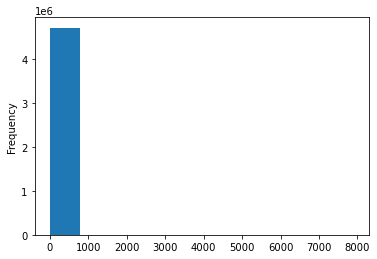

In [7]:
histogram = df['price'].plot.hist()
print(histogram)
plt.show()

El histograma ofrece poca información. Se ve que el mayor porcentaje de precios de los productos se encuentra entre el [0,750] aproximadamente.

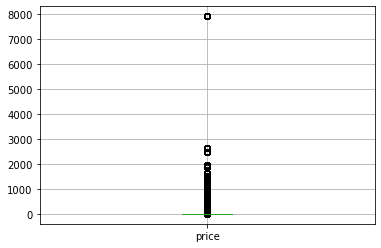

In [8]:
boxplot = df.boxplot(column=['price'])
boxplot.plot()

plt.show()

El boxplot muestra que claramente algunos valores de la variable precio, como el 8000, son valores erróneos.

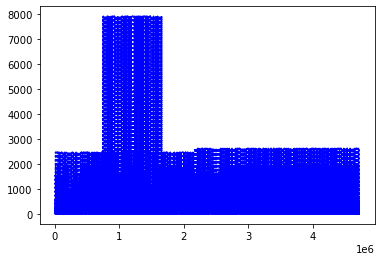

In [9]:
plt.plot(df['price'], ":",color="b")

La última gráfica tampoco no es de mucha utilidad, ya que al tener tantos elementos es difícil observar conclusiones. Por ello, vamos a trabajar con los percentiles

###### PERCENTIL 99

In [10]:
df.price.quantile(0.99) #PERCENTIL 99

19.19

El percentil 99 es una medida de posición que indica que el 99% de los precios son menores a 19'19€. Como 19'19€ ya si es un precio que se puede encontrar en un supermercado nos quedamos este máximo.

In [11]:
df=df.drop(df[df['price']>19.19].index) #ELIMINAMOS LOS ELEMENTOS CON UN PRECIO MAYORES AL PERCENTIL 99

###### PERCENTIL 1

In [12]:
df.price.quantile(0.01) #PERCENTIL 1

0.3

El percentil 1 es una medida de posición que indica, una vez ordenados los datos de menor a mayor, que el 1% de los precios son menores a 0.3.

In [13]:
df=df.drop(df[df['price']<0.3].index) #ELIMINAMOS ELEMENTOS CON UN PRECIO MENOR AL PERCENTIL 1

In [14]:
df.describe()

Unnamed: 0         price  reference_price
count  4.636221e+06  4.636221e+06     4.636221e+06
mean   3.916674e+06  2.616193e+00     1.088053e+01
std    2.237598e+06  2.412164e+00     1.324324e+02
min    1.000000e+00  3.000000e-01     8.000000e-03
25%    2.002041e+06  1.200000e+00     2.420000e+00
50%    3.900103e+06  1.890000e+00     5.341000e+00
75%    5.849146e+06  2.990000e+00     9.950000e+00
max    7.801573e+06  1.919000e+01     1.663333e+04

#### VARIABLE REFERENCE_PRICE

In [15]:
df["reference_price"].describe() 

count    4.636221e+06
mean     1.088053e+01
std      1.324324e+02
min      8.000000e-03
25%      2.420000e+00
50%      5.341000e+00
75%      9.950000e+00
max      1.663333e+04
Name: reference_price, dtype: float64

Se vuelve a tener máximos y mínimos extraños para precios de supermercado

In [16]:
df.reference_price.quantile(0.99) #PERCENTIL 99

55.63000000000001

In [17]:
#ELIMINAMOS DICHOS ELEMENTOS
df=df.drop(df[df['reference_price']>55.63].index) 

In [18]:
df.reference_price.quantile(0.01) #PERCENTIL 1

0.24

In [19]:
#ELIMINAMOS DICHOS ELEMENTOS
df =df.drop(df[df['reference_price']<0.24].index)


In [21]:
df.describe()

Unnamed: 0         price  reference_price
count  4.545448e+06  4.545448e+06     4.545448e+06
mean   3.915682e+06  2.613899e+00     7.476211e+00
std    2.237302e+06  2.416155e+00     7.351006e+00
min    1.000000e+00  3.000000e-01     2.400000e-01
25%    2.001550e+06  1.200000e+00     2.480000e+00
50%    3.898880e+06  1.890000e+00     5.340000e+00
75%    5.847842e+06  2.990000e+00     9.850000e+00
max    7.801573e+06  1.919000e+01     5.563000e+01

In [22]:
df.shape

(4545448, 10)

### TRANSFORMACIÓN UNIDADES DE MEDIDA Y ELECCIÓN DE FECHA

TOMAMOS LA ÚLTIMA ACTUALIZACION DE CADA PRODUCTO

In [23]:
urlUnique=pd.unique(df['url'])
urlUnique.size

27595

In [24]:
df=df.drop_duplicates(subset=['url'], keep='last', inplace=False, ignore_index=False)

In [25]:
df.shape

(27595, 10)

In [26]:
#BORRAR, NO SON COMIDA
df=df.drop(df[df['reference_unit']=='m'].index) 
df=df.drop(df[df['reference_unit']=='lavado'].index) 
df=df.drop(df[df['reference_unit']=='100ml'].index) 

In [193]:
###### GUARDAR 
#df.to_csv('agostoALIME_CON_PERC.csv', sep=',')
df=pd.read_csv("agostoALIME_CON_PERC.csv", sep=',')

Pasamos los 100g a kg, para poder hacer comparaciones entre los precios.

In [194]:
for i, valor in enumerate(df['reference_unit']):
    if valor=="100g":
        df['reference_price'][i]=df['reference_price'][i]*10

<ipython-input-194-1c21b9d3349d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reference_price'][i]=df['reference_price'][i]*10


In [195]:
df=df.replace({"100g":"kg"})

Pasamos los g a kg, para poder hacer comparaciones entre los precios.

In [196]:
for i, valor in enumerate(df['reference_unit']):
    if valor=="g":
        df['reference_price'][i]=df['reference_price'][i]*1000

<ipython-input-196-7f513013e75b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reference_price'][i]=df['reference_price'][i]*1000


In [197]:
df=df.replace({"g":"kg"})

COMPROBAMOS QUE CON LOS CAMBIOS NO TENEMOS VALORES MUY ALTOS EN REFERENCE_PRICE

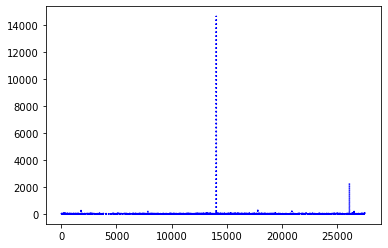

In [198]:
plt.plot(df['reference_price'], ":",color="b")

BORRAMOS LOS VALORES MAYORES QUE 60

In [199]:
df=df.drop(df[df['reference_price']>60].index) 

Nos quedamos únicamente con los alimentos con fecha del 15-06-2022 al 15-08-2022

In [200]:
df.shape

(27566, 11)

In [201]:
df=df[(df['insert_date'] == '2022-08-01 00:00:00') | (df['insert_date'] == '2022-08-02 00:00:00')| (df['insert_date'] == '2022-08-03 00:00:00')| (df['insert_date'] == '2022-08-04 00:00:00')| (df['insert_date'] == '2022-08-05 00:00:00')| (df['insert_date'] == '2022-08-06 00:00:00')| (df['insert_date'] == '2022-08-07 00:00:00')| (df['insert_date'] == '2022-08-08 00:00:00')| (df['insert_date'] == '2022-08-09 00:00:00')| (df['insert_date'] == '2022-08-10 00:00:00')| (df['insert_date'] == '2022-08-11 00:00:00')| (df['insert_date'] == '2022-08-12 00:00:00')| (df['insert_date'] == '2022-08-13 00:00:00')| (df['insert_date'] == '2022-08-14 00:00:00')| (df['insert_date'] == '2022-08-15 00:00:00')| (df['insert_date'] == '2022-07-31 00:00:00')| (df['insert_date'] == '2022-07-30 00:00:00')| (df['insert_date'] == '2022-07-29 00:00:00')| (df['insert_date'] == '2022-07-28 00:00:00')| (df['insert_date'] == '2022-07-27 00:00:00')| (df['insert_date'] == '2022-07-26 00:00:00')| (df['insert_date'] == '2022-07-25 00:00:00')| (df['insert_date'] == '2022-07-24 00:00:00')| (df['insert_date'] == '2022-07-23 00:00:00')| (df['insert_date'] == '2022-07-22 00:00:00')| (df['insert_date'] == '2022-07-21 00:00:00')| (df['insert_date'] == '2022-07-20 00:00:00')| (df['insert_date'] == '2022-07-19 00:00:00')| (df['insert_date'] == '2022-07-18 00:00:00')| (df['insert_date'] == '2022-07-17 00:00:00')| (df['insert_date'] == '2022-07-16 00:00:00')| (df['insert_date'] == '2022-07-15 00:00:00')| (df['insert_date'] == '2022-07-14 00:00:00')| (df['insert_date'] == '2022-07-13 00:00:00')| (df['insert_date'] == '2022-07-12 00:00:00')| (df['insert_date'] == '2022-07-11 00:00:00')| (df['insert_date'] == '2022-07-10 00:00:00')| (df['insert_date'] == '2022-07-09 00:00:00')| (df['insert_date'] == '2022-07-08 00:00:00')| (df['insert_date'] == '2022-07-07 00:00:00')| (df['insert_date'] == '2022-07-06 00:00:00')| (df['insert_date'] == '2022-07-05 00:00:00')| (df['insert_date'] == '2022-07-04 00:00:00')| (df['insert_date'] == '2022-07-03 00:00:00')| (df['insert_date'] == '2022-07-02 00:00:00')| (df['insert_date'] == '2022-07-01 00:00:00')| (df['insert_date'] == '2022-06-30 00:00:00')| (df['insert_date'] == '2022-06-29 00:00:00')| (df['insert_date'] == '2022-06-28 00:00:00')| (df['insert_date'] == '2022-06-27 00:00:00')| (df['insert_date'] == '2022-06-26 00:00:00')| (df['insert_date'] == '2022-06-25 00:00:00')| (df['insert_date'] == '2022-06-24 00:00:00')| (df['insert_date'] == '2022-06-23 00:00:00')| (df['insert_date'] == '2022-06-22 00:00:00')| (df['insert_date'] == '2022-06-21 00:00:00')| (df['insert_date'] == '2022-06-20 00:00:00')| (df['insert_date'] == '2022-06-19 00:00:00')| (df['insert_date'] == '2022-06-18 00:00:00')| (df['insert_date'] == '2022-06-17 00:00:00')| (df['insert_date'] == '2022-06-16 00:00:00')| (df['insert_date'] == '2022-06-15 00:00:00')]

In [202]:
df.shape

(11439, 11)

Comprobamos que en todas las categorías se tenga un número elevado de productos. 

In [203]:
df[(df['category'] == 'agua')].shape

(132, 11)

In [204]:
df[(df['category'] == 'fruta')].shape

(301, 11)

In [205]:
df[(df['category'] == 'verduras')].shape

(692, 11)

In [206]:
df[(df['category'] == 'cereales')].shape

(226, 11)

In [207]:
df[(df['category'] == 'pan')].shape

(301, 11)

In [208]:
df[(df['category'] == 'frutos_secos')].shape

(99, 11)

In [209]:
df[(df['category'] == 'legumbres')].shape

(132, 11)

In [210]:
df[(df['category'] == 'AOVE')].shape

(0, 11)

In [211]:
df[(df['category'] == 'aceite_vinagre')].shape

(122, 11)

In [212]:
df[(df['category'] == 'huevos')].shape

(42, 11)

In [213]:
df[(df['category'] == 'leche')].shape

(106, 11)

In [214]:
df[(df['category'] == 'mantequilla')].shape

(94, 11)

In [215]:
df[(df['category'] == 'pescado_marisco')].shape

(644, 11)

In [216]:
df[(df['category'] == 'carne_blanca')].shape

(106, 11)

In [217]:
df[(df['category'] == 'carne_roja')].shape

(168, 11)

In [218]:
df[(df['category'] == 'carne_roja_blanca')].shape

(167, 11)

In [219]:
df[(df['category'] == 'azucar')].shape

(200, 11)

In [220]:
df[(df['category'] == 'especias')].shape

(128, 11)

In [221]:
df[(df['category'] == 'harina')].shape

(186, 11)

In [222]:
df[(df['category'] == 'refrescos')].shape

(500, 11)

In [223]:
df[(df['category'] == 'te_cafe')].shape

(257, 11)

In [224]:
df[(df['category'] == 'merienda')].shape

(417, 11)

In [225]:
df[(df['category'] == 'bolleria')].shape

(325, 11)

In [226]:
df[(df['category'] == 'chocolate')].shape

(635, 11)

In [227]:
df[(df['category'] == 'snacks')].shape

(447, 11)

In [228]:
df[(df['category'] == 'embutido')].shape

(565, 11)

In [229]:
df[(df['category'] == 'zumo')].shape

(230, 11)

In [230]:
df[(df['category'] == 'alcohol')].shape

(1270, 11)

In [231]:
df[(df['category'] == 'postre')].shape

(281, 11)

In [232]:
df[(df['category'] == 'yogures')].shape

(609, 11)

In [233]:
df[(df['category'] == 'precocinado')].shape

(564, 11)

In [234]:
df[(df['category'] == 'sopas')].shape

(111, 11)

In [245]:
df[(df['category'] == 'helados')].shape

(328, 9)

In [237]:
df[(df['category'] == 'salsas')].shape

(237, 11)

In [238]:
df[(df['category'] == 'quesos')].shape

(817, 11)

Comprobamos los alimentos que se han eliminado

In [239]:
df.shape

(11439, 11)

In [240]:
Unique=pd.unique(df['insert_date'])
Unique

array(['2022-06-15 00:00:00', '2022-06-16 00:00:00',
       '2022-06-17 00:00:00', '2022-06-18 00:00:00',
       '2022-06-19 00:00:00', '2022-06-20 00:00:00',
       '2022-06-21 00:00:00', '2022-06-22 00:00:00',
       '2022-06-23 00:00:00', '2022-06-24 00:00:00',
       '2022-06-25 00:00:00', '2022-06-26 00:00:00',
       '2022-06-27 00:00:00', '2022-06-28 00:00:00',
       '2022-06-29 00:00:00', '2022-06-30 00:00:00',
       '2022-07-01 00:00:00', '2022-07-02 00:00:00',
       '2022-07-03 00:00:00', '2022-07-04 00:00:00',
       '2022-07-05 00:00:00', '2022-07-06 00:00:00',
       '2022-07-07 00:00:00', '2022-07-08 00:00:00',
       '2022-07-09 00:00:00', '2022-07-10 00:00:00',
       '2022-07-11 00:00:00', '2022-07-12 00:00:00',
       '2022-07-13 00:00:00', '2022-07-14 00:00:00',
       '2022-07-15 00:00:00', '2022-07-16 00:00:00',
       '2022-07-17 00:00:00', '2022-07-18 00:00:00',
       '2022-07-19 00:00:00', '2022-07-20 00:00:00',
       '2022-07-21 00:00:00', '2022-07-22 00:0

In [241]:
del(df['Unnamed: 0'])

In [242]:
del(df['Unnamed: 0.1'])

### Convertir la variable reference_unit y category a numerica

In [173]:
df=df.replace({'l':0, 'kg':1, 'ud':2, 'docena':3})

In [174]:
df=df.replace({'agua':0, 'azucar':1, 'AOVE':2, 'especias':3, 'carne_roja_blanca':4, 'harina':5, 'fruta':6, 'verduras':7, 'cereales':8, 'pan':9, 'frutos_secos':10, 'legumbres':11, 'aceite_vinagre':12, 'huevos':13, 'leche':14, 'mantequilla':15, 'quesos':16, 'pescado_marisco':17, 'carne_blanca':18, 'carne_roja':19, 'embutido':20, 'refrescos':21, 'te_cafe':22, 'merienda':23, 'bolleria':24, 'chocolate':25, 'snacks':26, 'zumo':27, 'alcohol':28, 'postre':29, 'yogures':30, 'precocinado':31, 'sopas':32, 'salsas':33, 'helados':34})

In [175]:
df.describe()

category         price  reference_price  reference_unit
count  11439.000000  11439.000000     11439.000000    11439.000000
mean      20.137687      2.977071         8.641229        0.795437
std        9.135562      2.707400         8.182828        0.493649
min        0.000000      0.300000         0.240000        0.000000
25%       15.000000      1.370000         2.863500        1.000000
50%       21.000000      2.120000         6.260000        1.000000
75%       28.000000      3.450000        11.620000        1.000000
max       34.000000     19.150000        57.700000        3.000000

In [177]:
###### GUARDAR 
#df.to_csv('agosto_FINAL.csv', sep=',')
df=pd.read_csv("agosto_FINAL.csv", sep=',')

In [179]:
del(df['Unnamed: 0'])

### TOMAMOS 4 DATASET, DEPENDIENDO DE REFERENCE_UNIT

In [180]:
df.describe()

category         price  reference_price  reference_unit
count  11439.000000  11439.000000     11439.000000    11439.000000
mean      20.137687      2.977071         8.641229        0.795437
std        9.135562      2.707400         8.182828        0.493649
min        0.000000      0.300000         0.240000        0.000000
25%       15.000000      1.370000         2.863500        1.000000
50%       21.000000      2.120000         6.260000        1.000000
75%       28.000000      3.450000        11.620000        1.000000
max       34.000000     19.150000        57.700000        3.000000

In [181]:
litros=df[(df['reference_unit'] ==0 )]

In [182]:
litros.to_csv('litros.csv', sep=',')

In [183]:
kilogramos=df[(df['reference_unit'] ==1 )]

In [184]:
kilogramos.to_csv('kilogramos.csv', sep=',')

In [185]:
unidad=df[(df['reference_unit'] ==2 )]

In [186]:
unidad.to_csv('unidad.csv', sep=',')

In [187]:
docena=df[(df['reference_unit'] ==3 )]

In [188]:
docena.to_csv('docena.csv', sep=',')

### GRÁFICAS

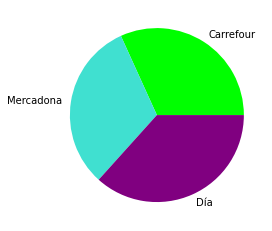

In [189]:
f=df[df["supermarket"]=='carrefour-es'].shape
f1=f[0] 

m=df[df["supermarket"]=='mercadona-es'].shape
m1=m[0]

e=df[df["supermarket"]=='dia-es'].shape
e1=e[0]

divisiones=np.array([f1,m1, e1])
actividades=np.array(['Carrefour', 'Mercadona', 'Día'])
colores=np.array(['lime','turquoise', 'purple'])
plt.pie(divisiones, labels=actividades, colors=colores)
plt.show()

Existe más cantidad de alimentos en el Mercadona y en el Día que en el carrefour

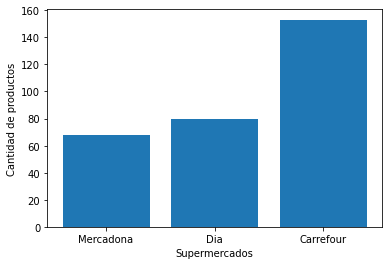

In [83]:
a=df[(df['supermarket'] == "mercadona-es") & (df['category'] =='fruta')].count()
a1=a[0]
b=df[(df['supermarket'] == "dia-es") & (df['category'] =='fruta')].count()
b1=b[0]
c=df[(df['supermarket'] == "carrefour-es") & (df['category'] =='fruta')].count()
c1=c[0]


eje_x = ['Mercadona', 'Dia', 'Carrefour']
eje_y = [a1,b1,c1]
plt.bar(eje_x, eje_y)
plt.ylabel('Cantidad de productos')
plt.xlabel('Supermercados')

plt.show()

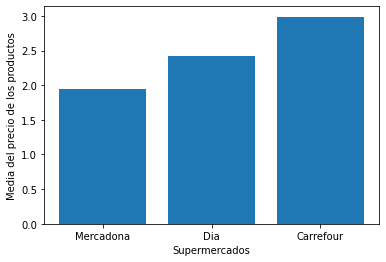

In [84]:
a=df[(df['supermarket'] == "mercadona-es") & (df['category'] =='fruta')].mean()
a1=a[1]
b=df[(df['supermarket'] == "dia-es") & (df['category'] =='fruta')].mean()
b1=b[1]
c=df[(df['supermarket'] == "carrefour-es") & (df['category'] =='fruta')].mean()
c1=c[1]

eje_x = ['Mercadona', 'Dia', 'Carrefour']
eje_y = [a1,b1,c1]
plt.bar(eje_x, eje_y)
plt.ylabel('Media del precio de los productos')
plt.xlabel('Supermercados')

plt.show()